In [3]:
def logDS(task='taskname', trainList=['MSC01','MSC02','MSC03','MSC04','MSC05','MSC06','MSC07','MSC10'], predictList=['MSC01','MSC02','MSC03','MSC04','MSC05','MSC06','MSC07','MSC10']):
    from sklearn.linear_model import LogisticRegression
    import numpy as np
    import reshape
    import pandas as pd
    import matplotlib.pyplot as plt
    import plotFW
    import seaborn as sns
    from sklearn import metrics
    from sklearn.model_selection import cross_val_score
# all parameters not specified are set to their defaults
# default solver is incredibly slow thats why we change it
    logisticRegr = LogisticRegression(solver = 'lbfgs')
    accTable=[]
    cvTable=[]
    #avgCV=[]
    for i in trainList:
        #Load task FC
        taskFC=reshape.matFiles('/Users/aporter1350/Desktop/MSC_Alexis/analysis/data/mvpa_data/' +task+ '/' +i+ '_parcel_corrmat.mat')
        #Load rest
        restFC=reshape.matFiles('/Users/aporter1350/Desktop/MSC_Alexis/analysis/data/mvpa_data/rest/' +i+ '_parcel_corrmat.mat')
        #Create a training dataset targets 1/0 ==task/rest, chunk=#days
        x_train=np.concatenate((taskFC, restFC))
        taskSize=taskFC.shape[0]
        restSize=restFC.shape[0]
        t = np.ones(taskSize, dtype = int)
        r=np.zeros(restSize, dtype=int)
        y_train = np.concatenate((t,r))
        logisticRegr.fit(x_train, y_train)
        #Cross validation
        CVscores=cross_val_score(logisticRegr, x_train, y_train, cv=taskSize)
        CVmean=CVscores.mean()
        #Obtain coefficients (feature weights)
        coef = logisticRegr.coef_
        #Plot feature weights
        #plotFW.feature_plots(coef, 'DS', task, i)
        plotFW.saveFW(coef, 'DS', task, i)
        acc_scores_per_task=[]
        #Lets loop through all scenerios for sub and task of interest
        for j in predictList:
            #Load testing set
            test_taskFC=reshape.matFiles('/Users/aporter1350/Desktop/MSC_Alexis/analysis/data/mvpa_data/'+task+'/'+j+'_parcel_corrmat.mat')
            #and all rest files
            test_restFC=reshape.matFiles('/Users/aporter1350/Desktop/MSC_Alexis/analysis/data/mvpa_data/rest/'+j+'_parcel_corrmat.mat')
            #Create testing dataset
            x_test=np.concatenate((test_taskFC, test_restFC))
            ttaskSize=test_taskFC.shape[0]
            trestSize=test_restFC.shape[0]
            tt = np.ones(ttaskSize, dtype = int)
            tr=np.zeros(trestSize, dtype=int)
            y_test = np.concatenate((tt,tr))
            p=logisticRegr.predict(x_test)
            # Use score method to get accuracy of model
            score = logisticRegr.score(x_test, y_test)
            acc_scores_per_task.append(score)
            #construct a confusion matrix
            cm = metrics.confusion_matrix(y_test, p)
            plt.figure(figsize=(9,9))
            sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
            plt.ylabel('Actual label');
            plt.xlabel('Predicted label');
            all_sample_title = 'Accuracy Score: {0}'.format(score)
            plt.title(all_sample_title, size = 15);
            #plt.savefig("/Users/aporter1350/Desktop//MSC_Alexis/analysis/output/images/logReg/cm/DS/" +task+ '_train' +i+ '_test_' +j+ '.png')
        tmp_df=pd.DataFrame({'Test_variables':predictList, i:acc_scores_per_task}).set_index('Test_variables')
        accTable.append(tmp_df)
        cv_tmp_df=pd.DataFrame({i:CVscores})
        cvTable.append(cv_tmp_df)
    accTable=pd.concat(accTable, axis=1)
    #accTable.to_csv('/Users/aporter1350/Desktop/MSC_Alexis/analysis/output/results/logReg/acc/DS/'+task+'_accTable_diff_sub.csv')
    cvTable=pd.concat(cvTable, axis=1)
    #cvTable.to_csv('/Users/aporter1350/Desktop/MSC_Alexis/analysis/output/results/logReg/acc/DS/'+task+'_cvTable_folds.csv')
    


/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicit

/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicit

/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicit

/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicit

/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicit

/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicit

/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicit

/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicit

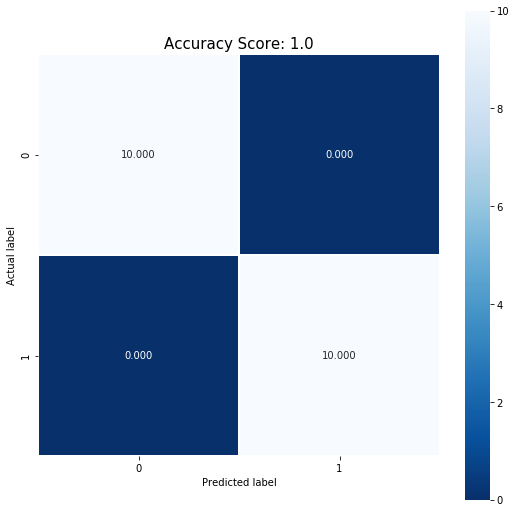

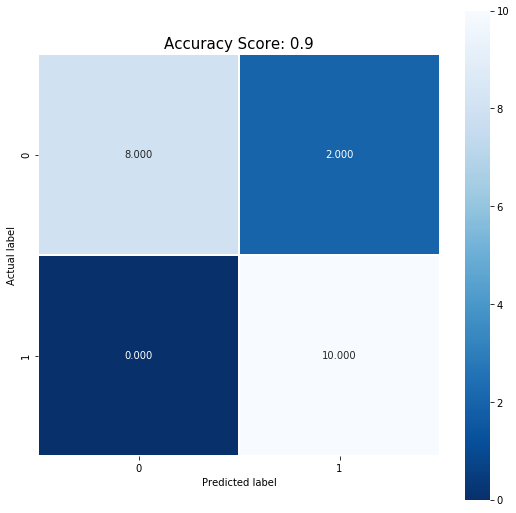

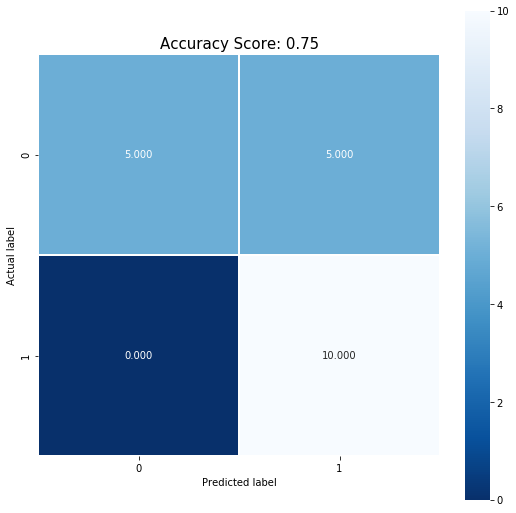

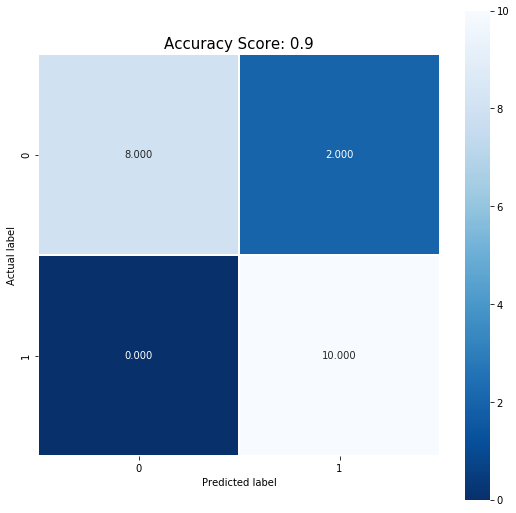

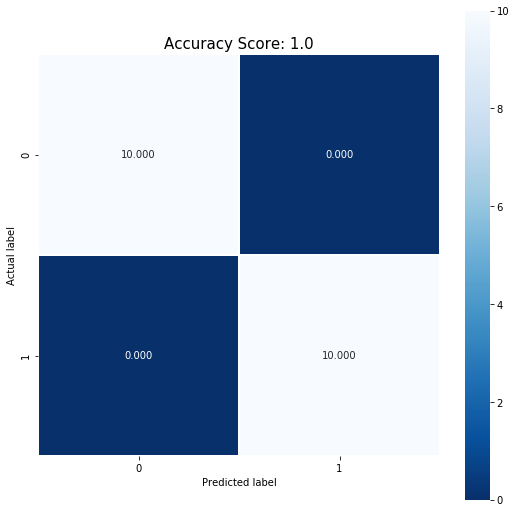

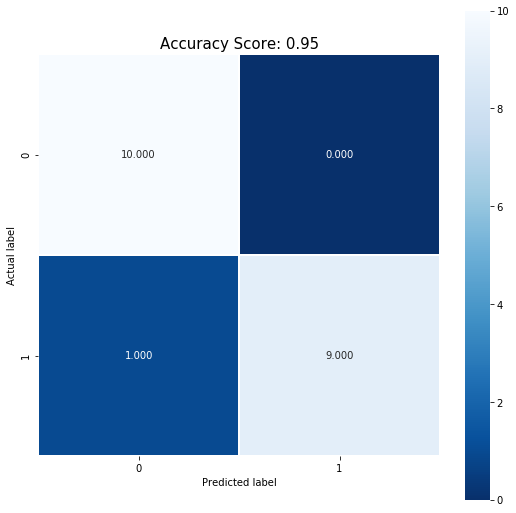

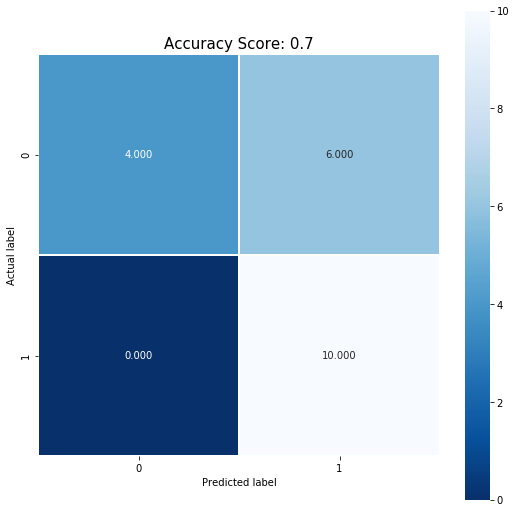

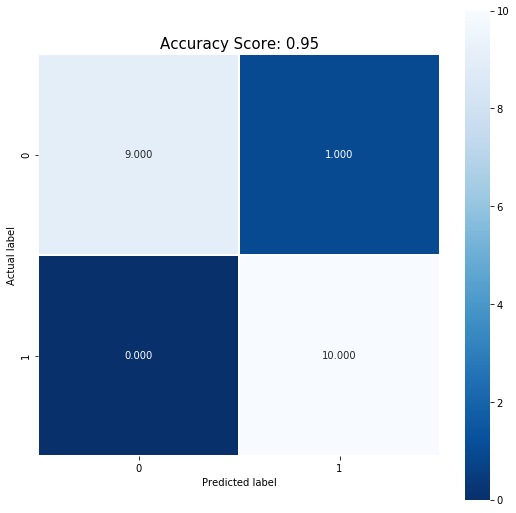

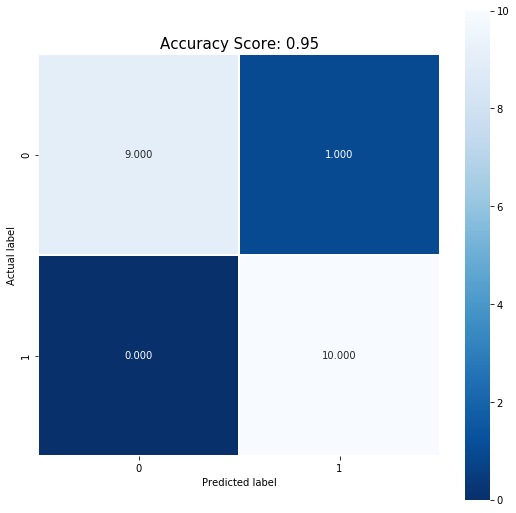

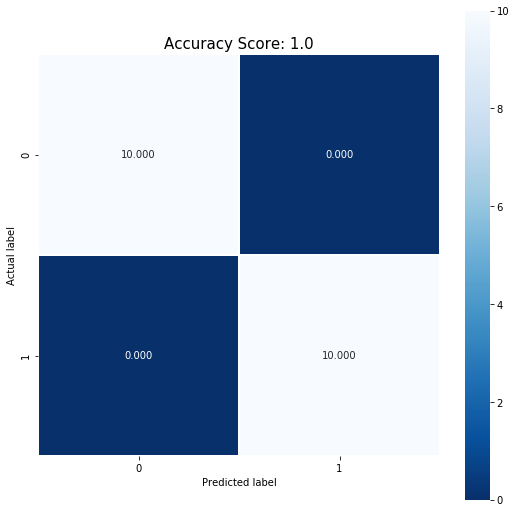

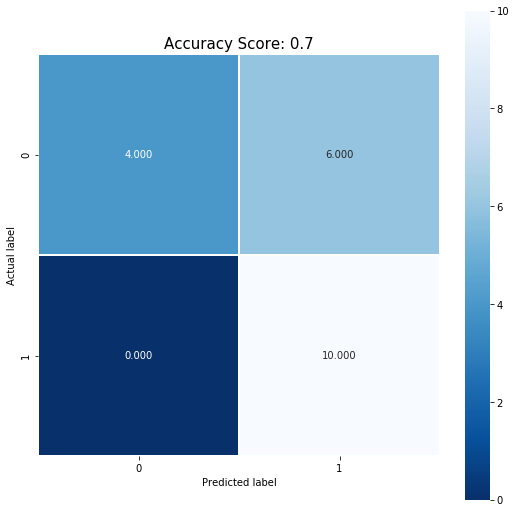

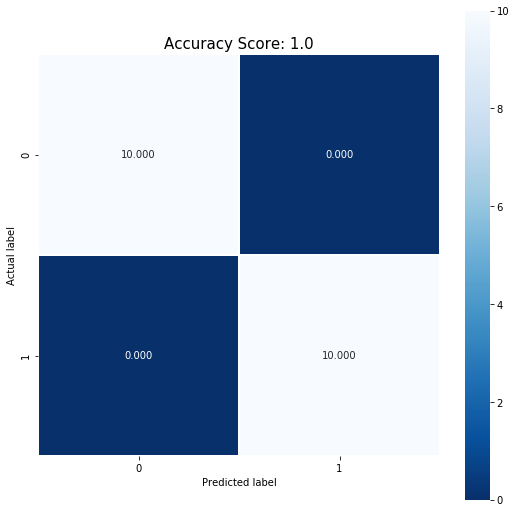

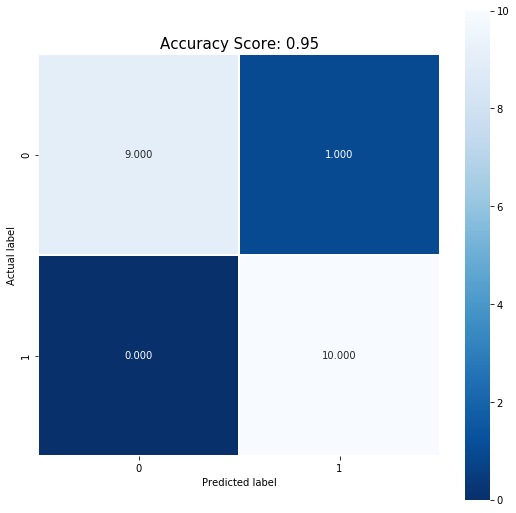

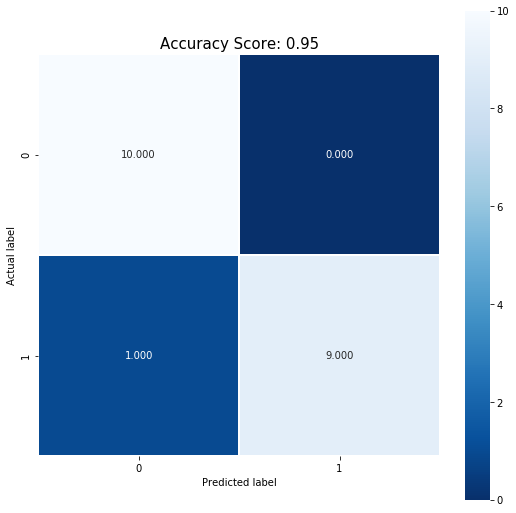

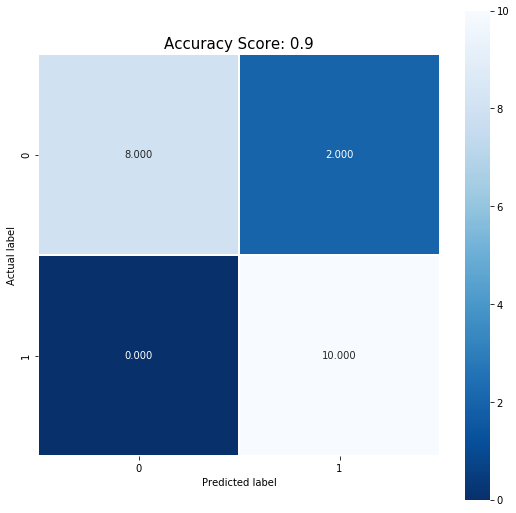

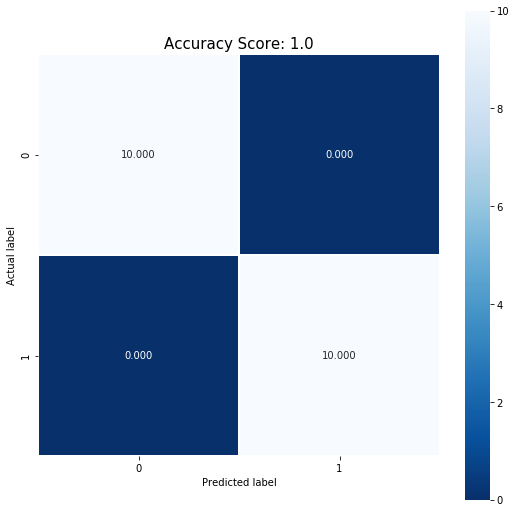

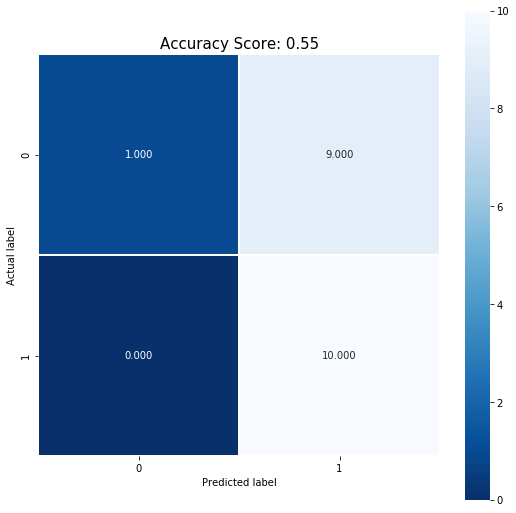

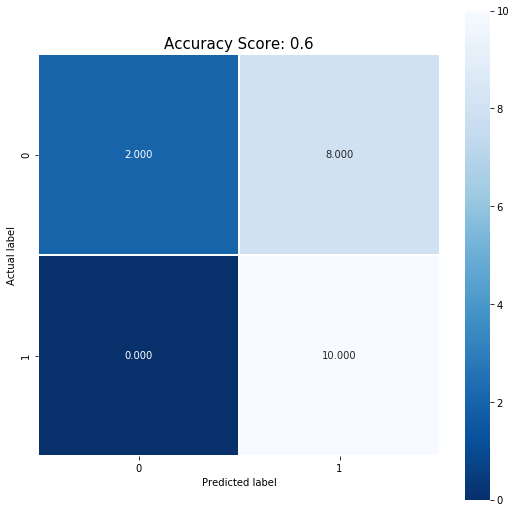

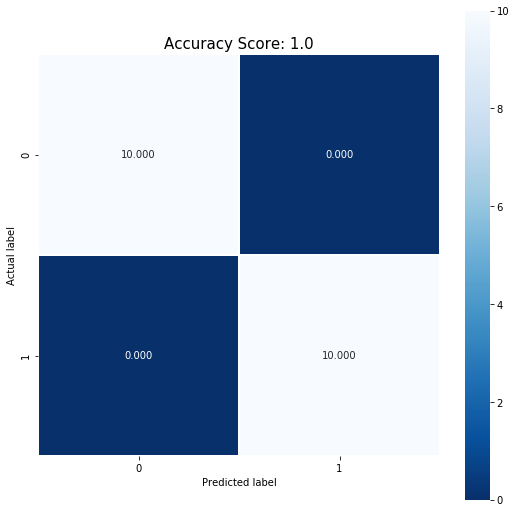

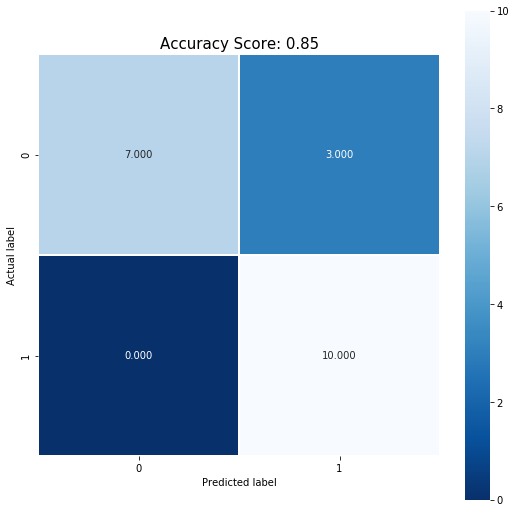

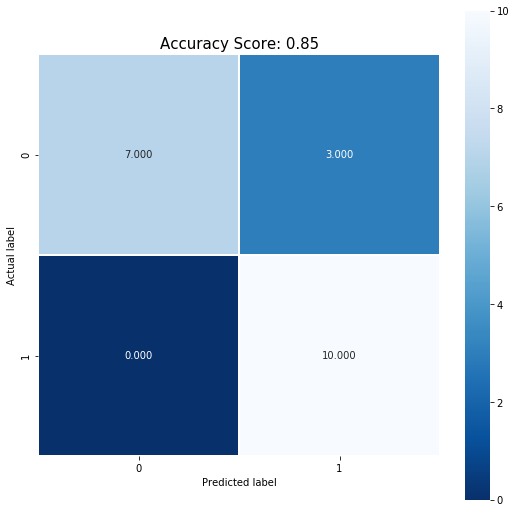

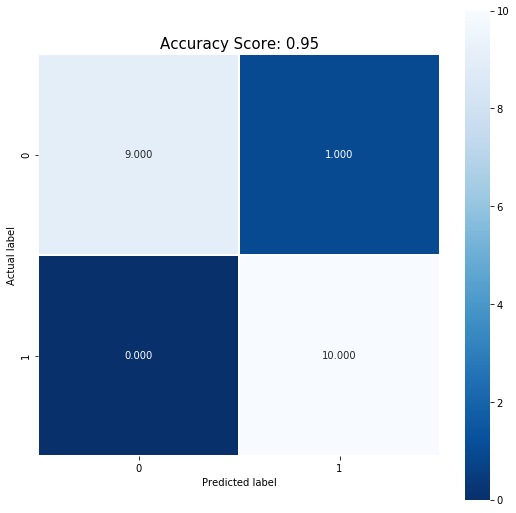

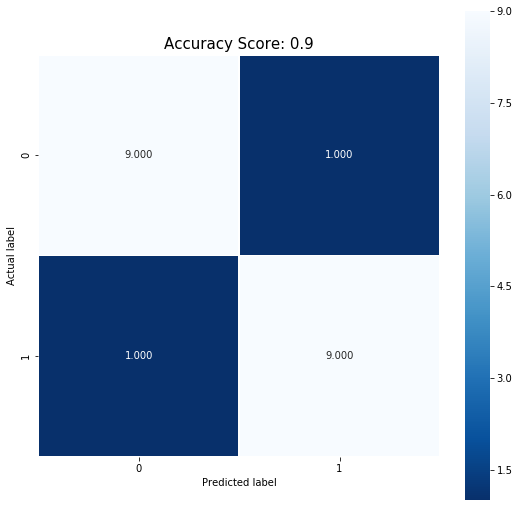

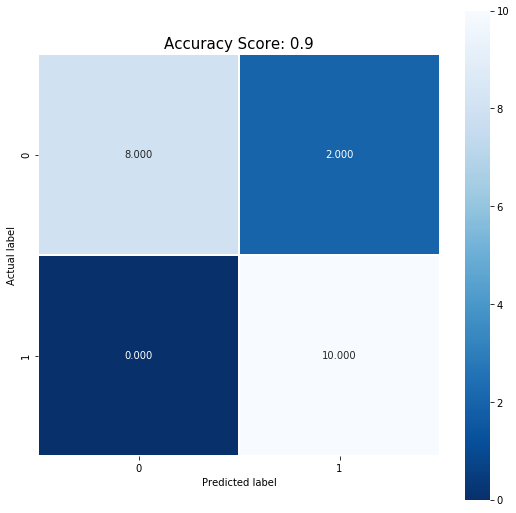

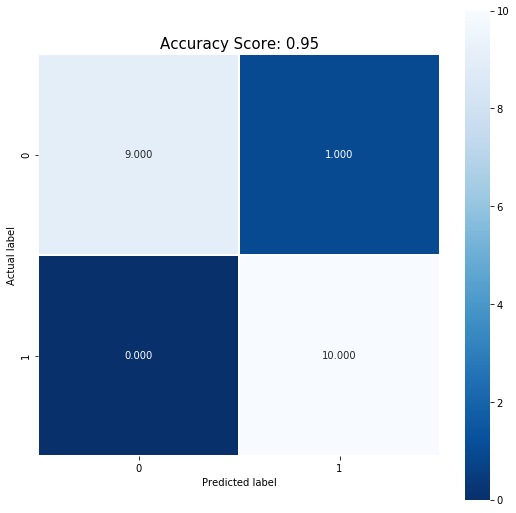

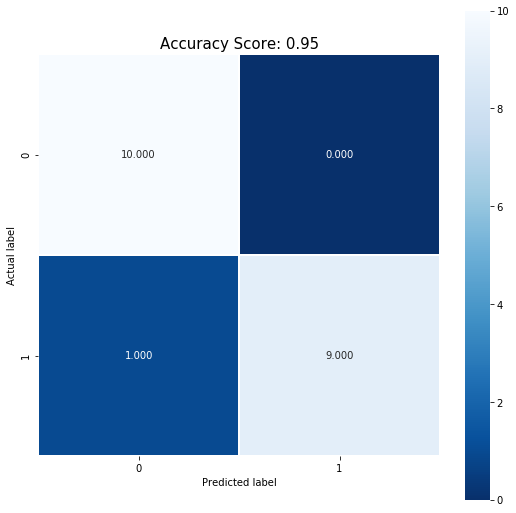

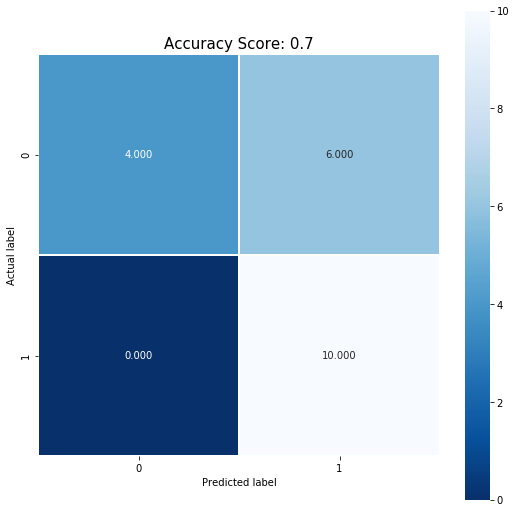

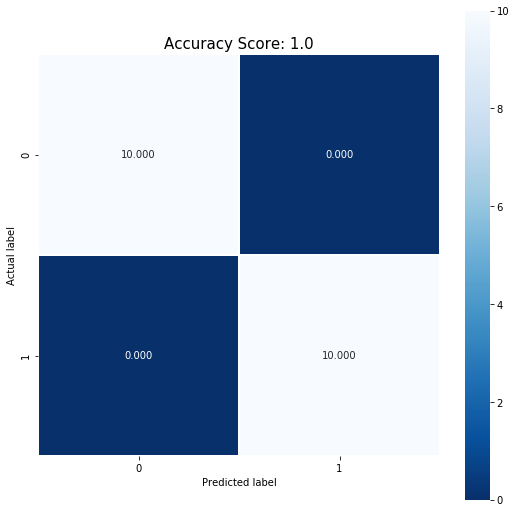

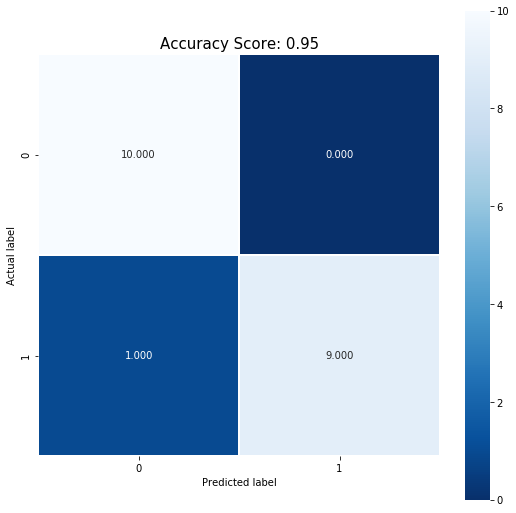

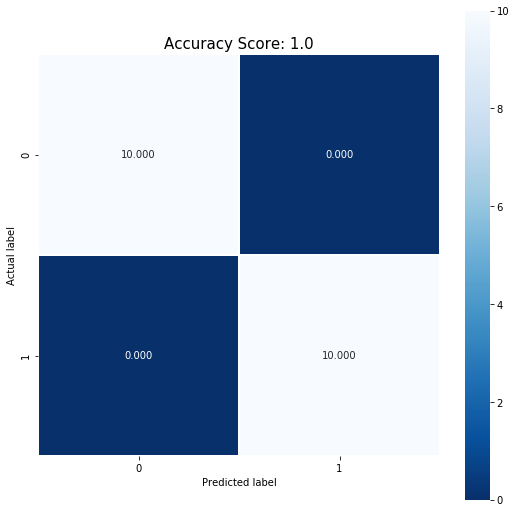

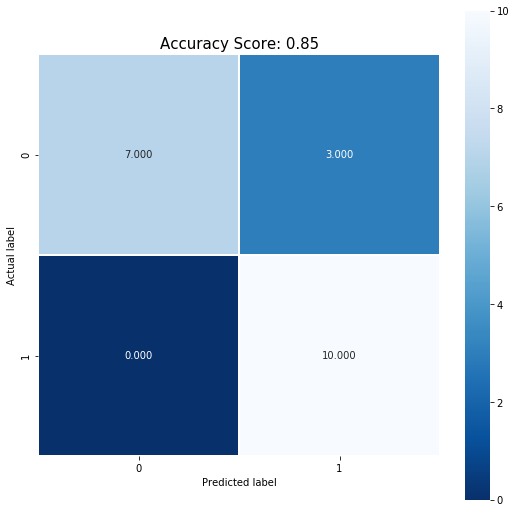

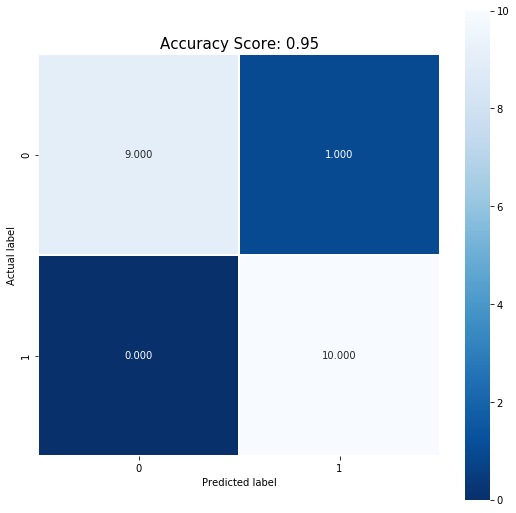

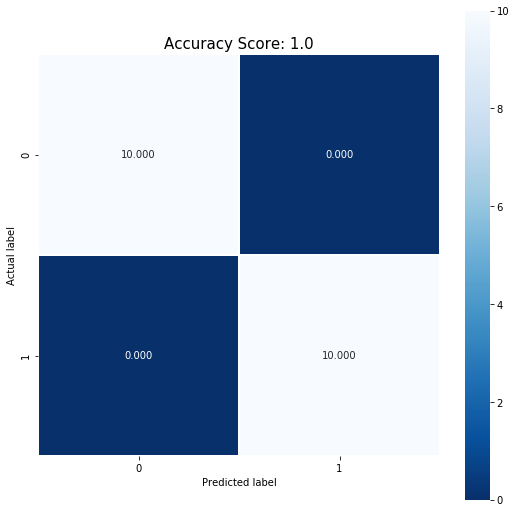

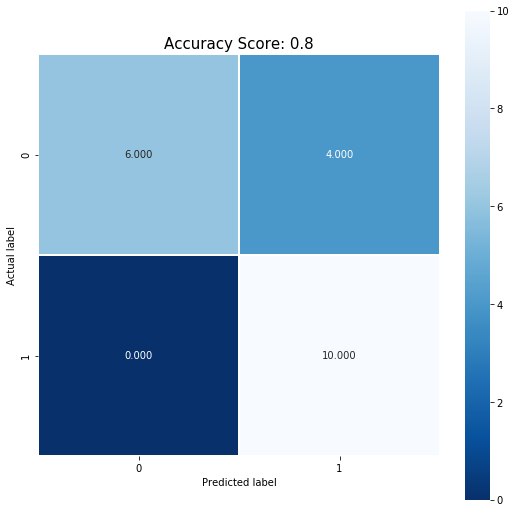

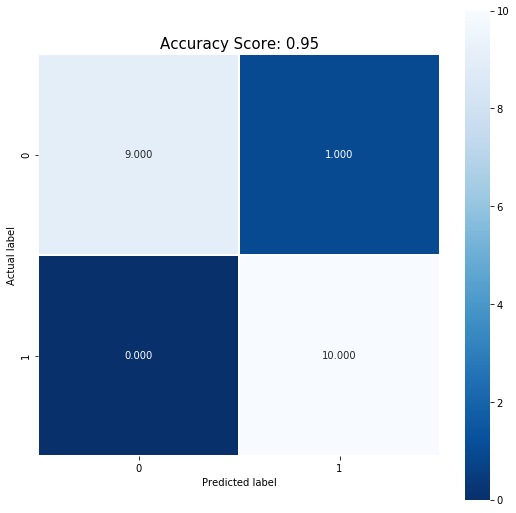

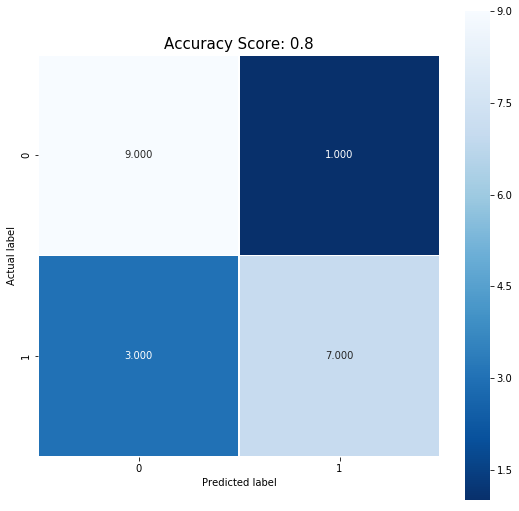

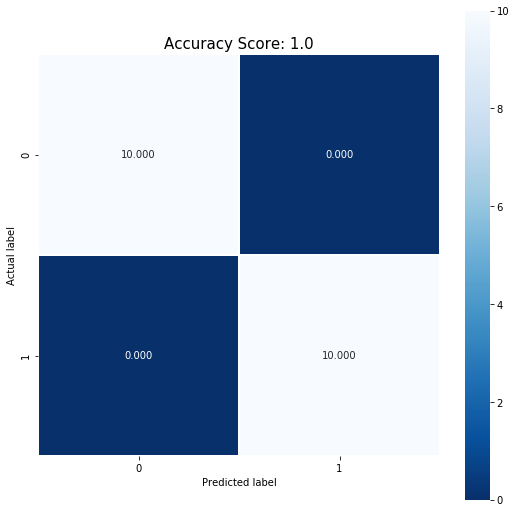

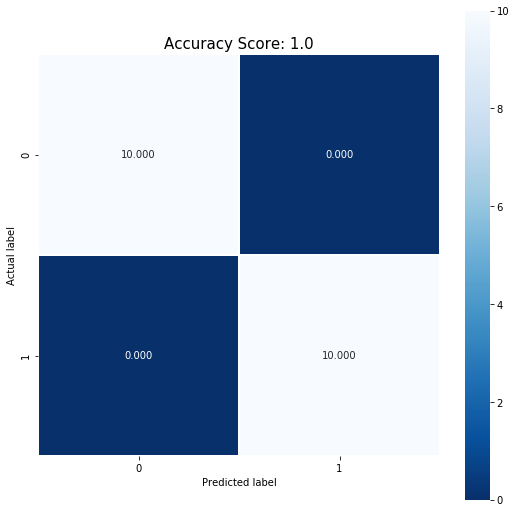

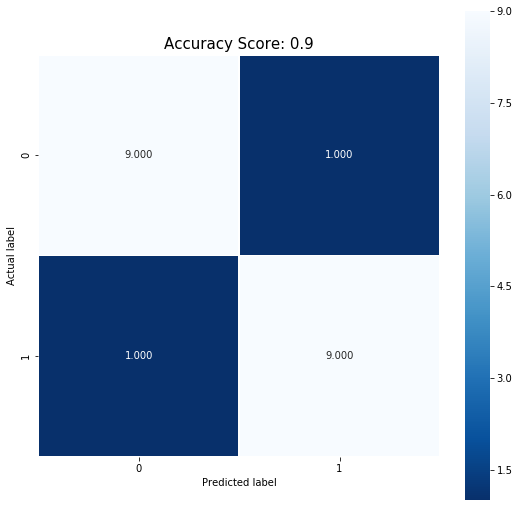

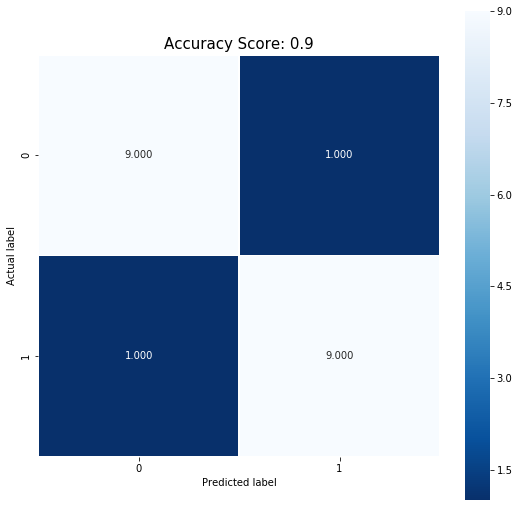

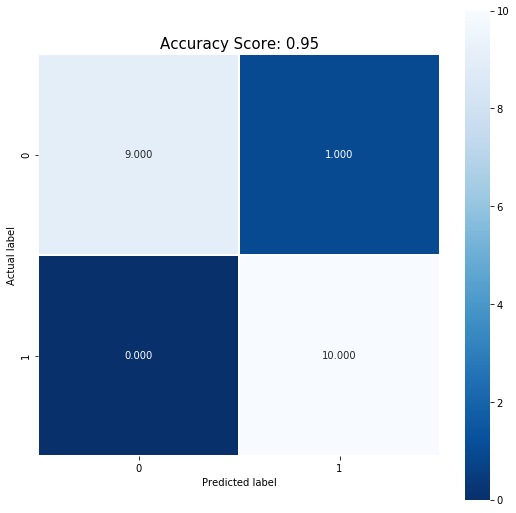

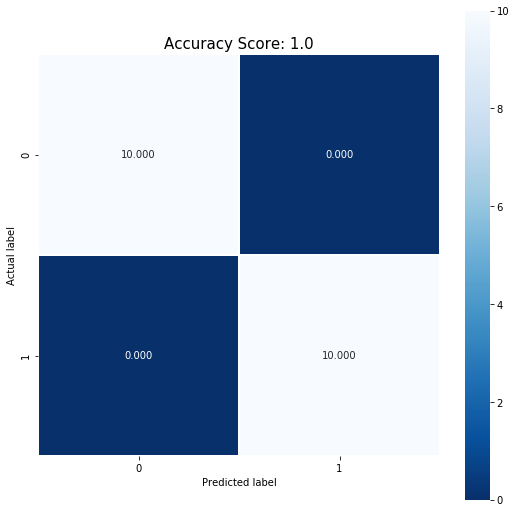

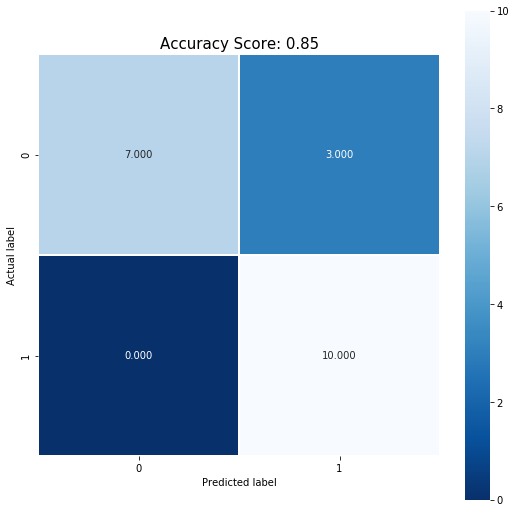

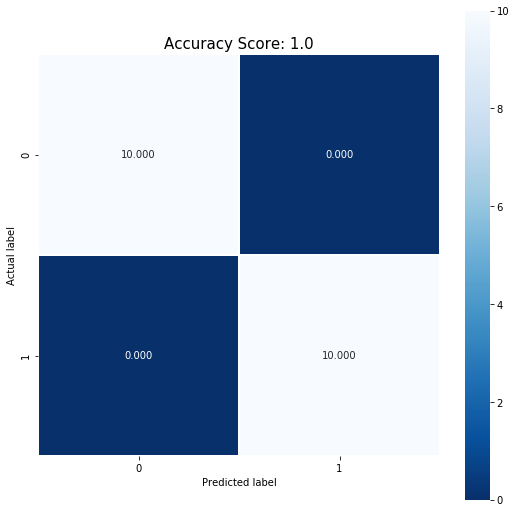

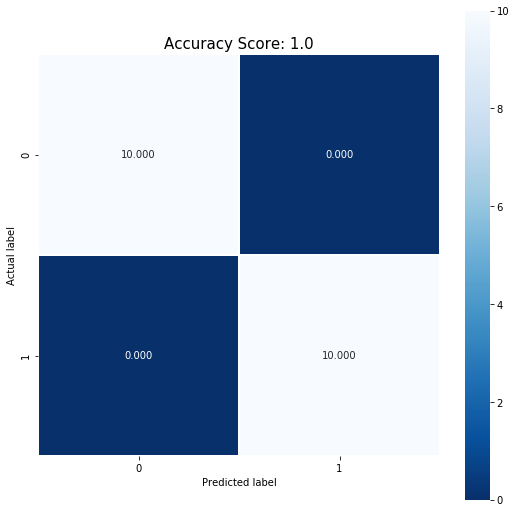

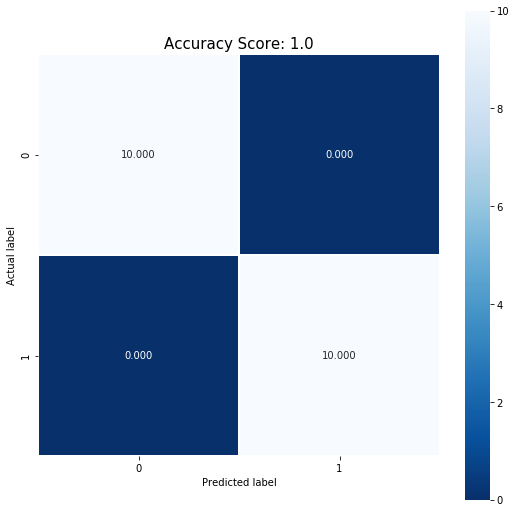

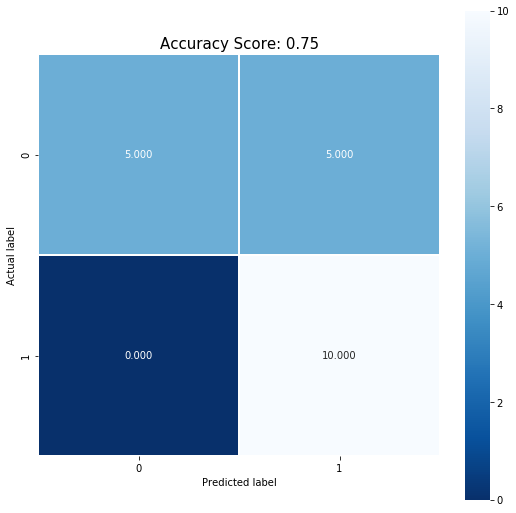

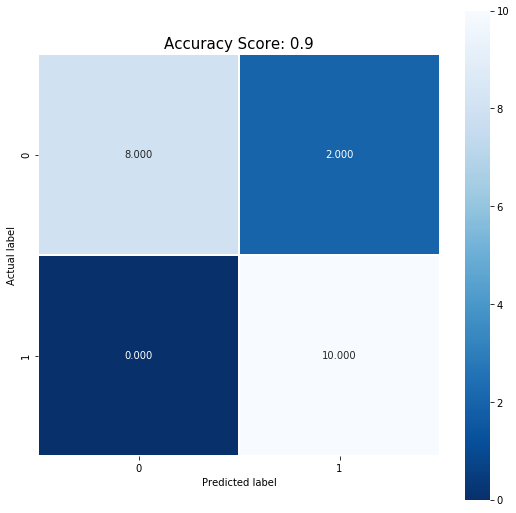

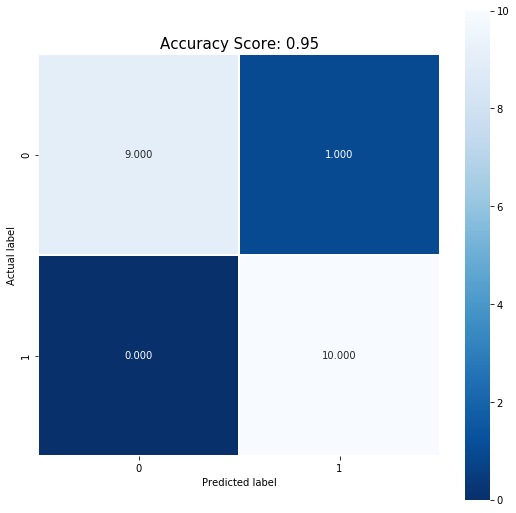

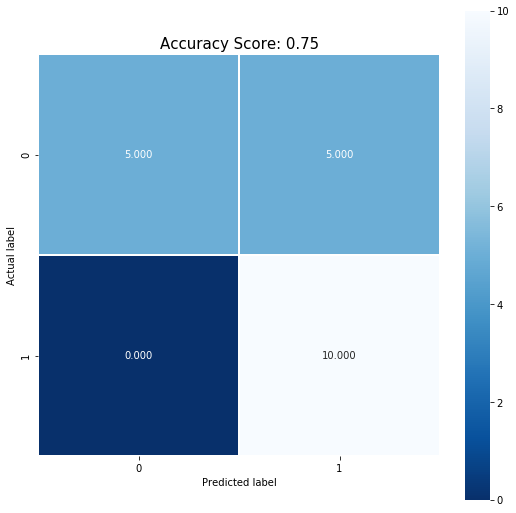

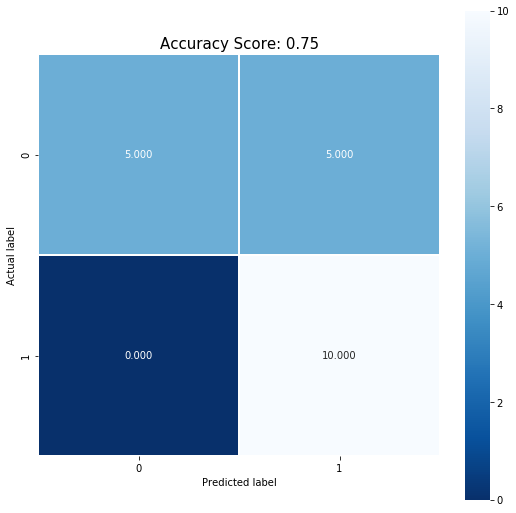

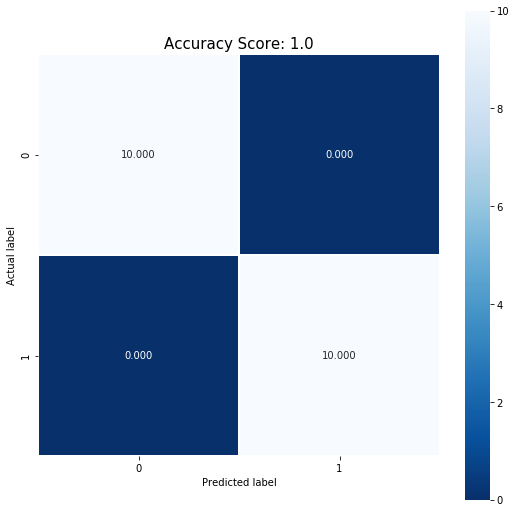

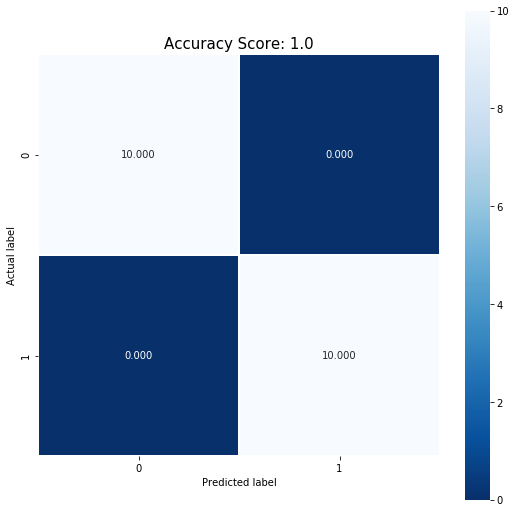

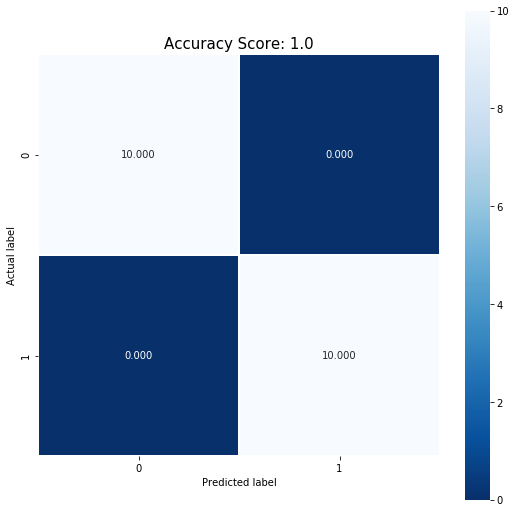

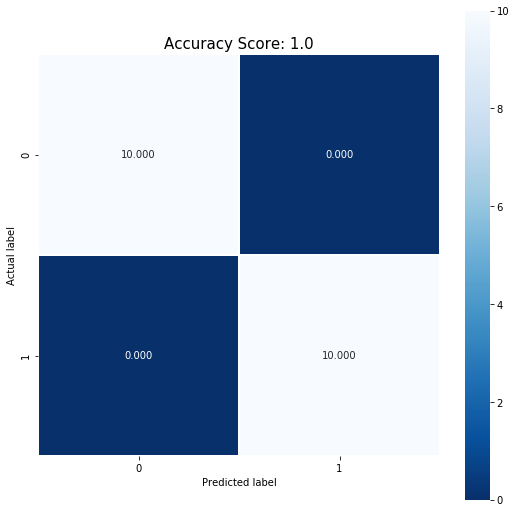

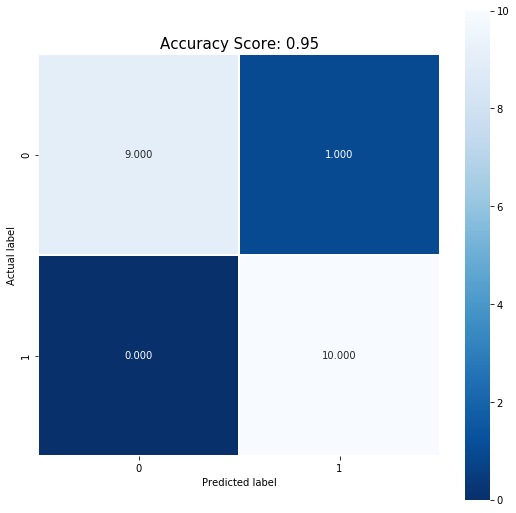

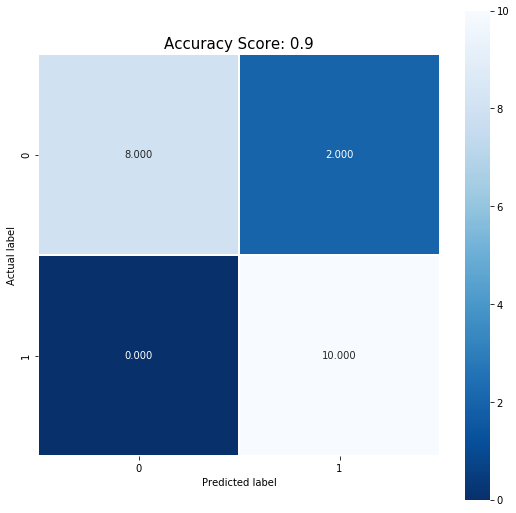

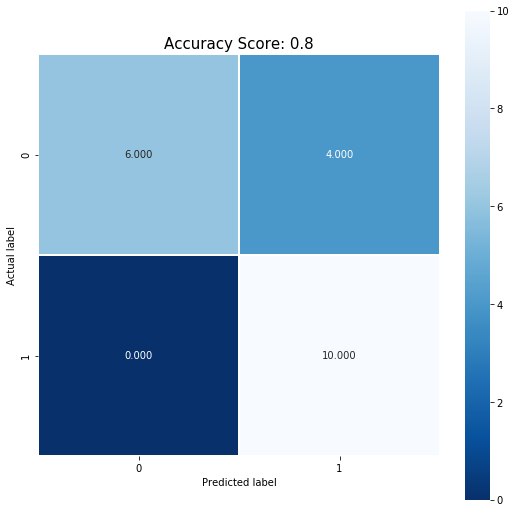

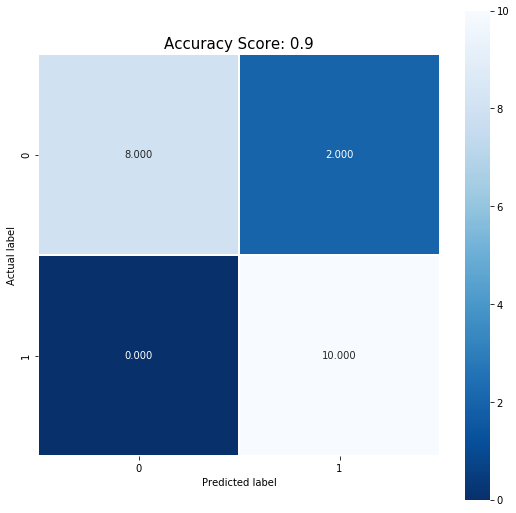

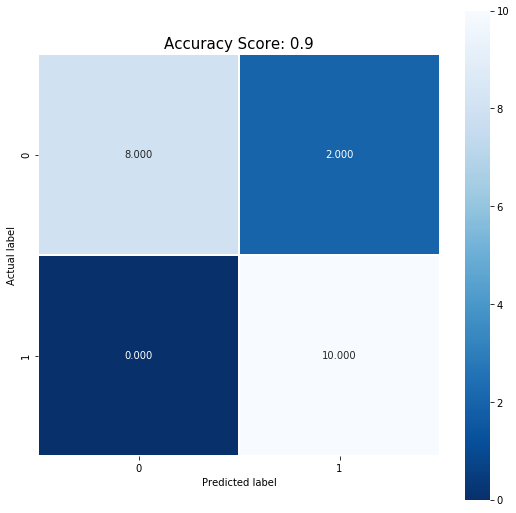

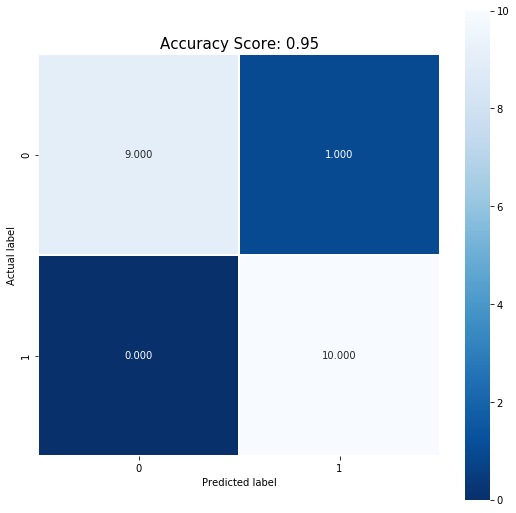

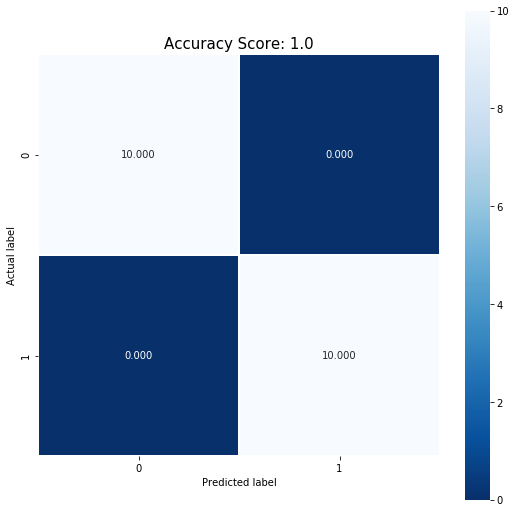

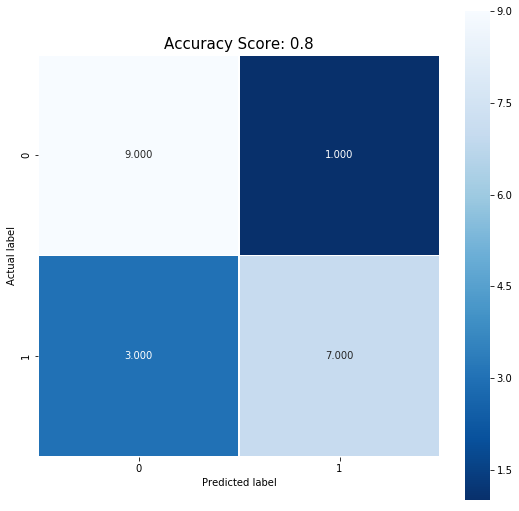

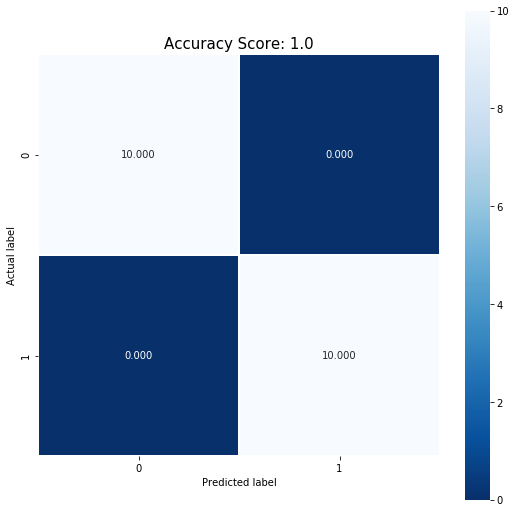

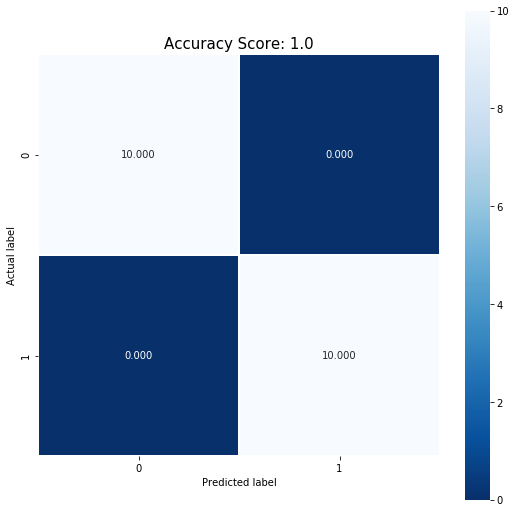

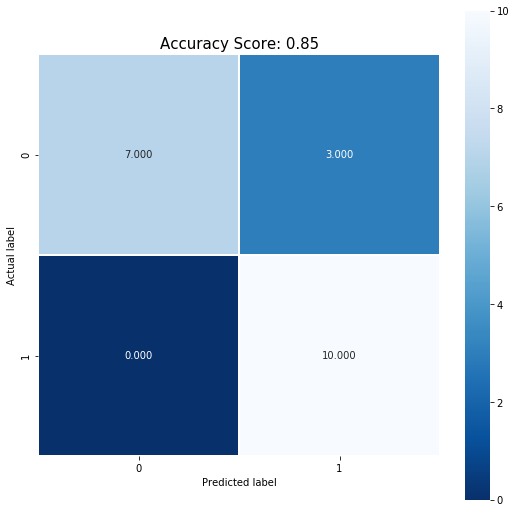

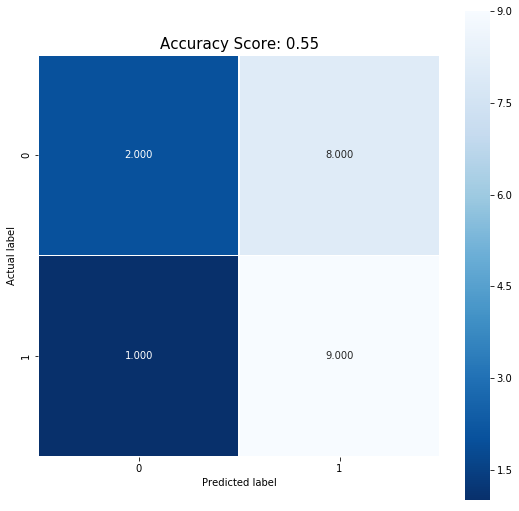

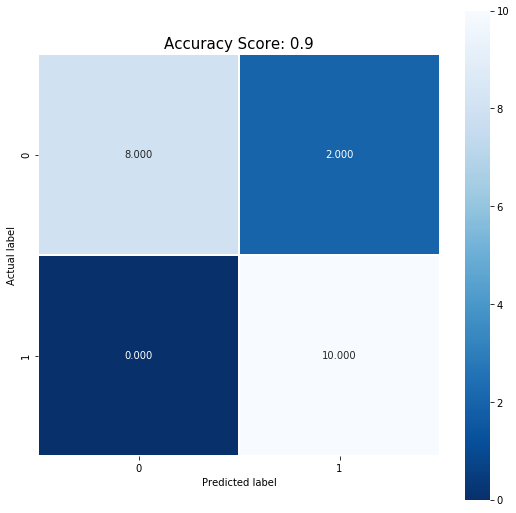

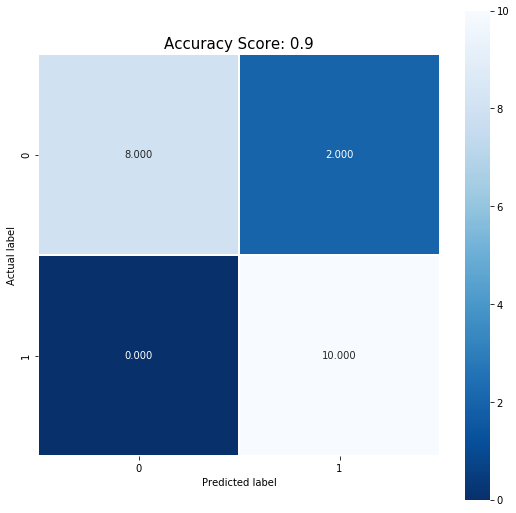

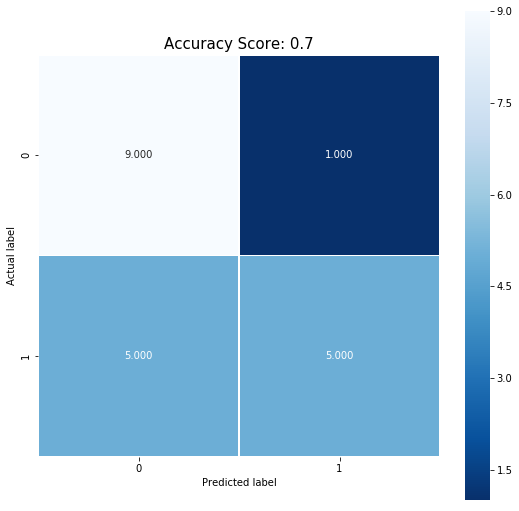

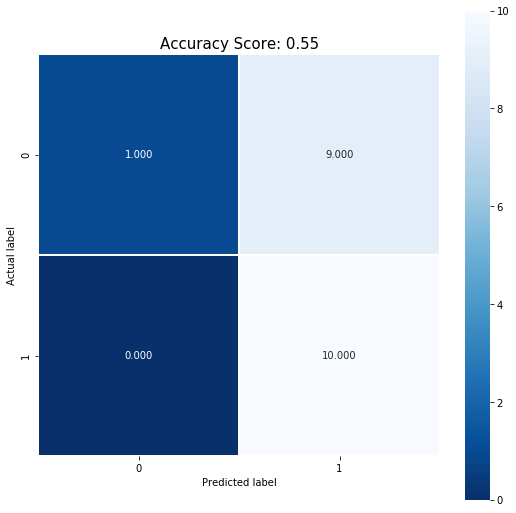

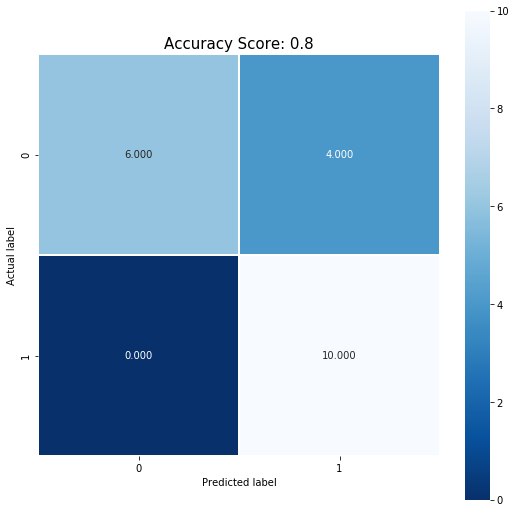

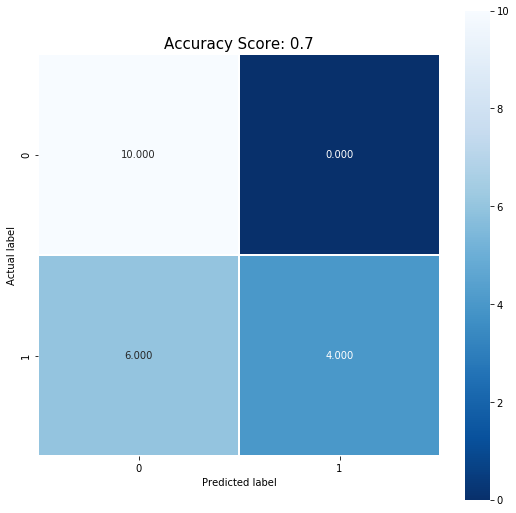

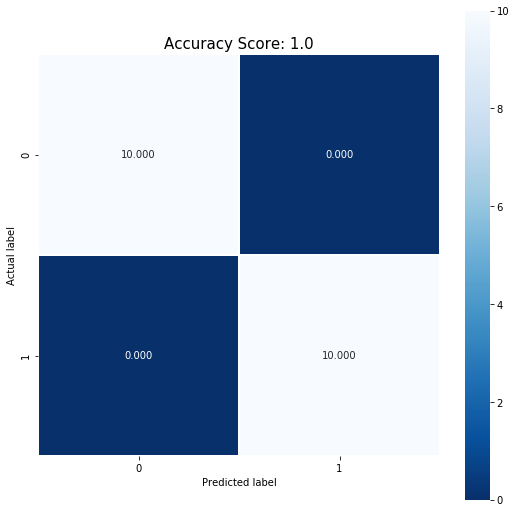

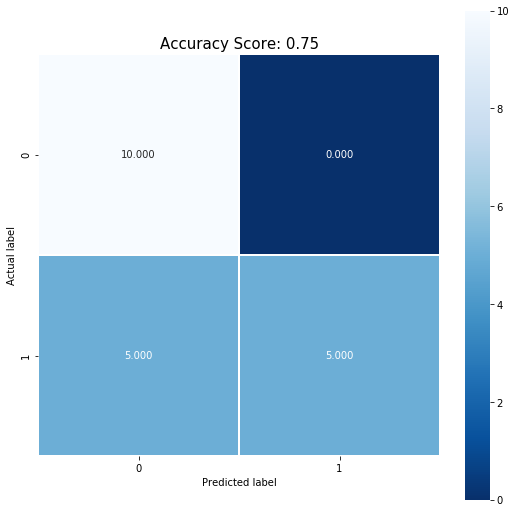

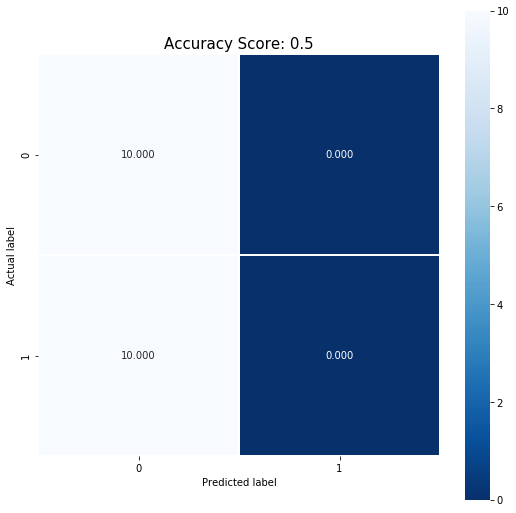

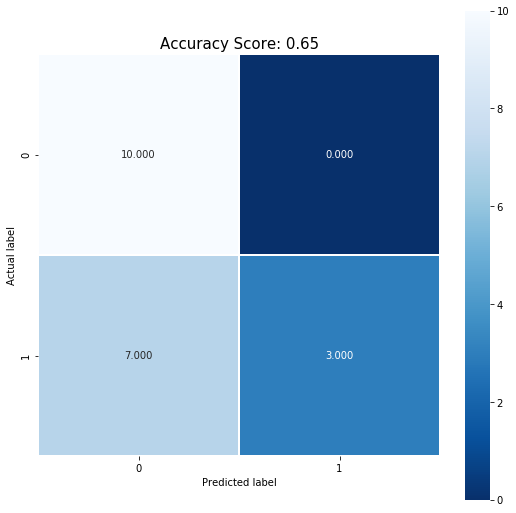

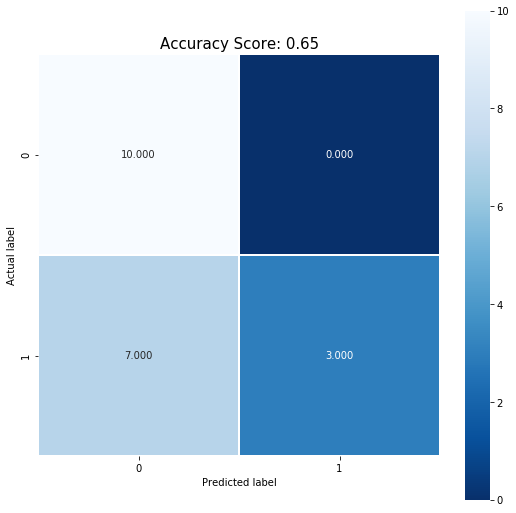

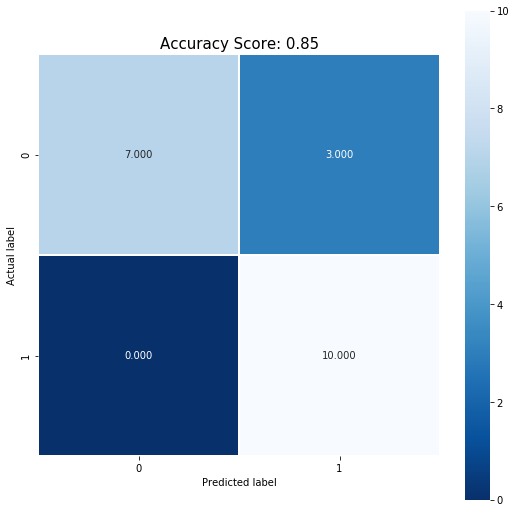

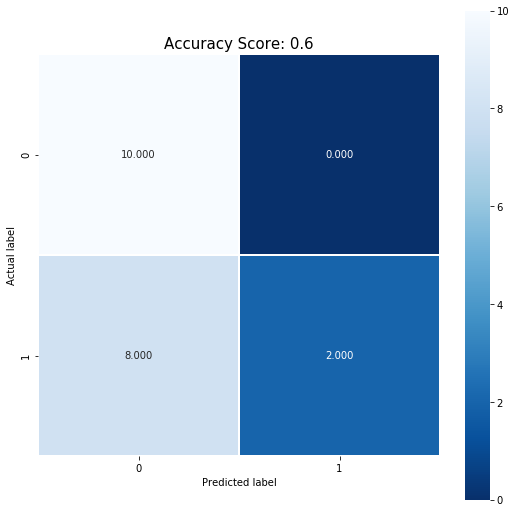

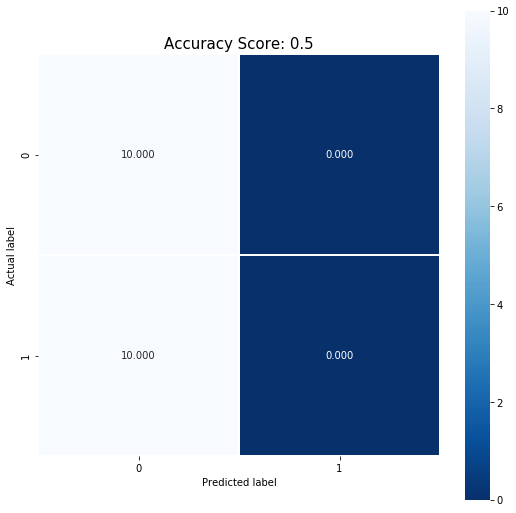

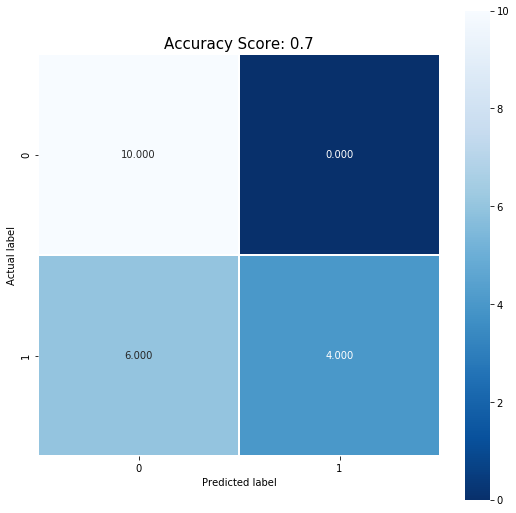

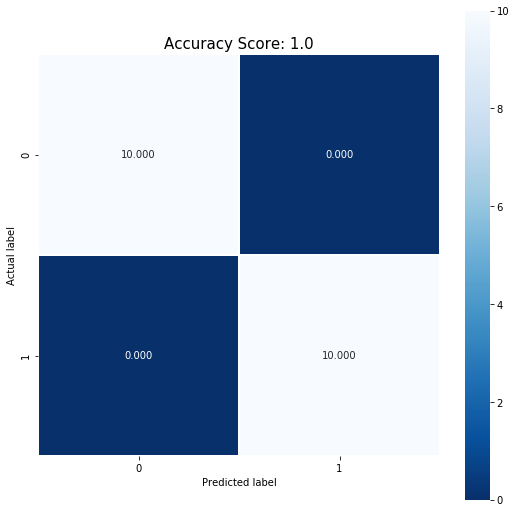

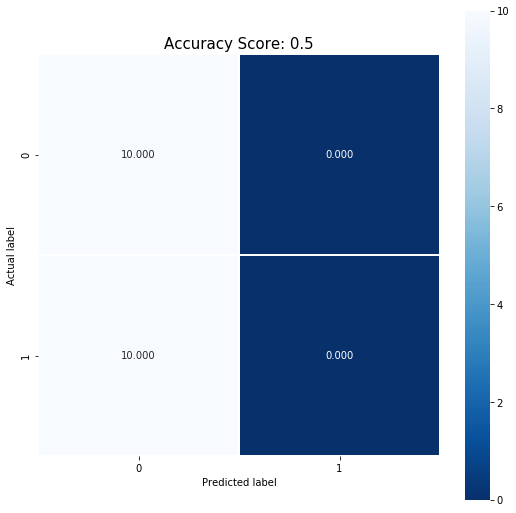

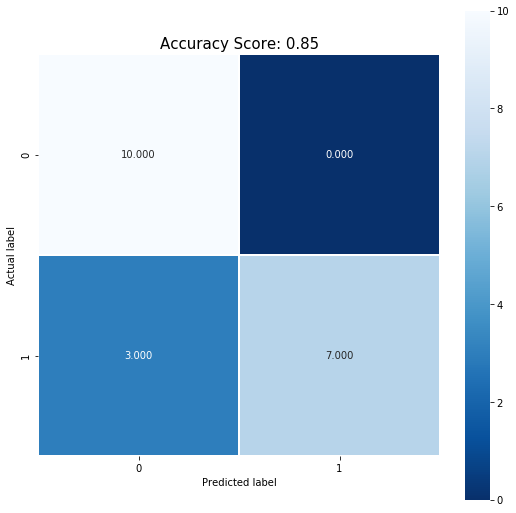

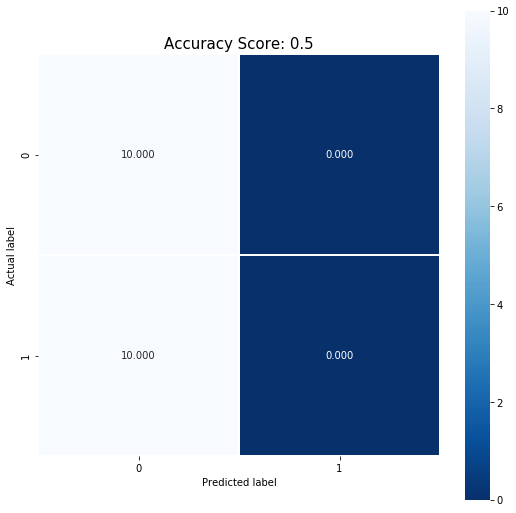

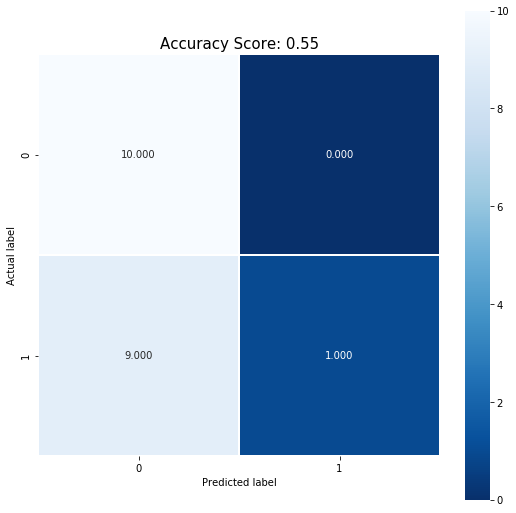

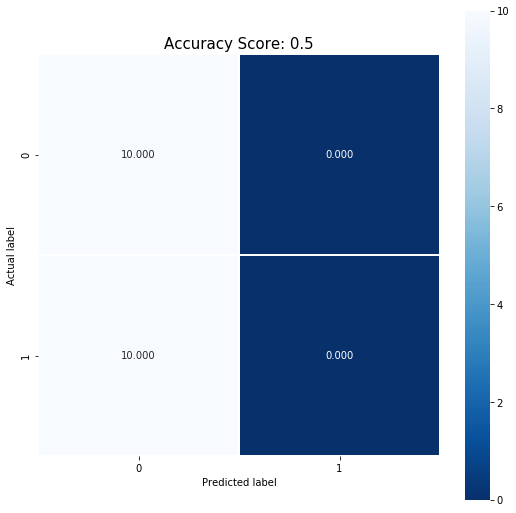

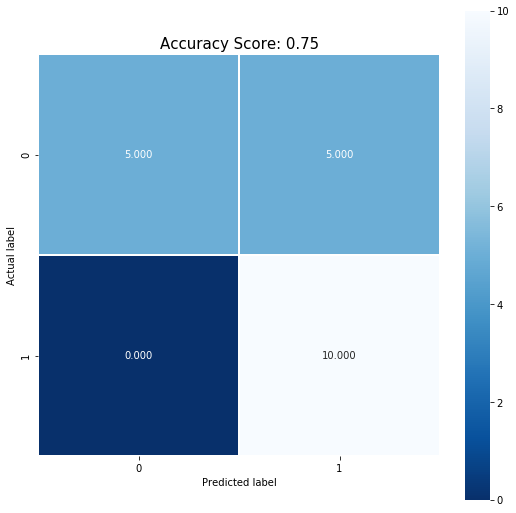

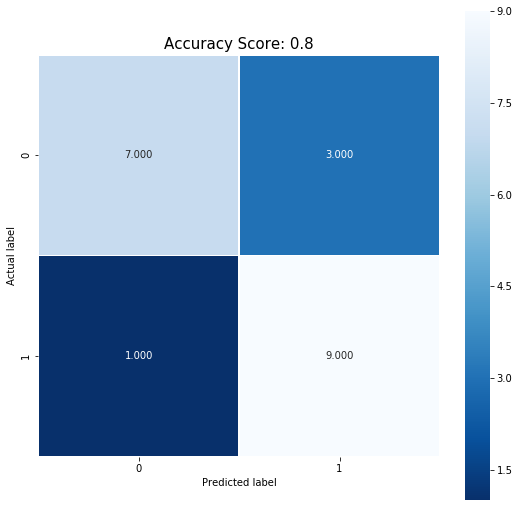

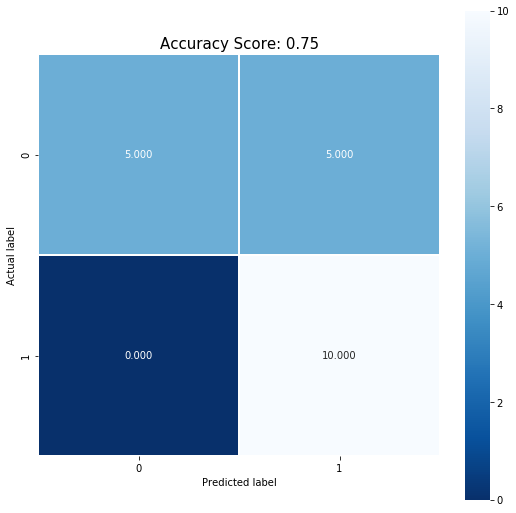

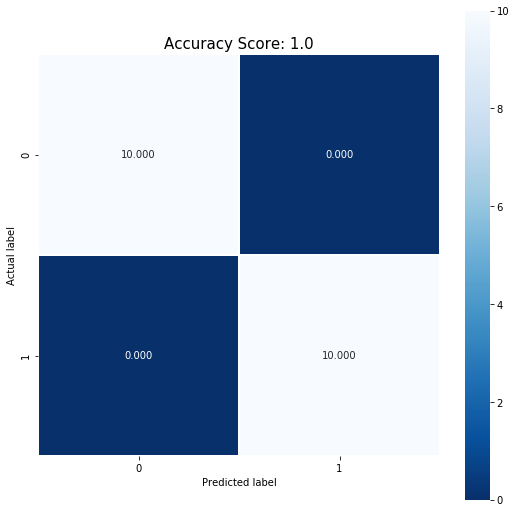

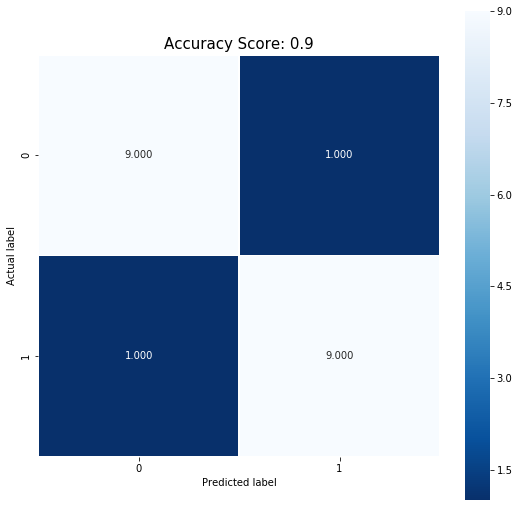

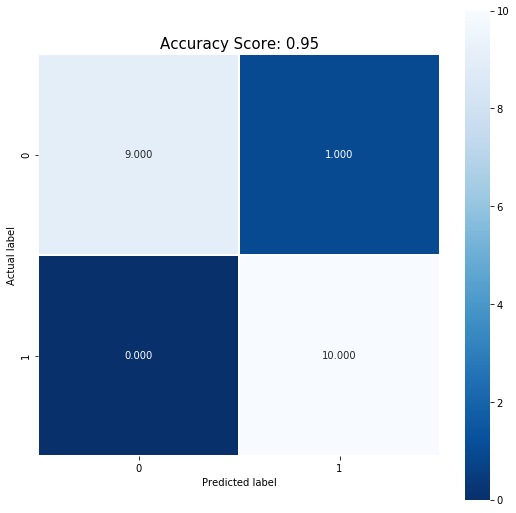

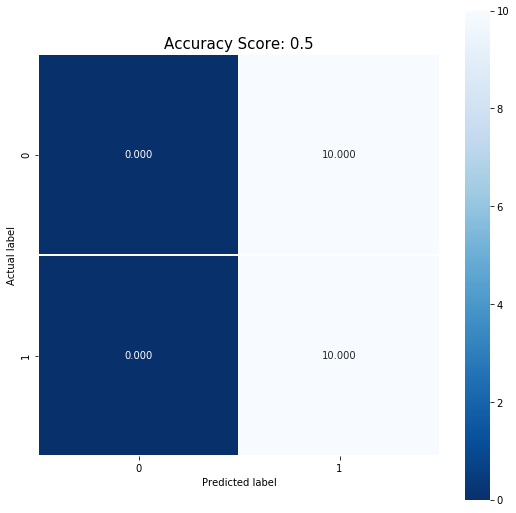

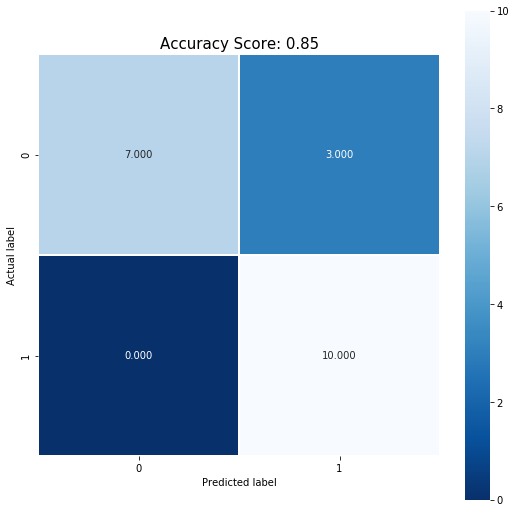

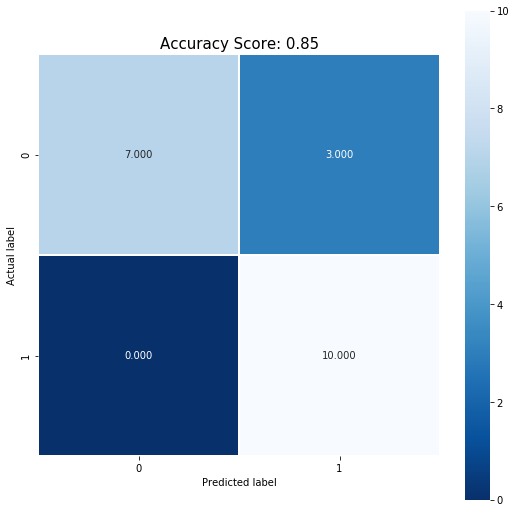

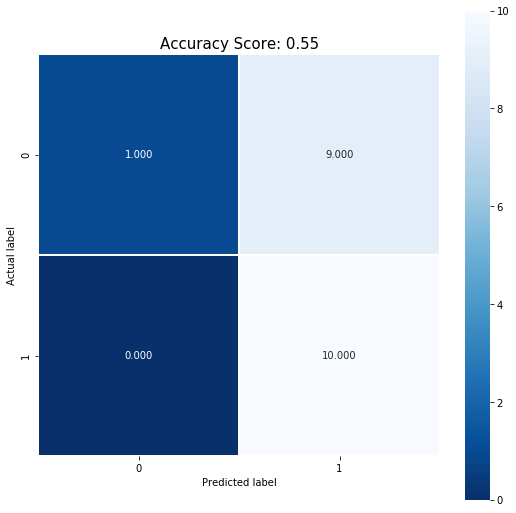

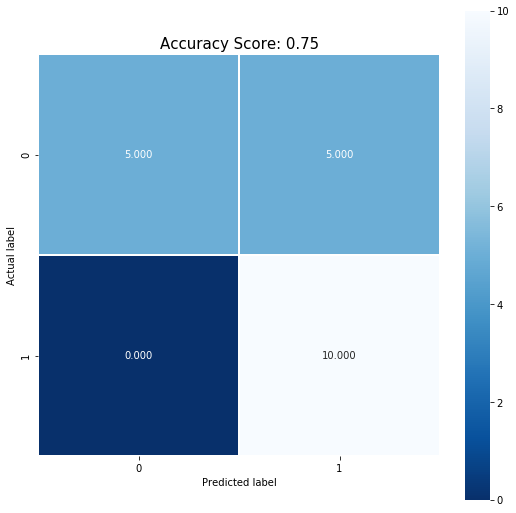

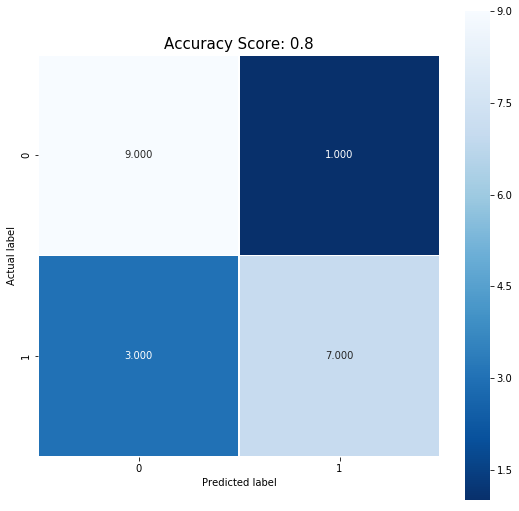

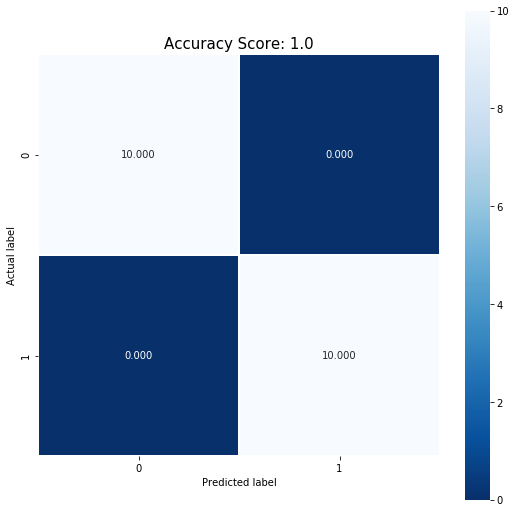

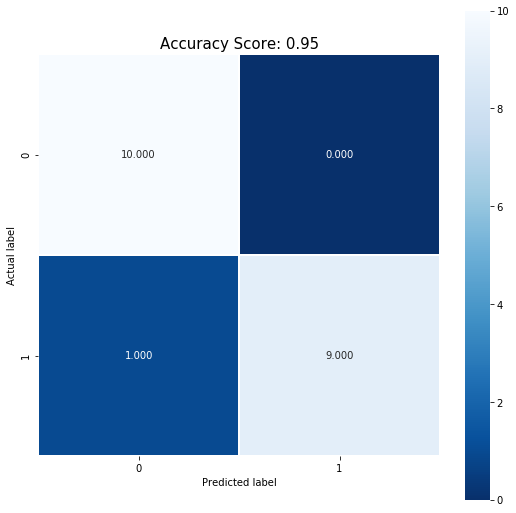

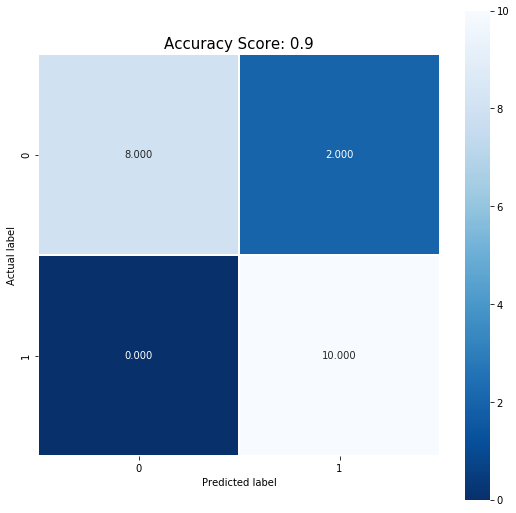

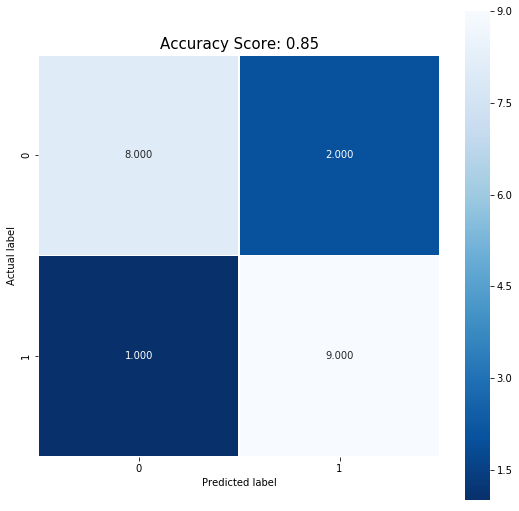

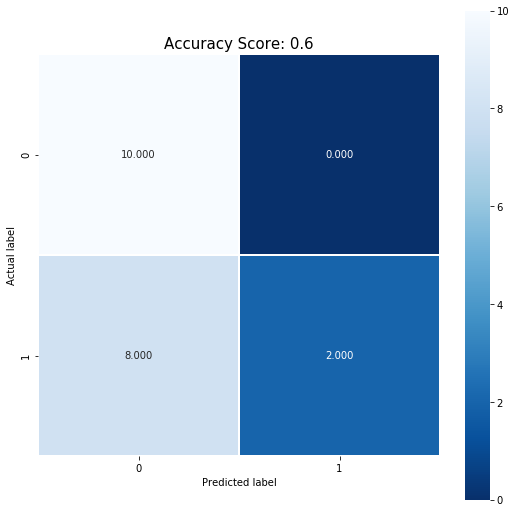

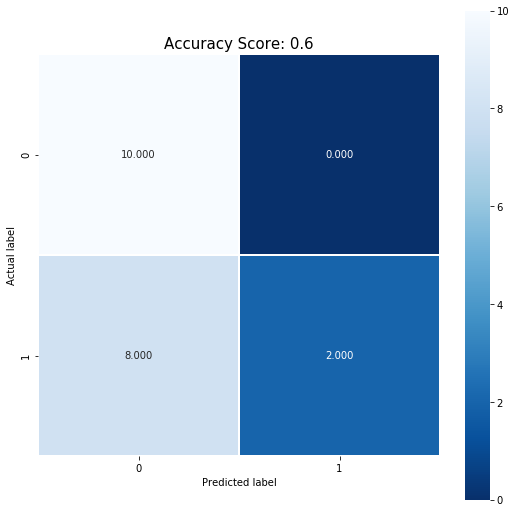

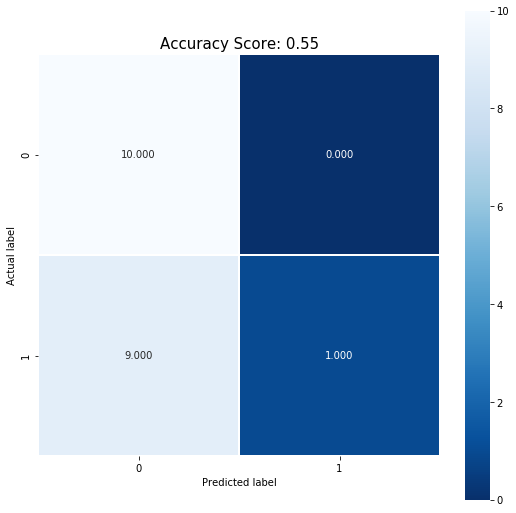

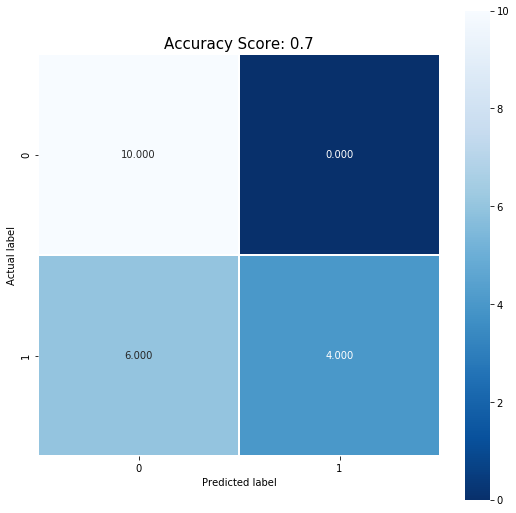

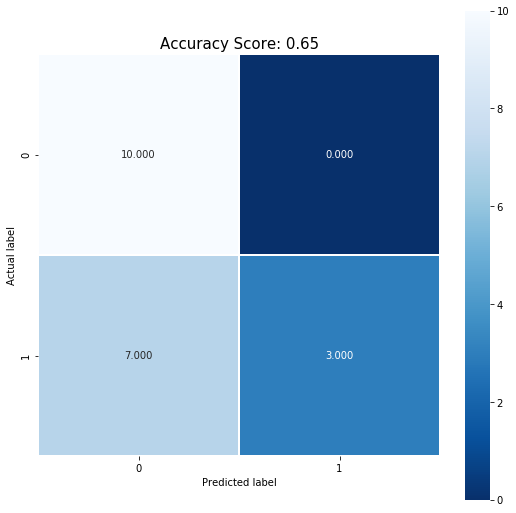

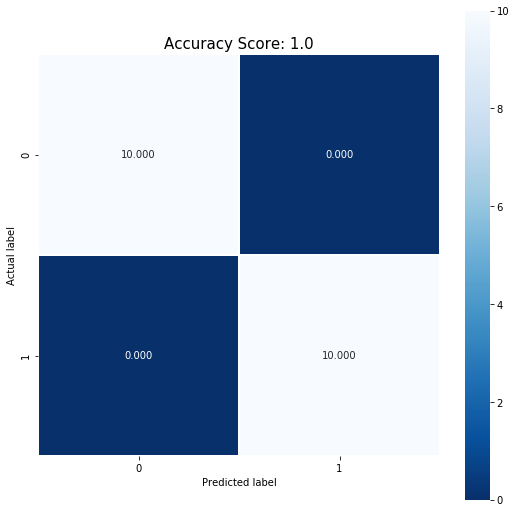

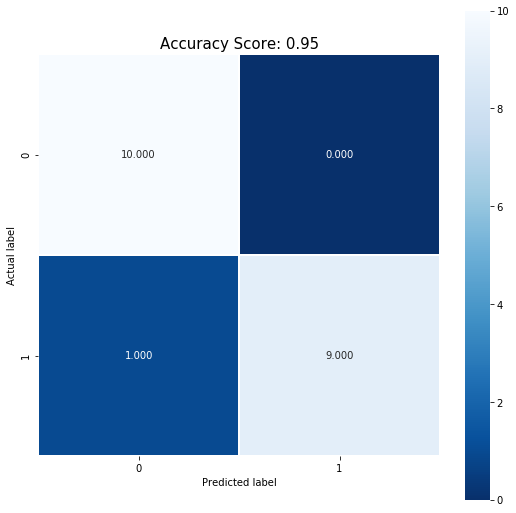

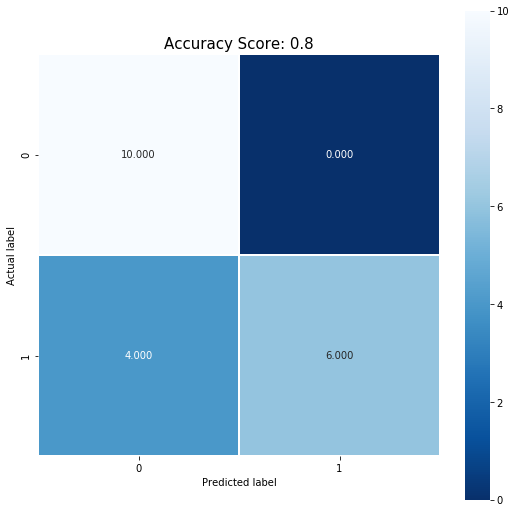

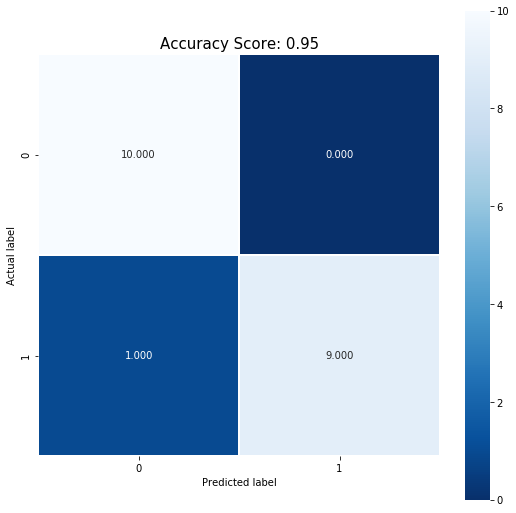

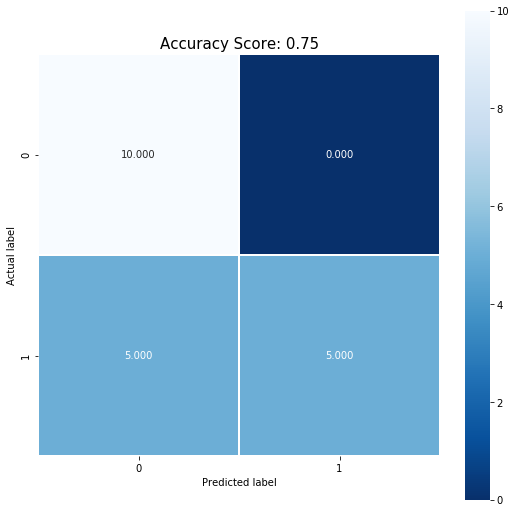

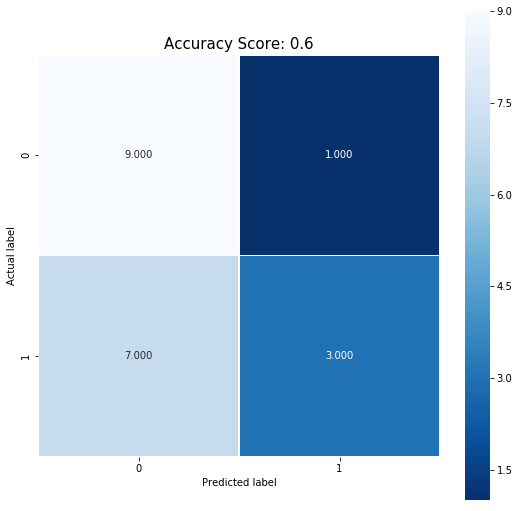

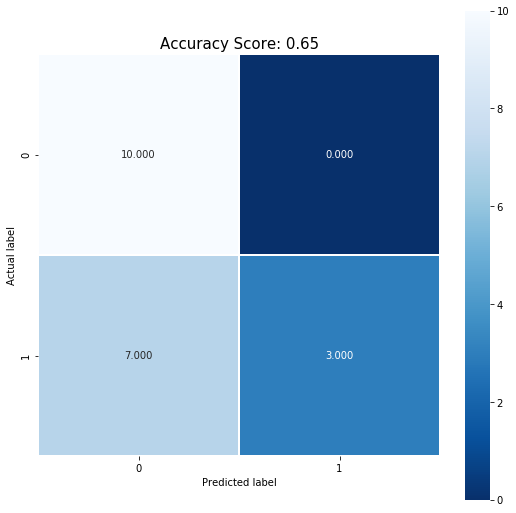

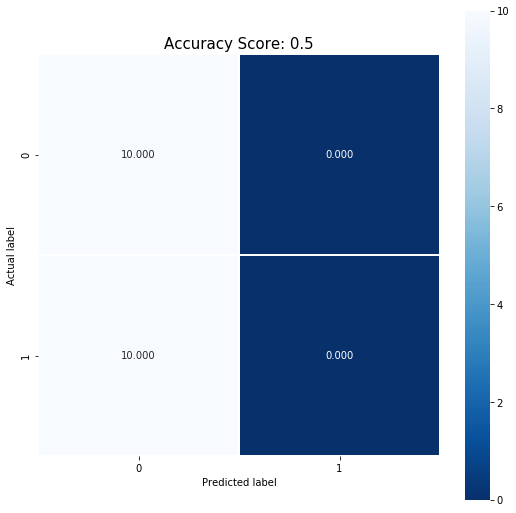

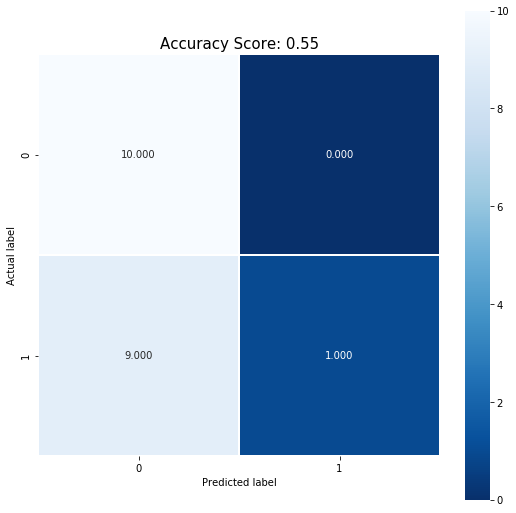

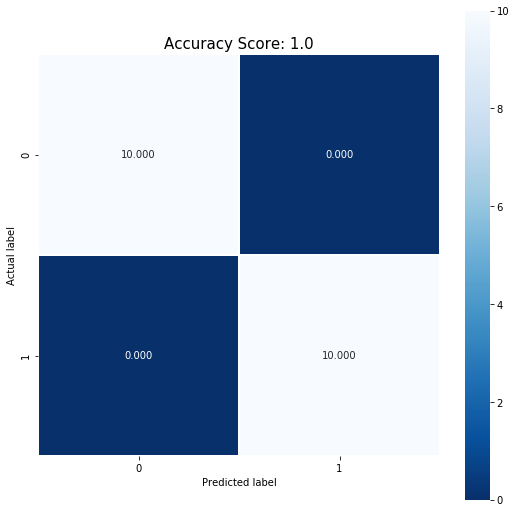

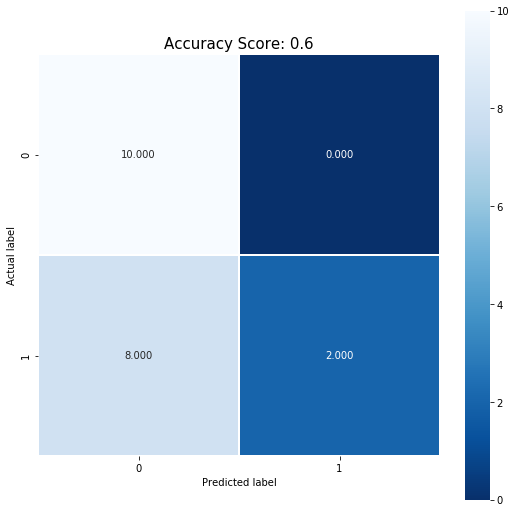

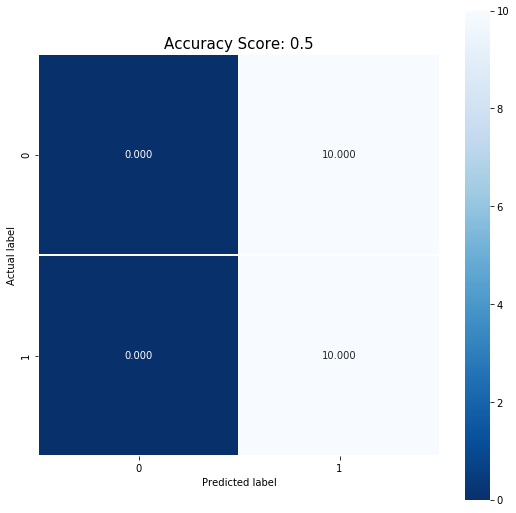

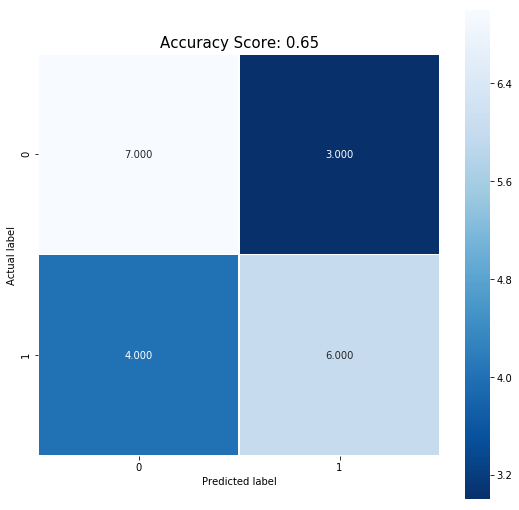

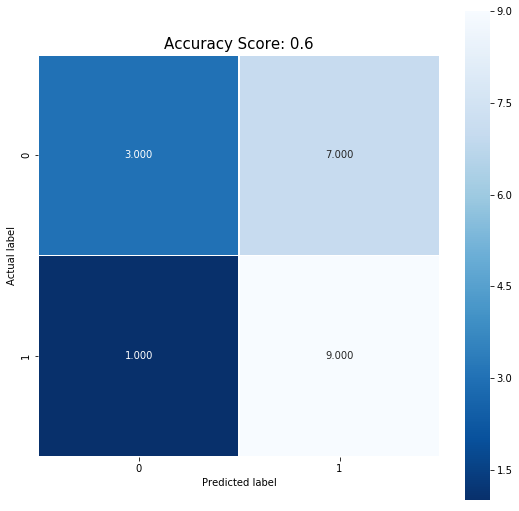

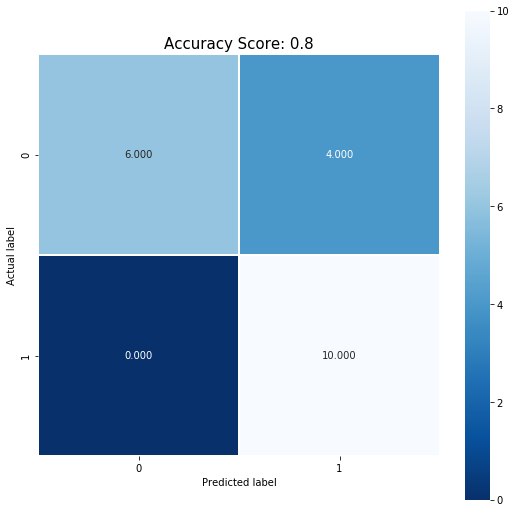

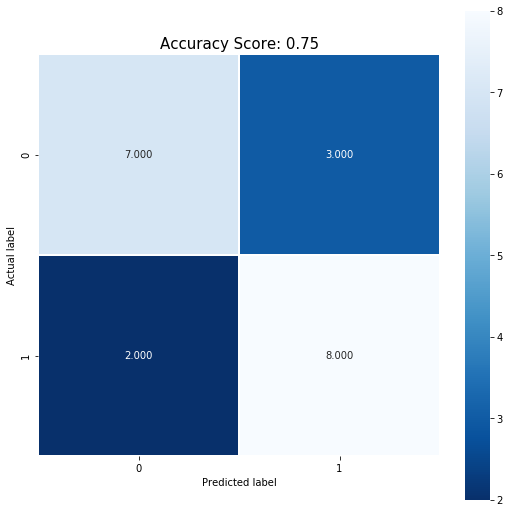

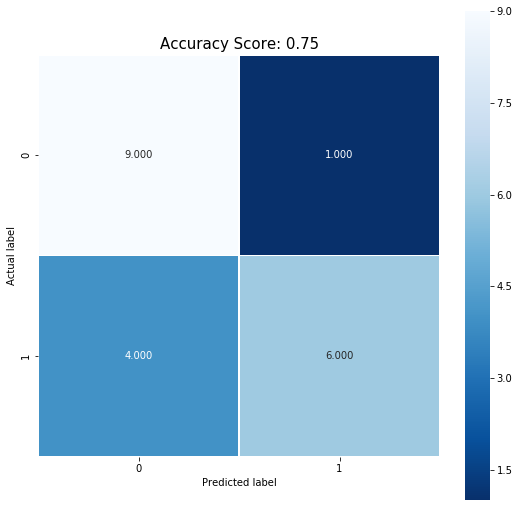

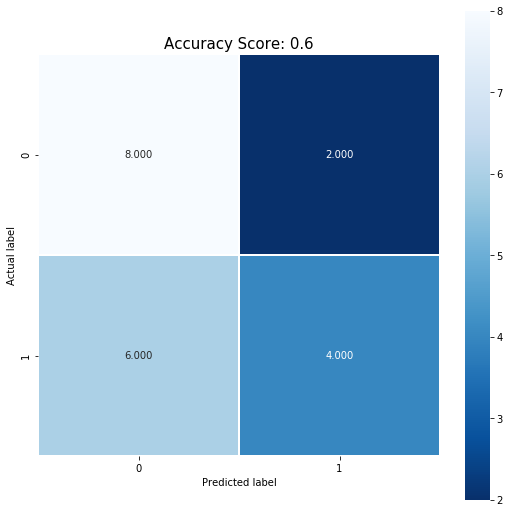

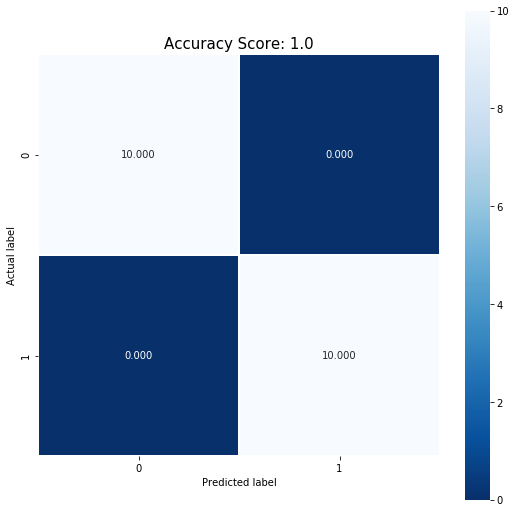

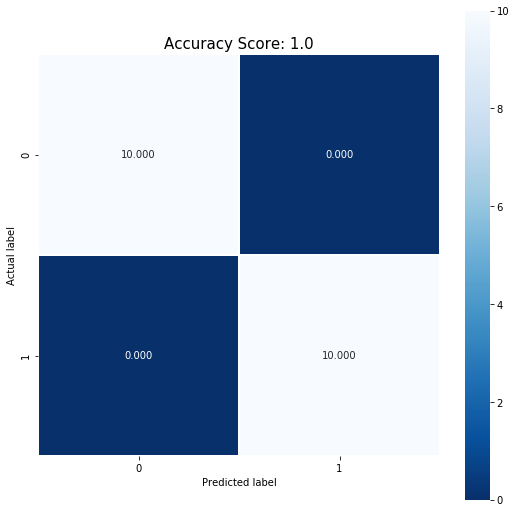

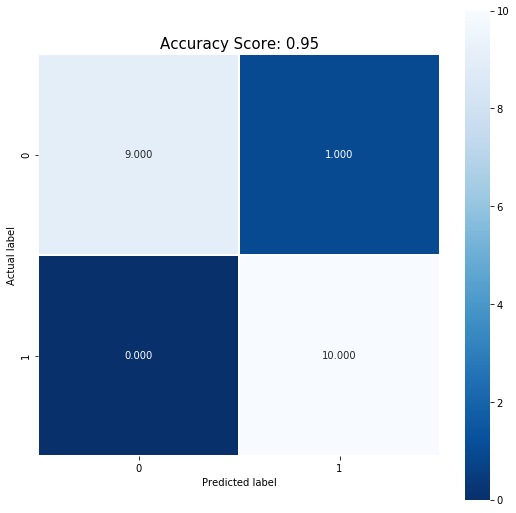

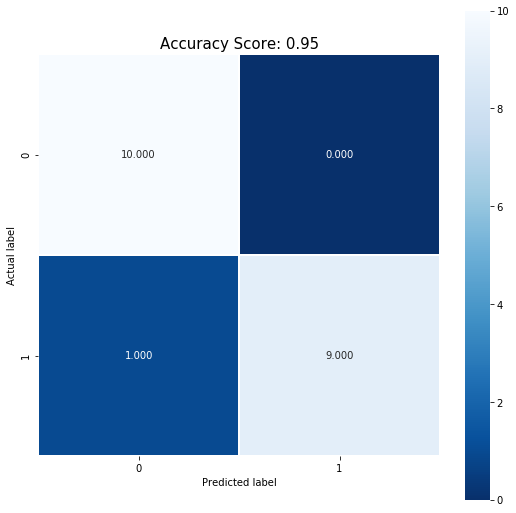

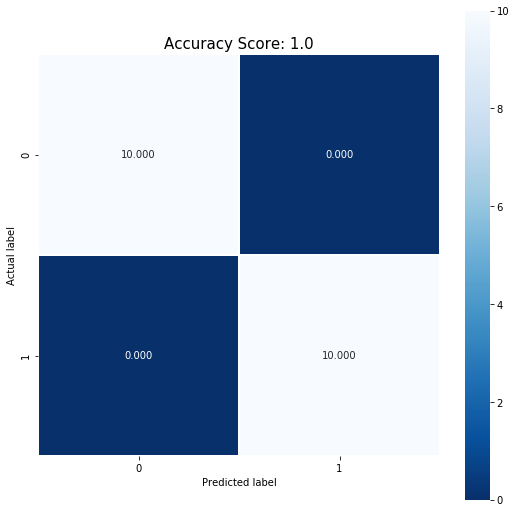

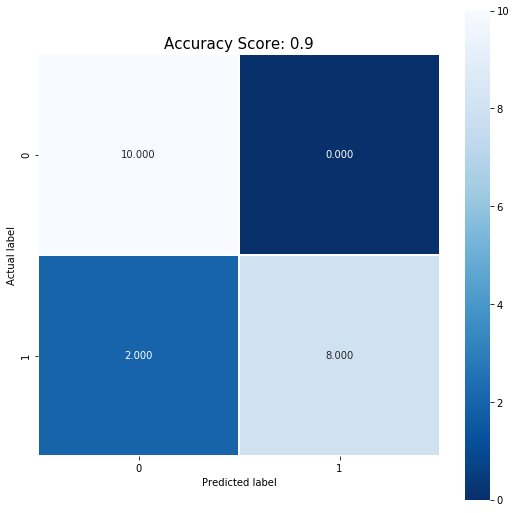

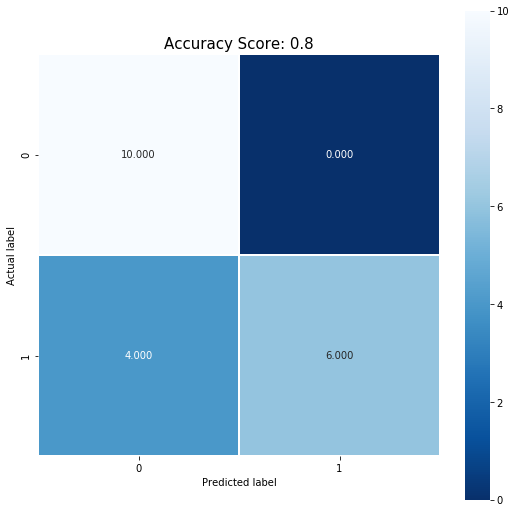

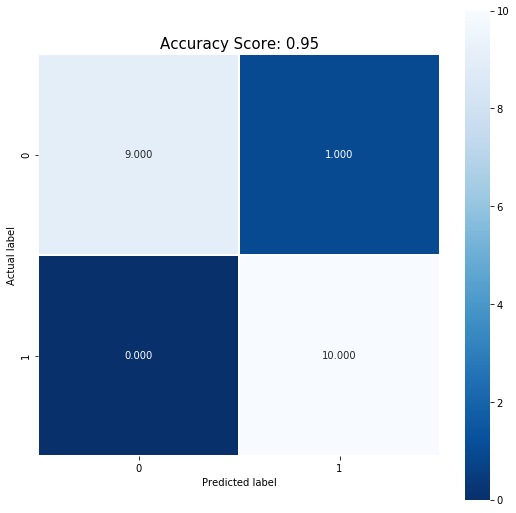

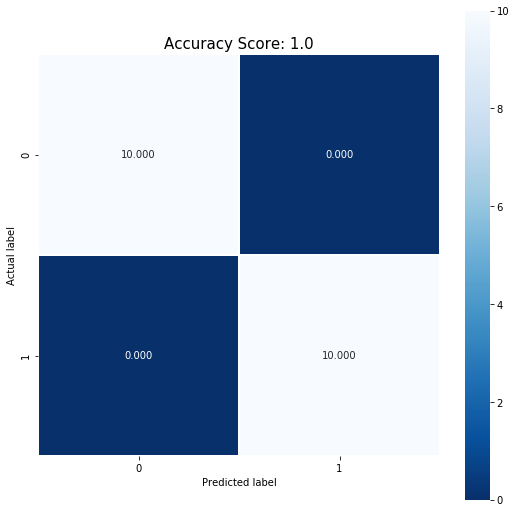

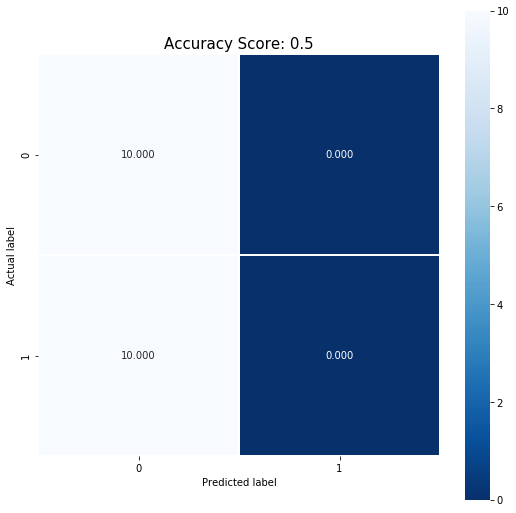

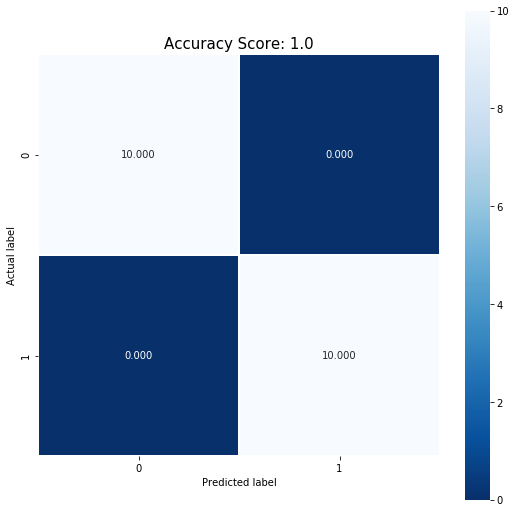

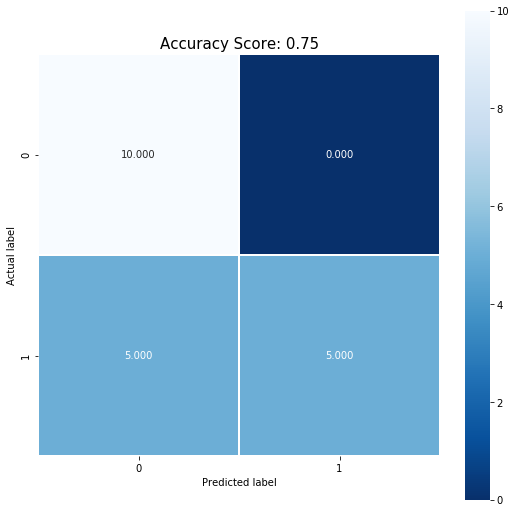

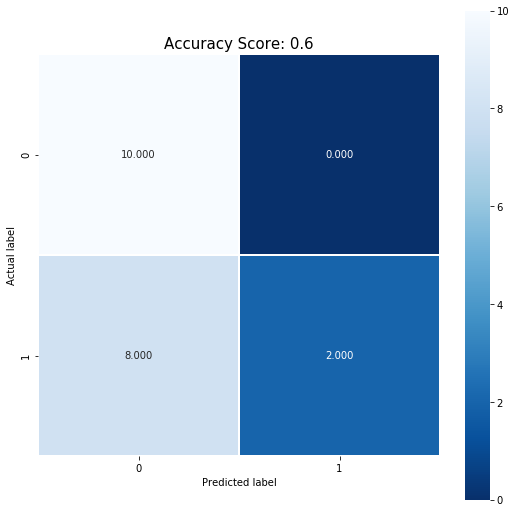

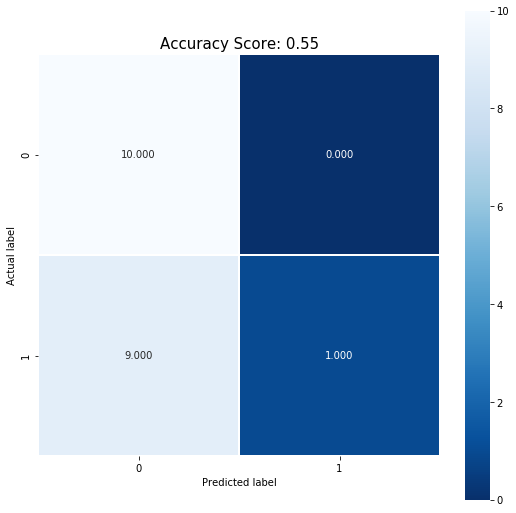

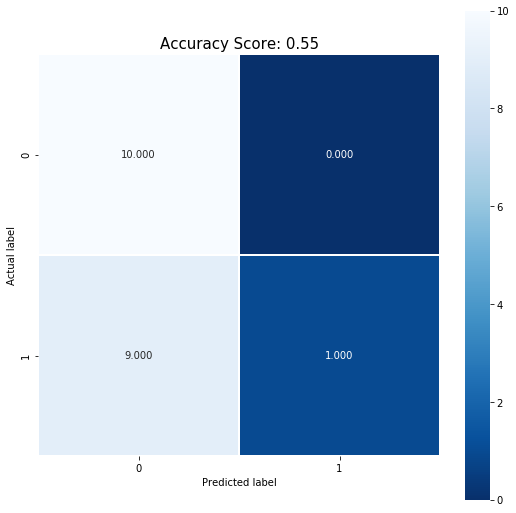

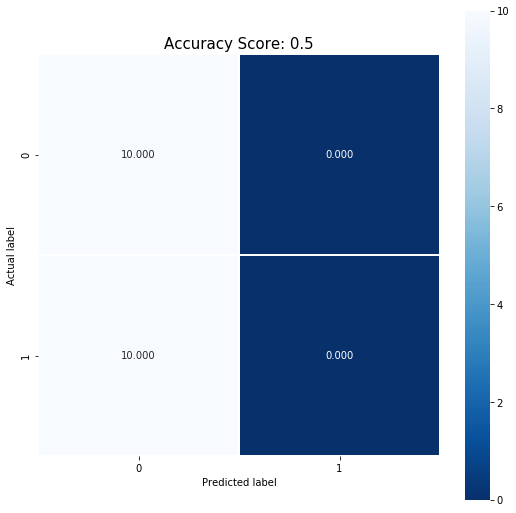

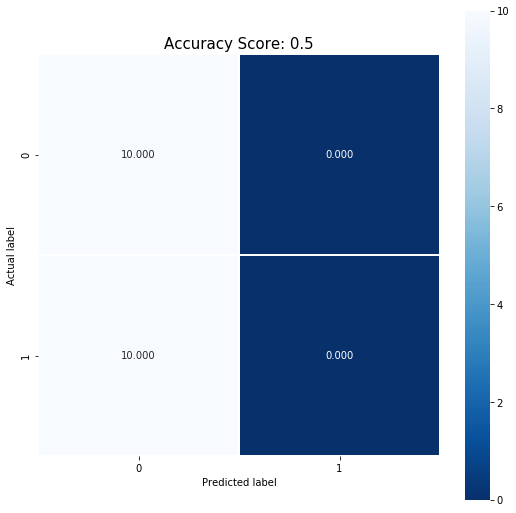

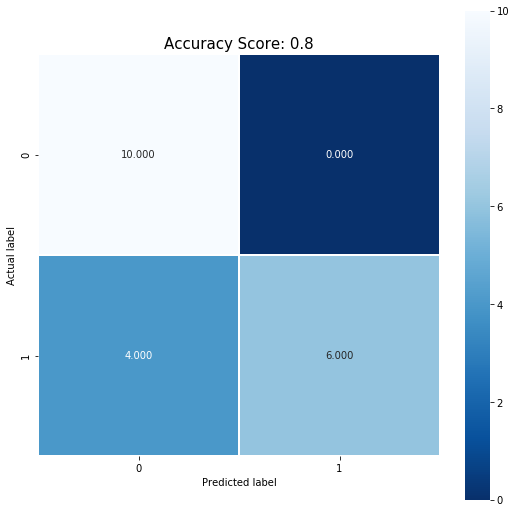

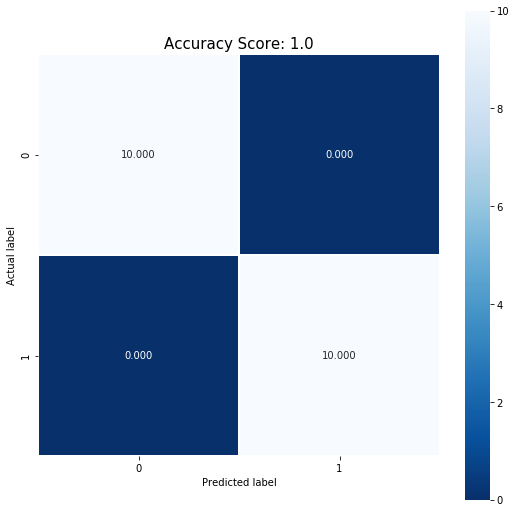

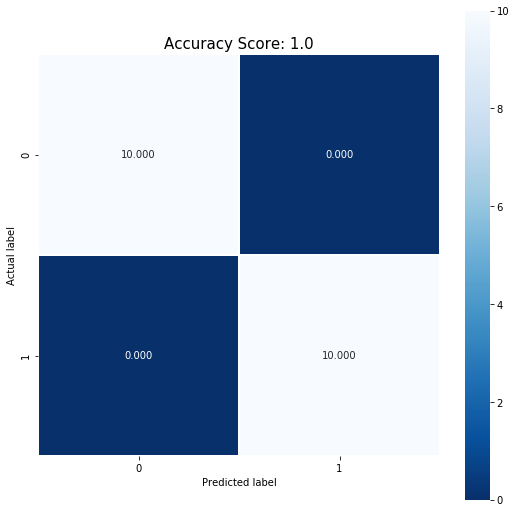

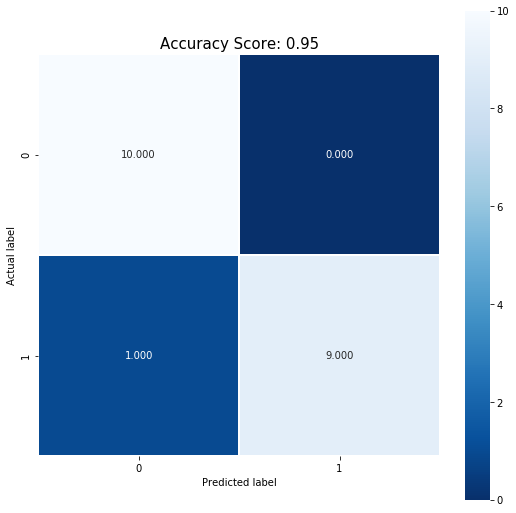

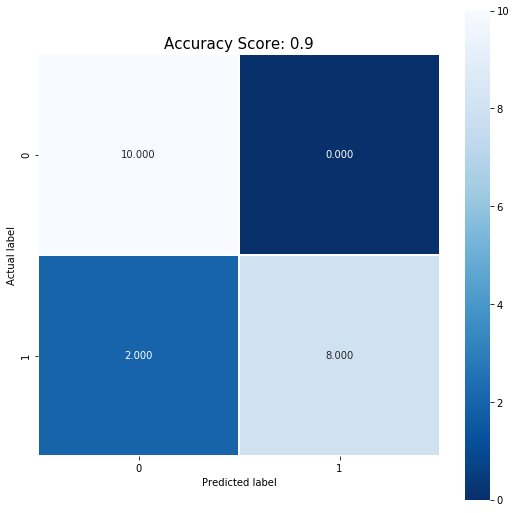

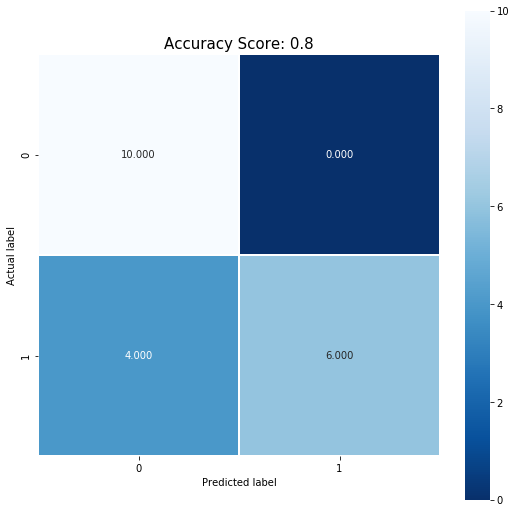

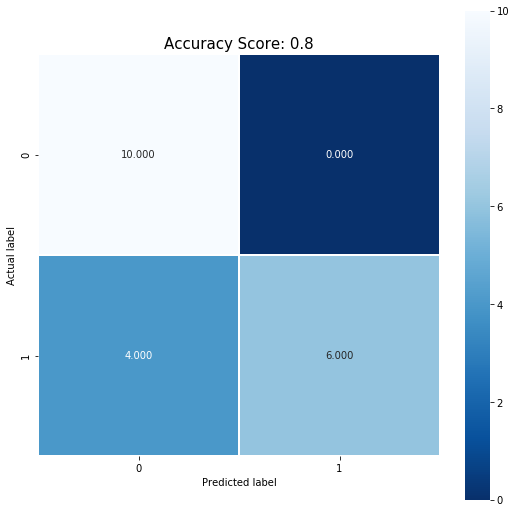

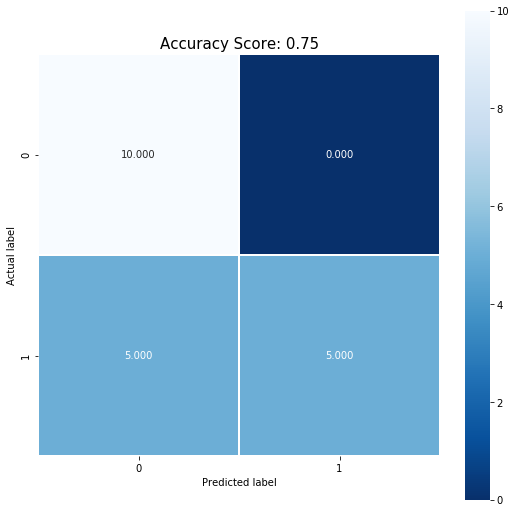

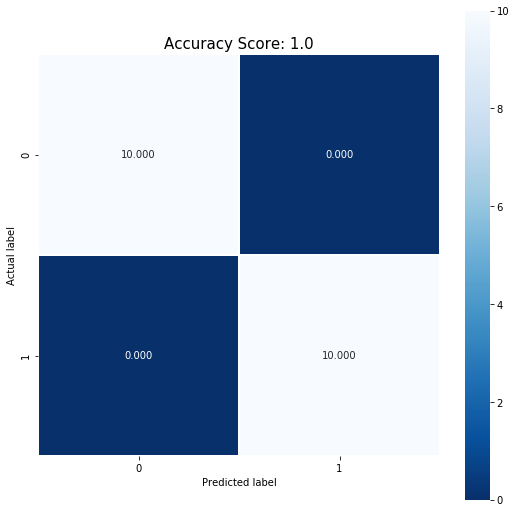

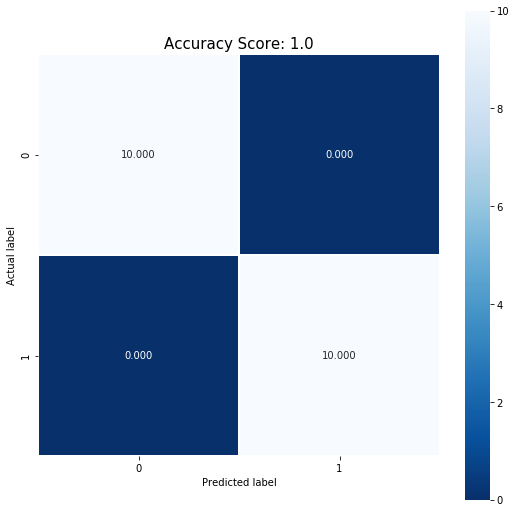

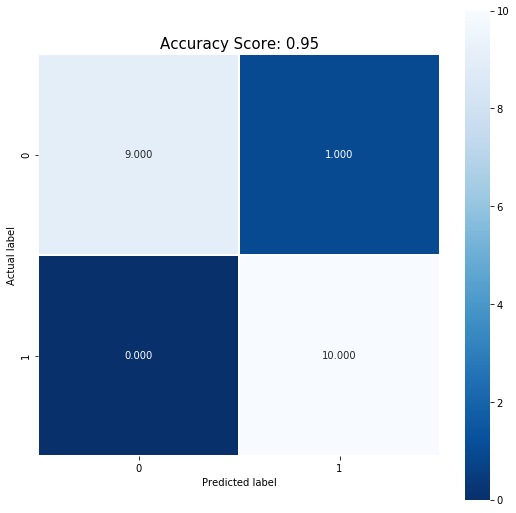

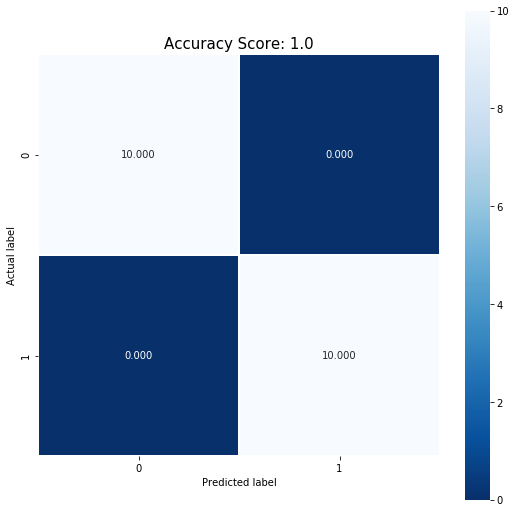

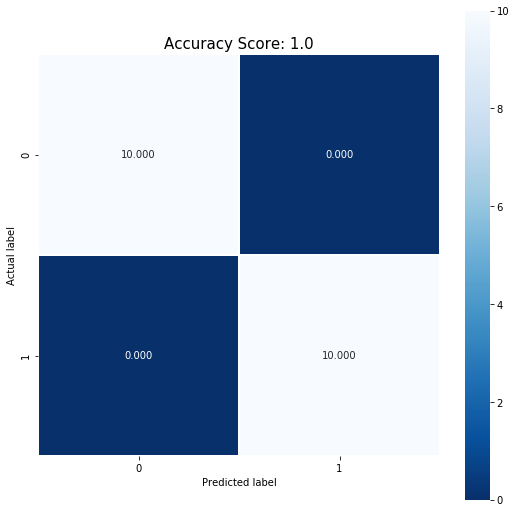

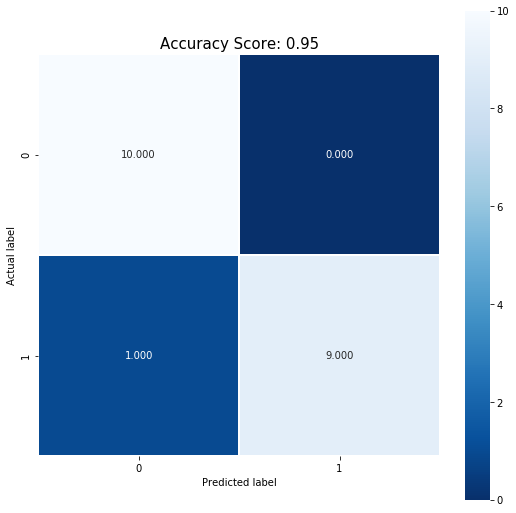

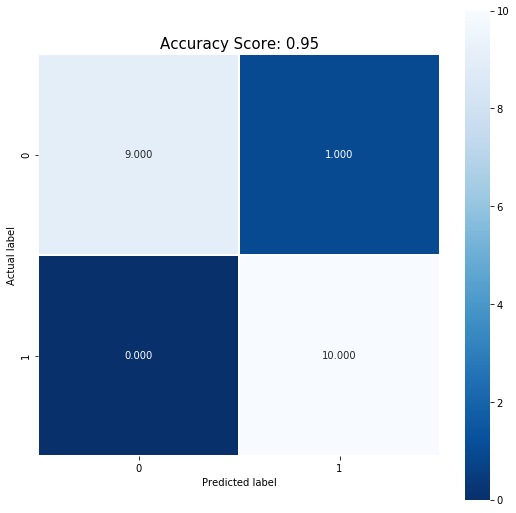

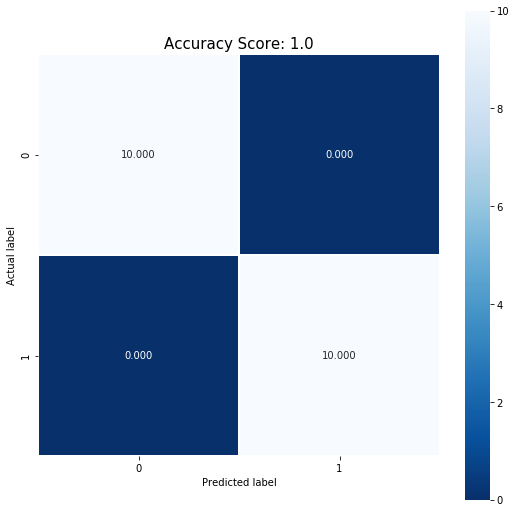

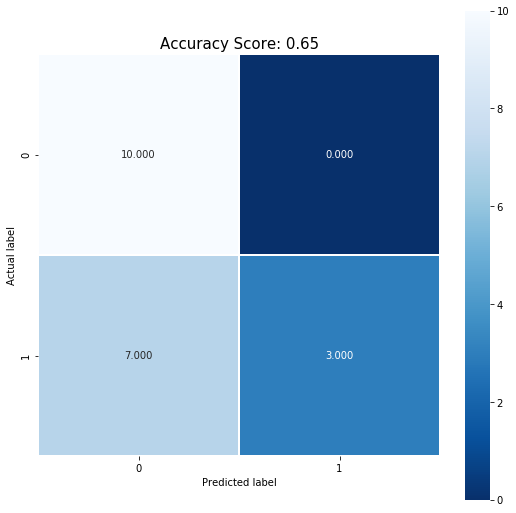

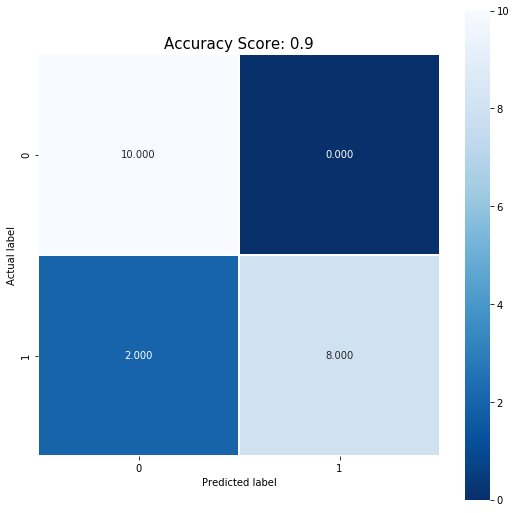

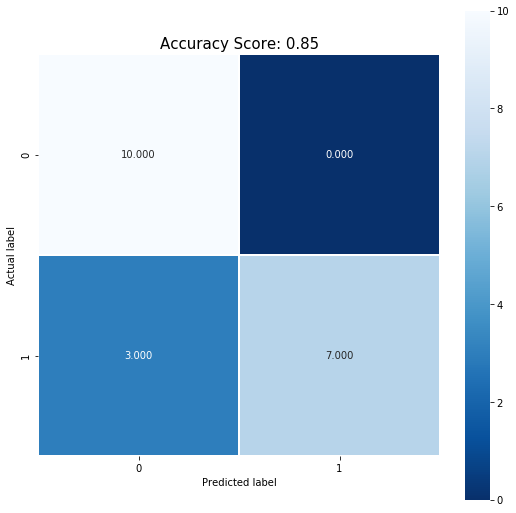

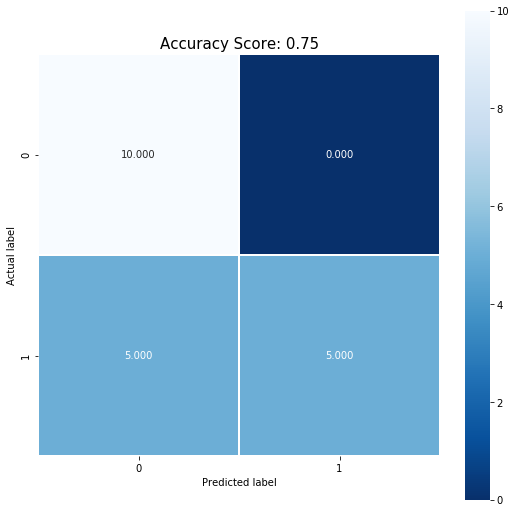

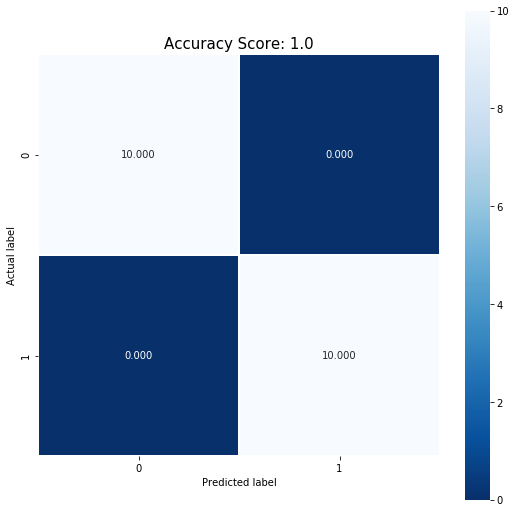

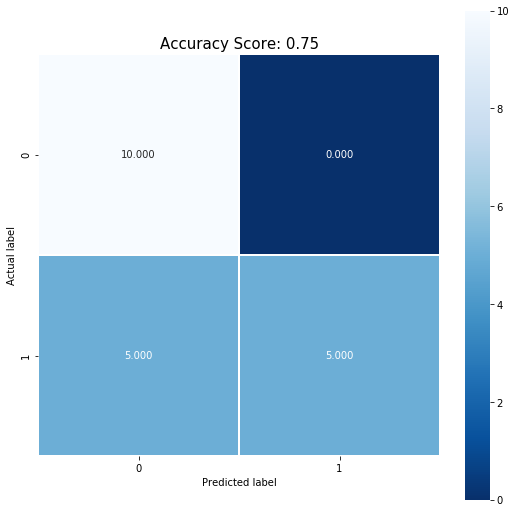

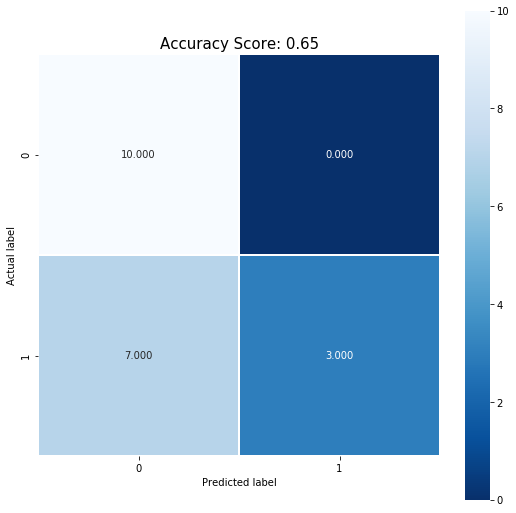

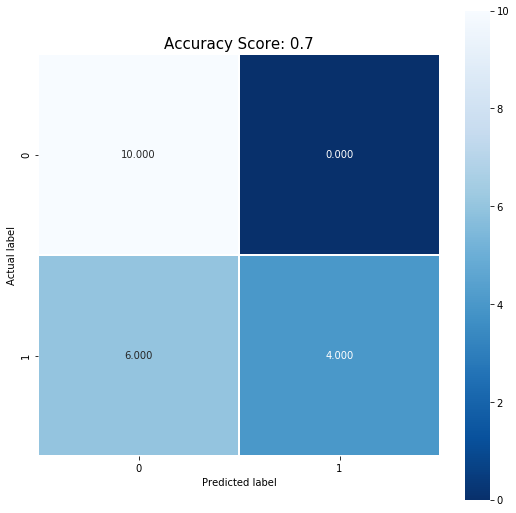

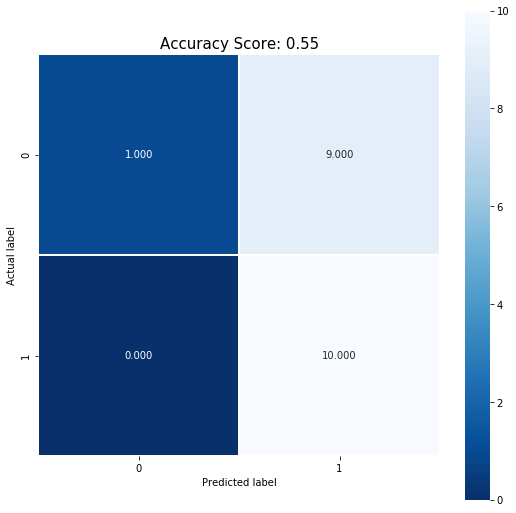

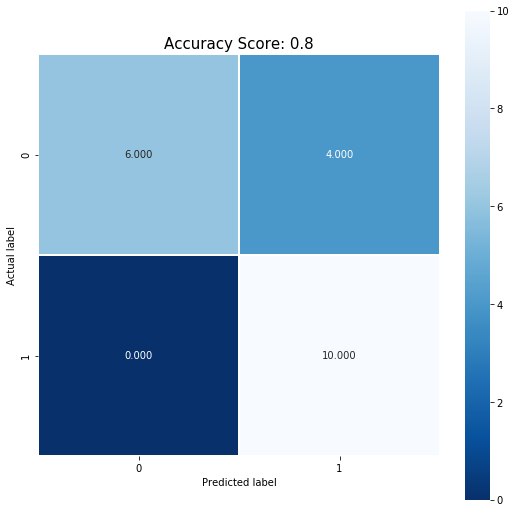

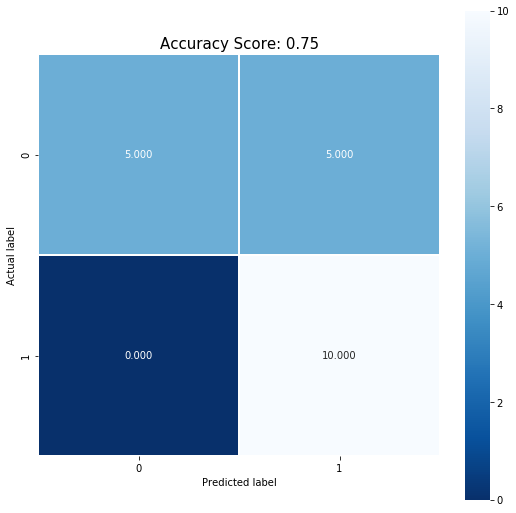

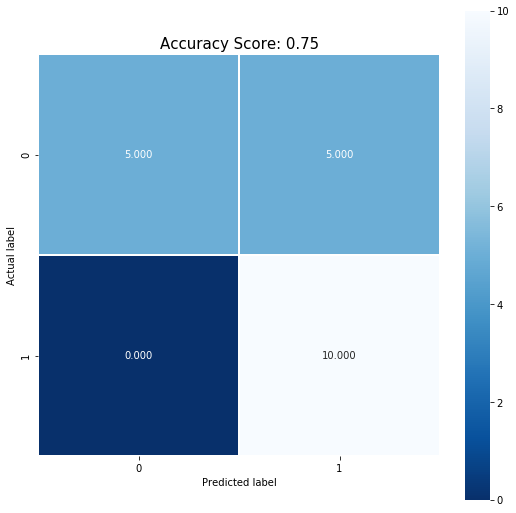

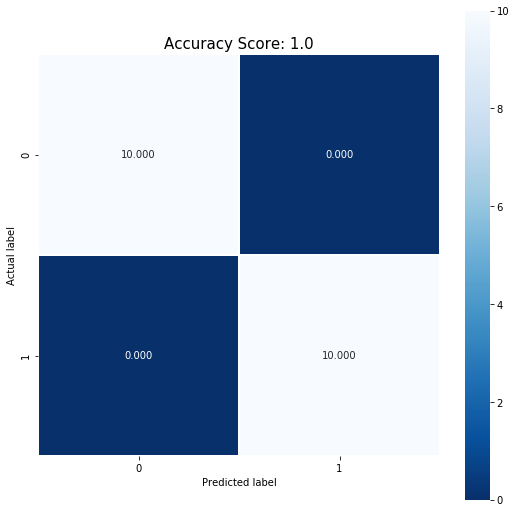

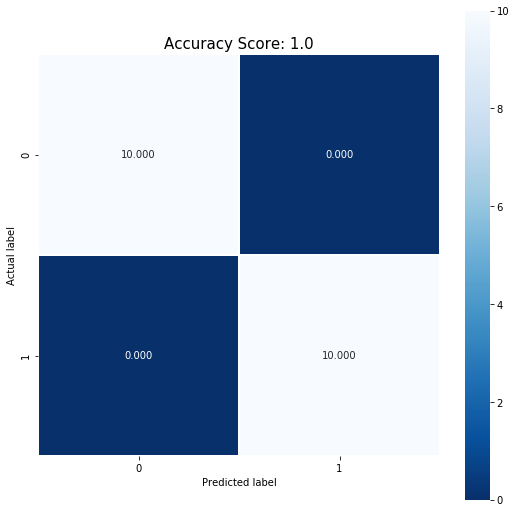

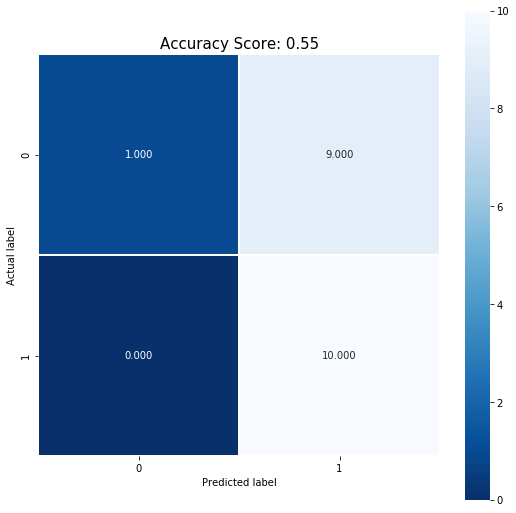

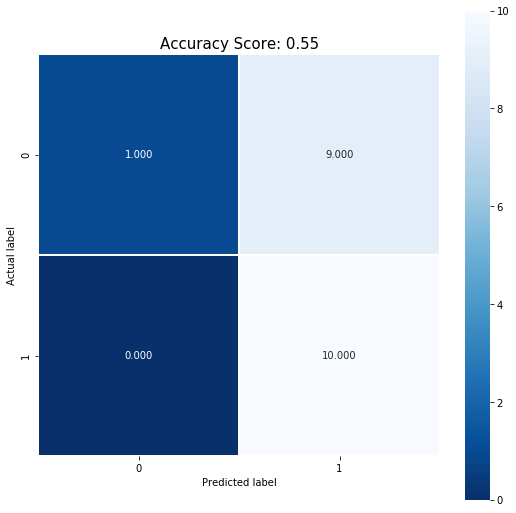

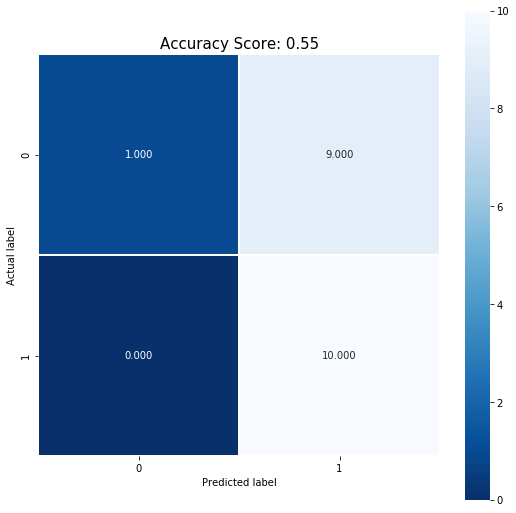

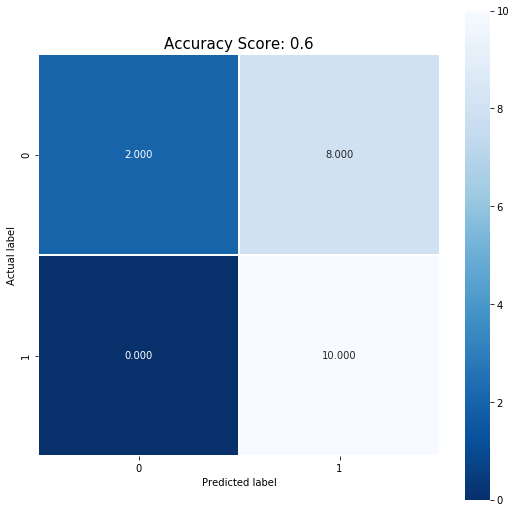

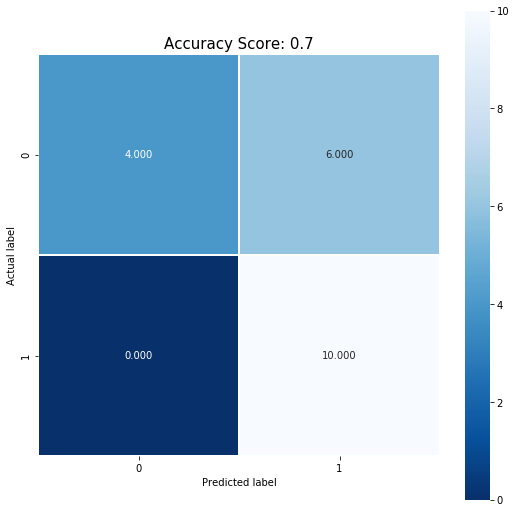

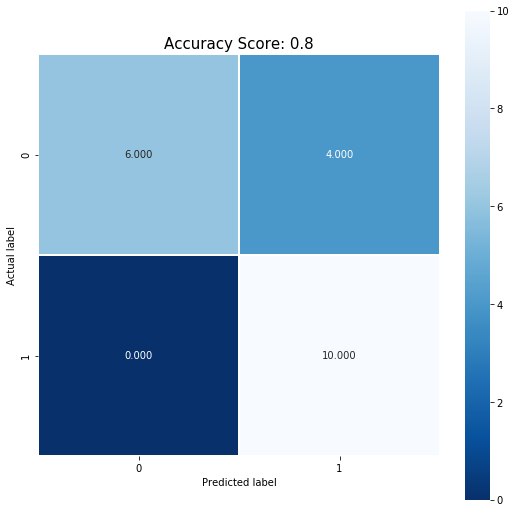

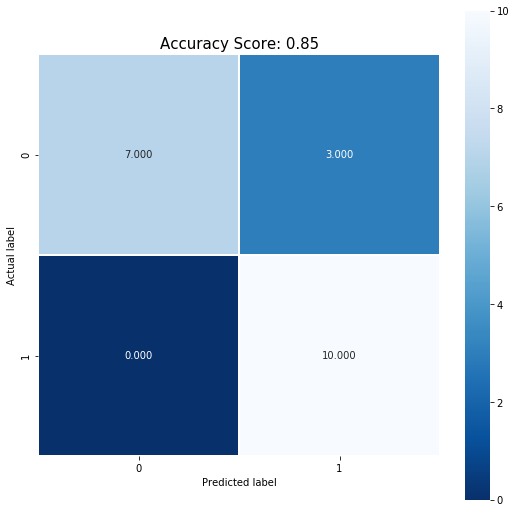

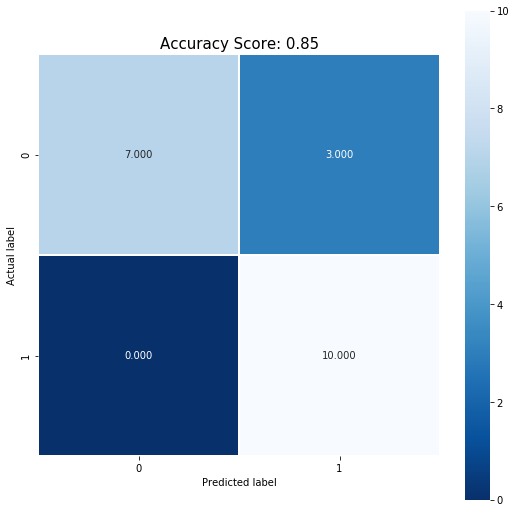

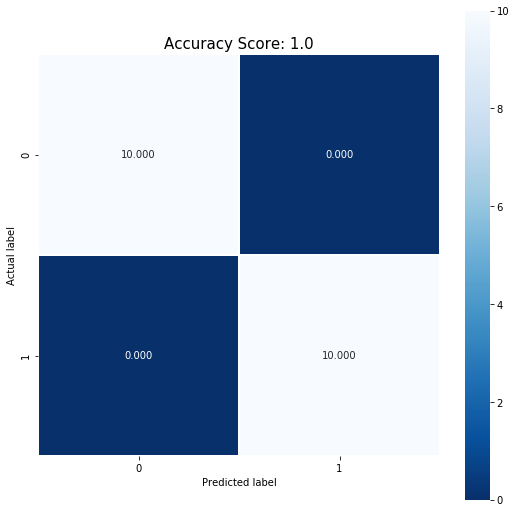

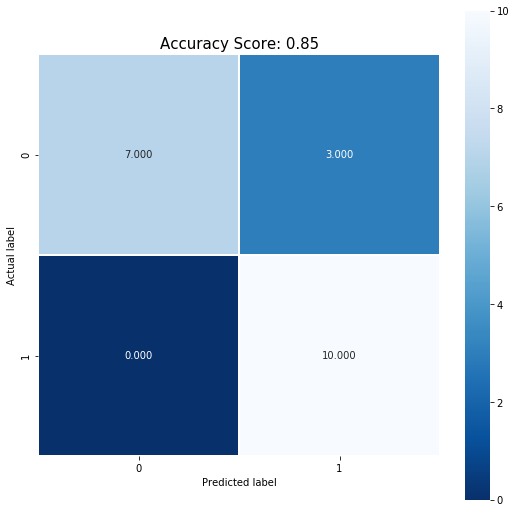

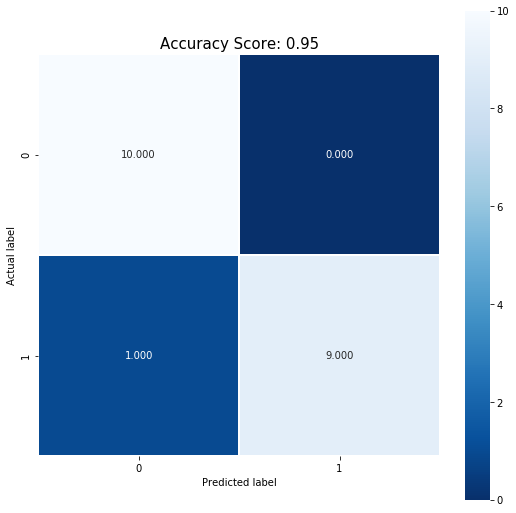

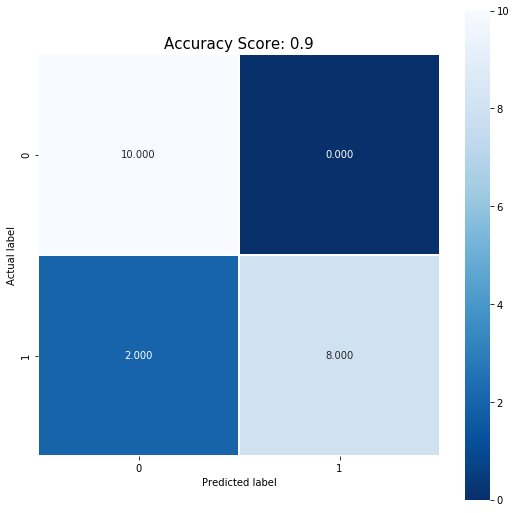

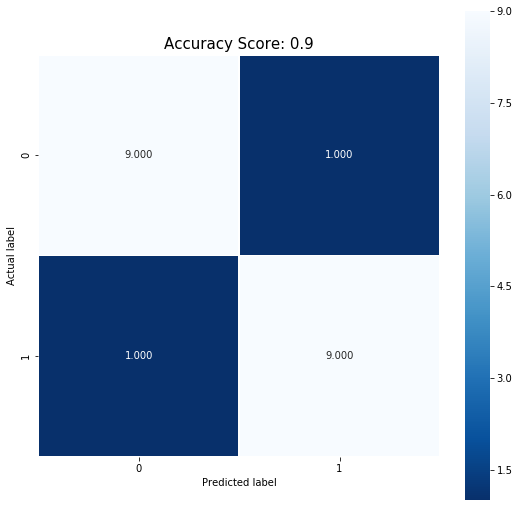

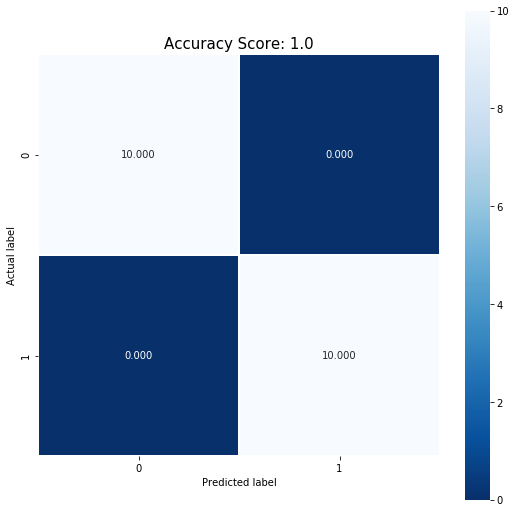

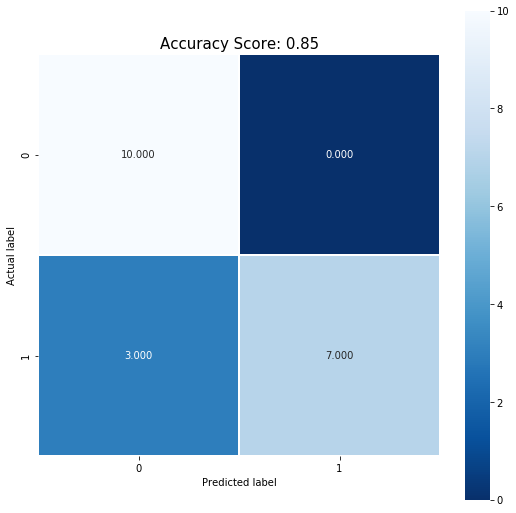

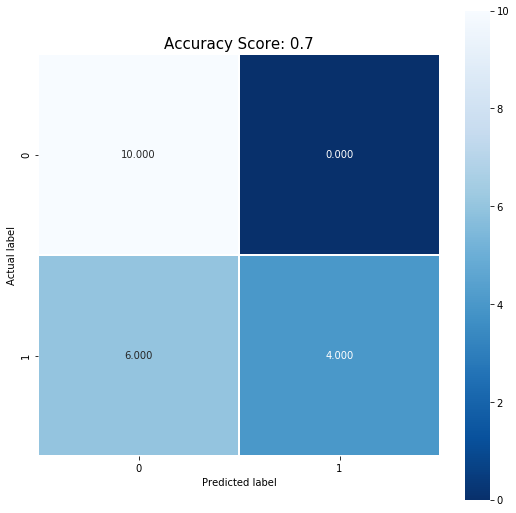

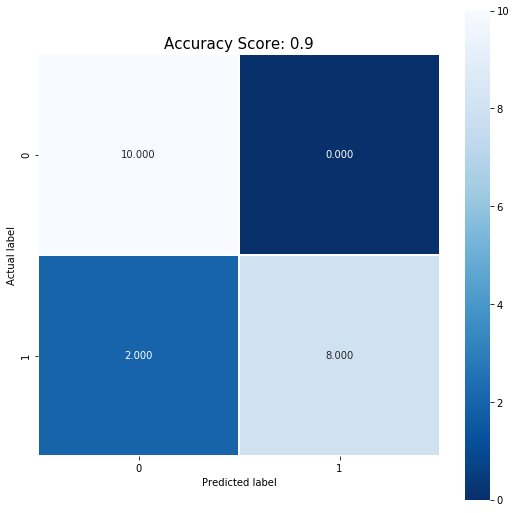

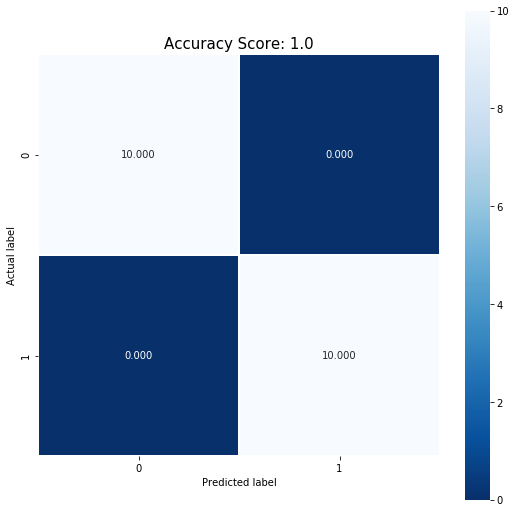

In [4]:
taskName=['mem','mixed','motor']
for t in taskName:
    logDS(t)

In [3]:
def logSS(subid='sub', trainList=['mem','mixed','motor'], predictList=['mem','mixed','motor']):
    from sklearn.linear_model import LogisticRegression
    import numpy as np
    import reshape
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    import plotFW
    from sklearn.model_selection import cross_val_score
    from sklearn import metrics
    from sklearn.model_selection import train_test_split
# all parameters not specified are set to their defaults
# default solver is incredibly slow thats why we change it
    logisticRegr = LogisticRegression(solver = 'lbfgs')
    accTable=[]
    cvTable=[]
    for i in trainList:
        #Load task FC
        taskFC=reshape.matFiles('/Users/aporter1350/Desktop/MSC_Alexis/analysis/data/mvpa_data/' +i+ '/' +subid+ '_parcel_corrmat.mat')
        #Load rest
        restFC=reshape.matFiles('/Users/aporter1350/Desktop/MSC_Alexis/analysis/data/mvpa_data/rest/' +subid+ '_parcel_corrmat.mat')
        #because were within subject lets save 2 days of rest randomely to use for the testing set
        train_rest, test_rest = train_test_split(restFC, test_size=.2)
        #Create a training dataset targets 1/0 ==task/rest, chunk=#days
        x_train=np.concatenate((taskFC, train_rest))
        taskSize=taskFC.shape[0]
        restSize=train_rest.shape[0]
        t = np.ones(taskSize, dtype = int)
        r=np.zeros(restSize, dtype=int)
        y_train = np.concatenate((t,r))
        logisticRegr.fit(x_train, y_train)
        CVscores=cross_val_score(logisticRegr, x_train, y_train, cv=taskSize)
        coef = logisticRegr.coef_
        #Plot feature weights
        plotFW.feature_plots(coef, 'SS', i, subid)
        acc_scores_per_task=[]
        #Lets loop through all scenerios for sub and task of interest
        for j in predictList:
            #Load testing set
            test_taskFC=reshape.matFiles('/Users/aporter1350/Desktop/MSC_Alexis/analysis/data/mvpa_data/'+j+'/'+subid+'_parcel_corrmat.mat')
            x_test=np.concatenate((test_taskFC, test_rest))
            #Create testing dataset
            ttaskSize=test_taskFC.shape[0]
            trestSize=test_rest.shape[0]
            tt = np.ones(ttaskSize, dtype = int)
            tr=np.zeros(trestSize, dtype=int)
            y_test = np.concatenate((tt,tr))
            p=logisticRegr.predict(x_test)
            # Use score method to get accuracy of model
            score = logisticRegr.score(x_test, y_test)
            acc_scores_per_task.append(score)
            #construct a confusion matrix
            cm = metrics.confusion_matrix(y_test, p)
            plt.figure(figsize=(9,9))
            sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
            plt.ylabel('Actual label');
            plt.xlabel('Predicted label');
            all_sample_title = 'Accuracy Score: {0}'.format(score)
            plt.title(all_sample_title, size = 15);
            plt.savefig("/Users/aporter1350/Desktop//MSC_Alexis/analysis/output/images/logReg/cm/SS/" +i+ '_train' +j+ '_test_' +subid+ '.png')
        tmp_df=pd.DataFrame({'Test_variables':predictList, i:acc_scores_per_task}).set_index('Test_variables')
        accTable.append(tmp_df)
        cv_tmp_df=pd.DataFrame({i:CVscores})
        cvTable.append(cv_tmp_df)
    accTable=pd.concat(accTable, axis=1)
    accTable.to_csv('/Users/aporter1350/Desktop/MSC_Alexis/analysis/output/results/logReg/acc/SS/'+subid+'_accTable_same_sub.csv')
    cvTable=pd.concat(cvTable, axis=1)
    cvTable.to_csv('/Users/aporter1350/Desktop/MSC_Alexis/analysis/output/results/logReg/acc/SS/'+subid+'_cvTable_folds.csv')



/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has o

/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicit

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.ma

/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.ma

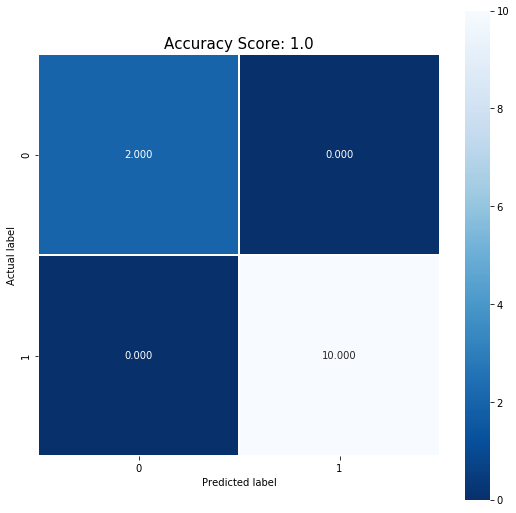

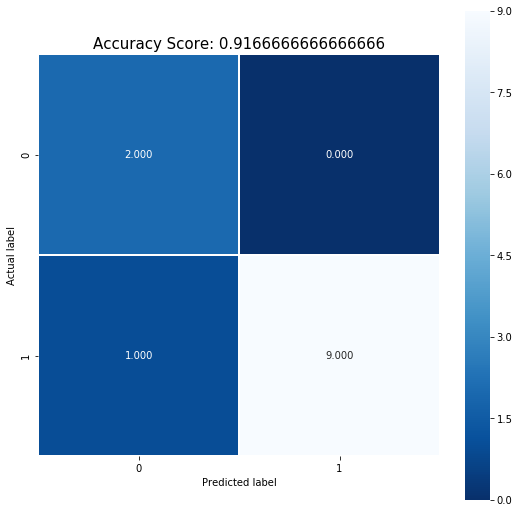

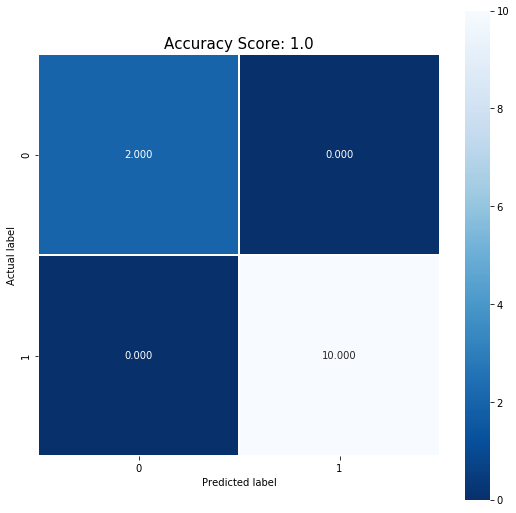

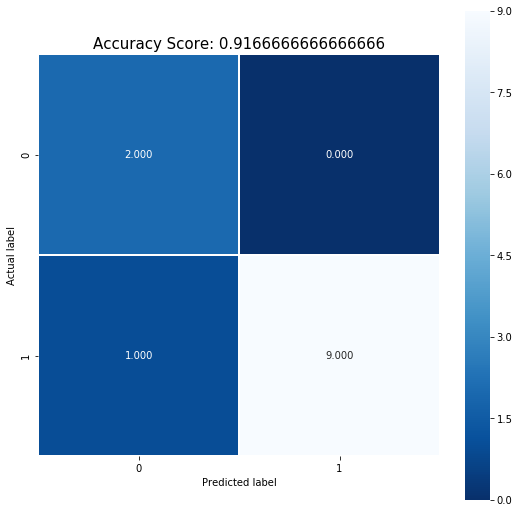

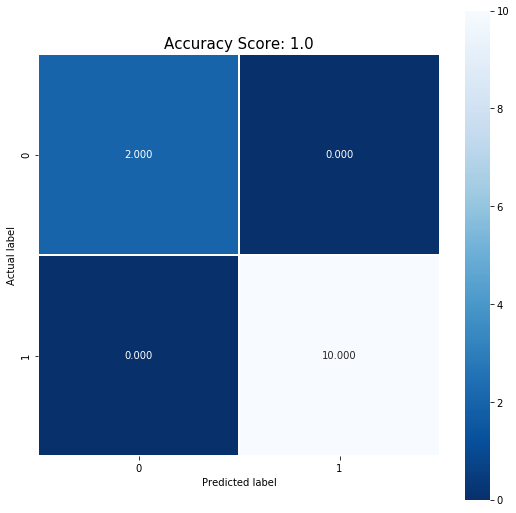

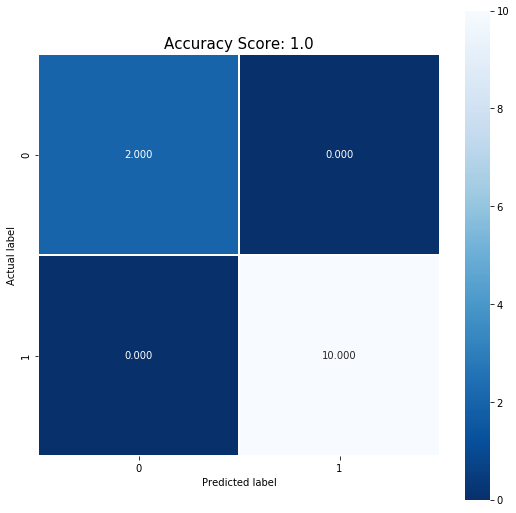

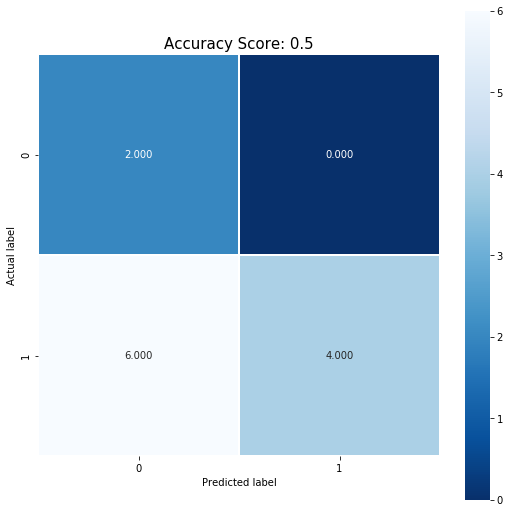

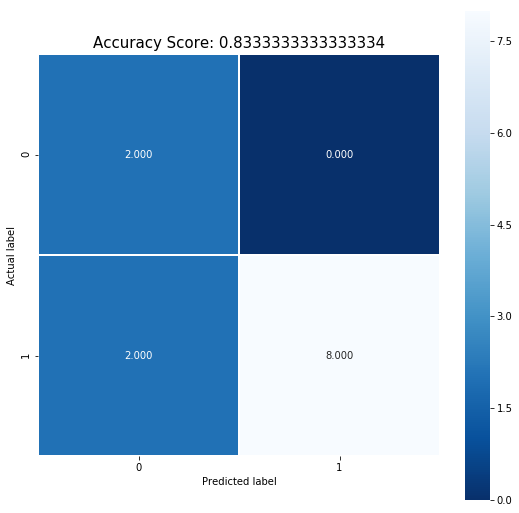

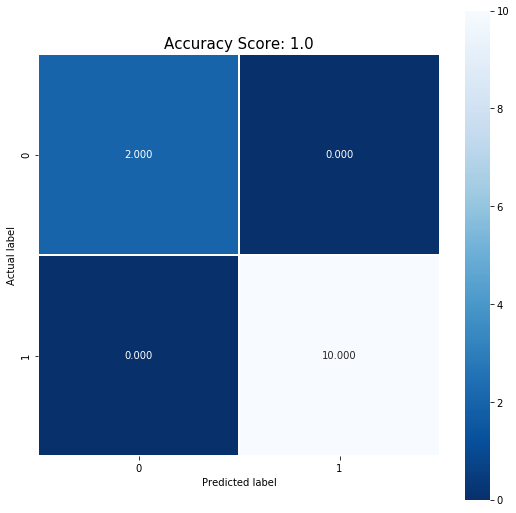

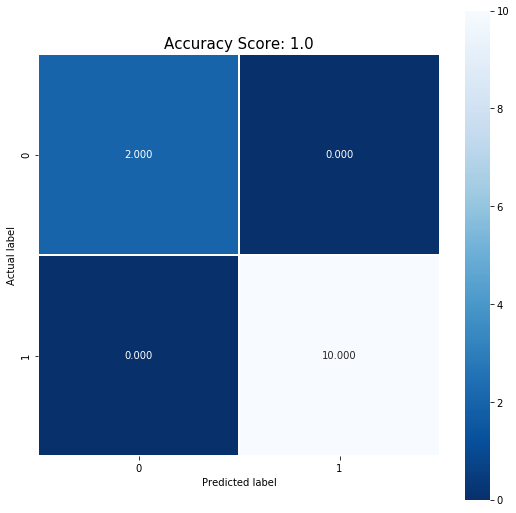

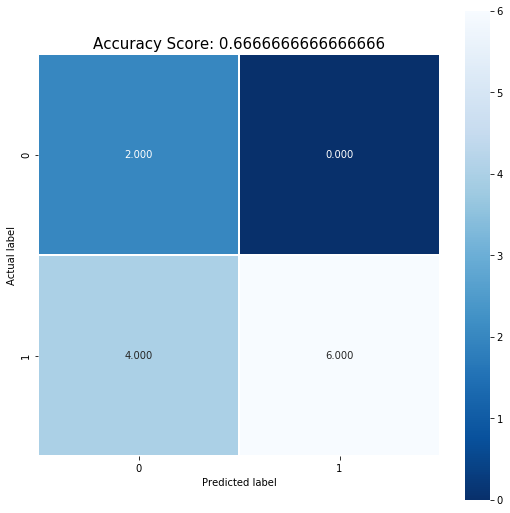

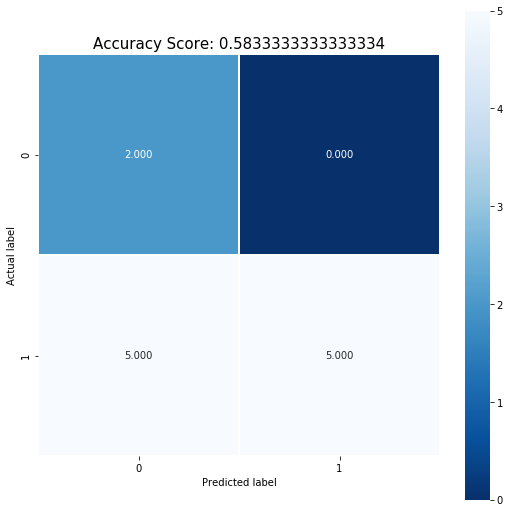

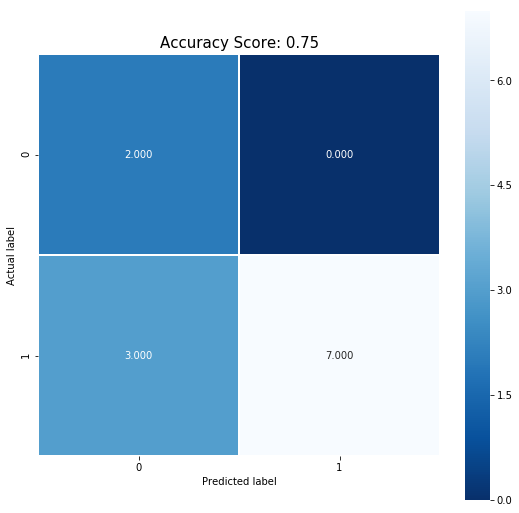

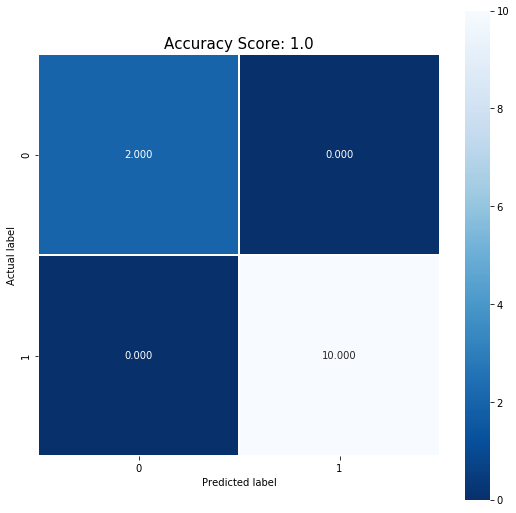

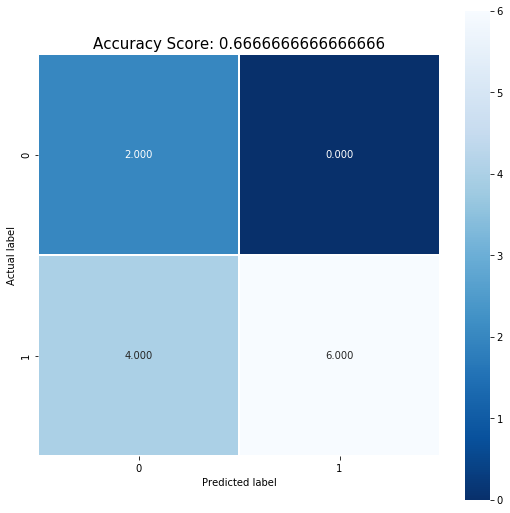

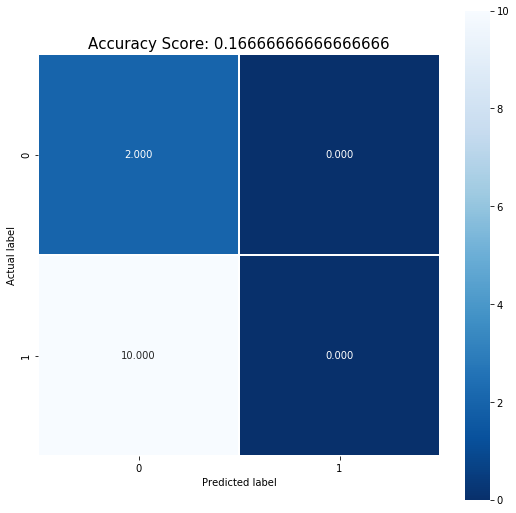

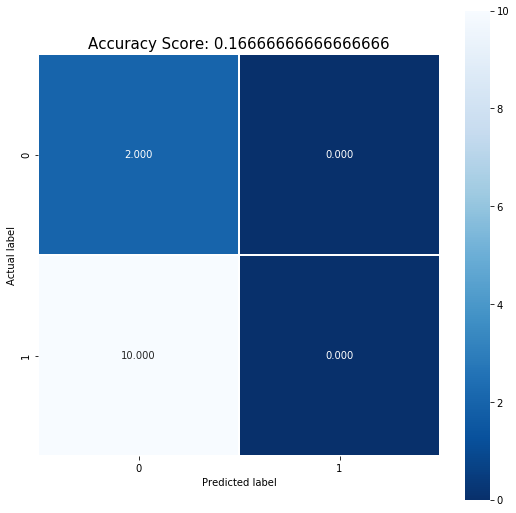

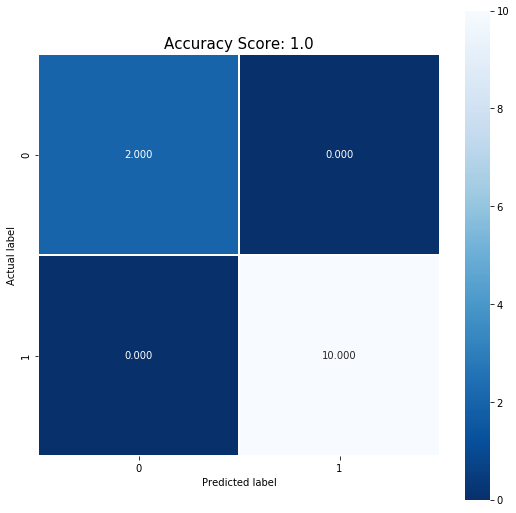

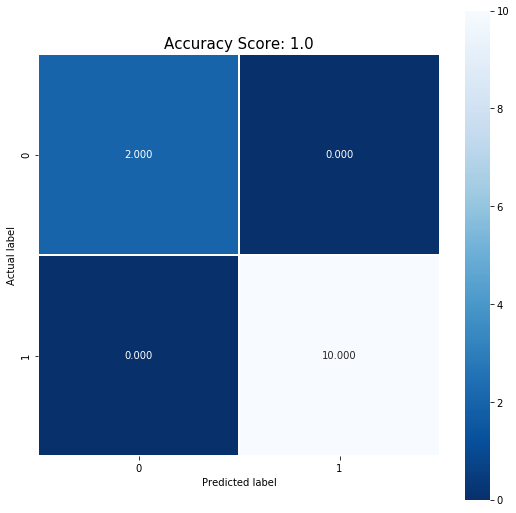

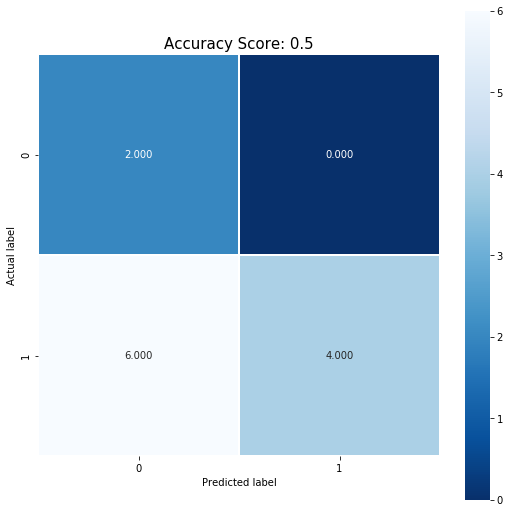

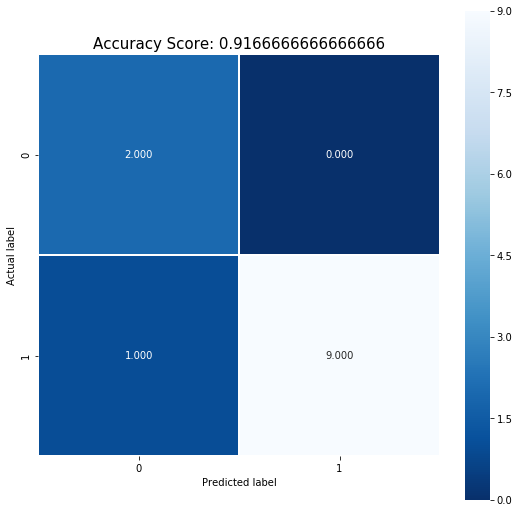

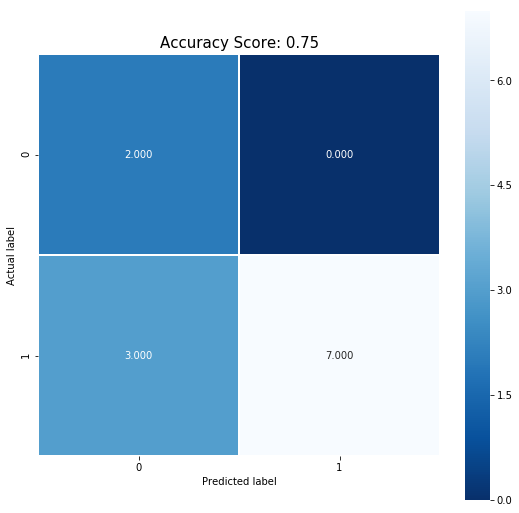

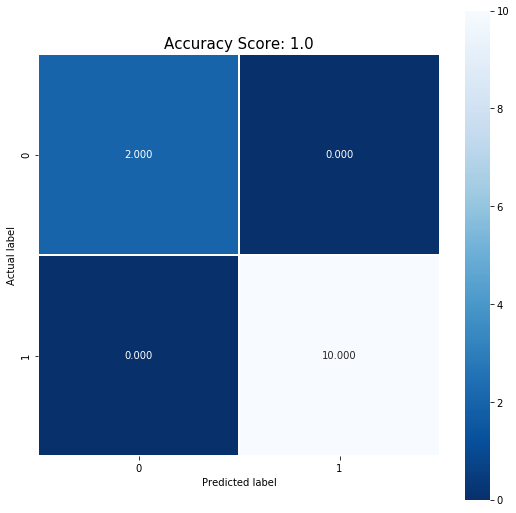

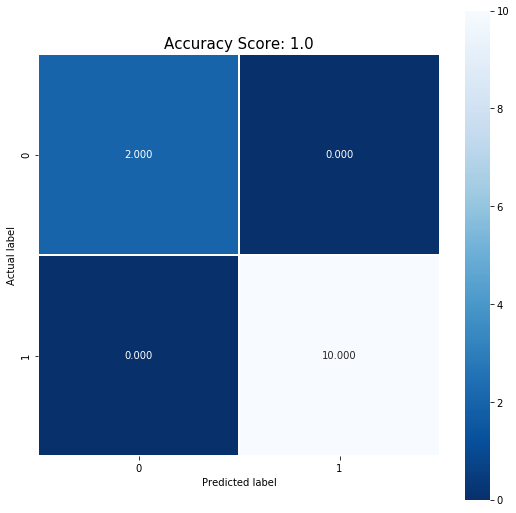

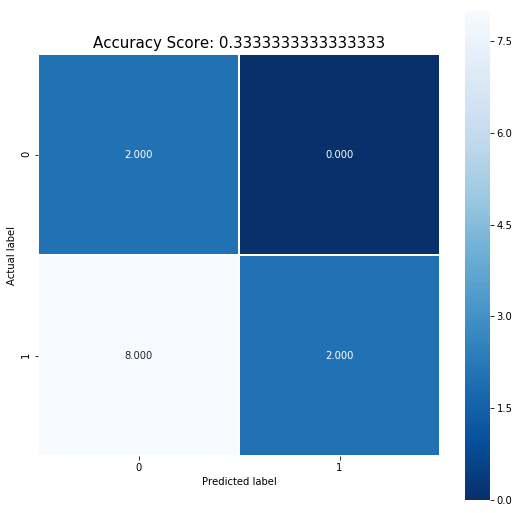

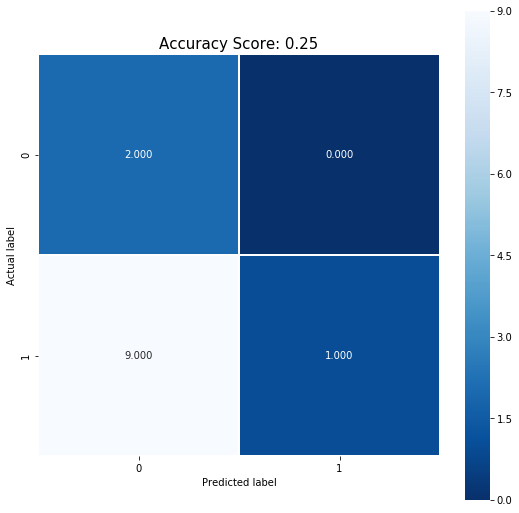

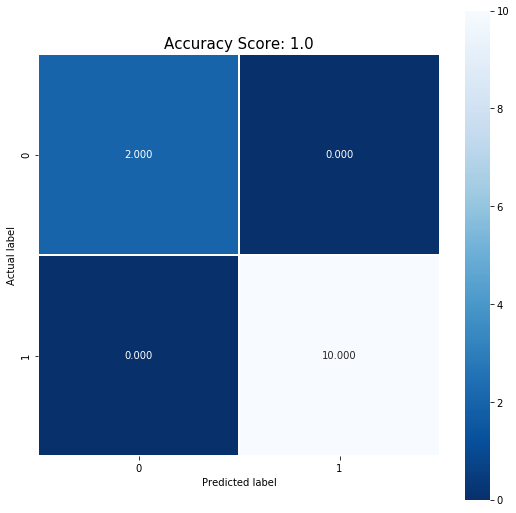

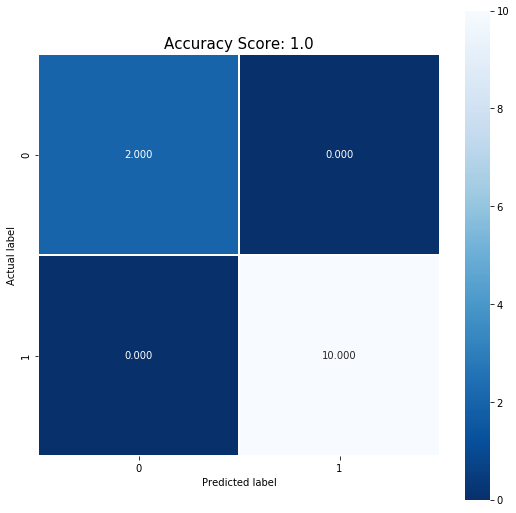

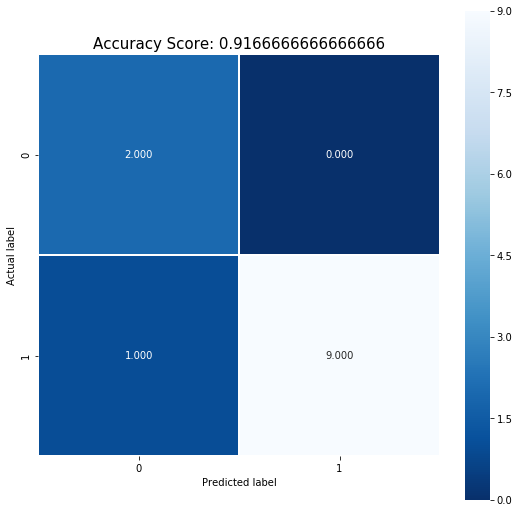

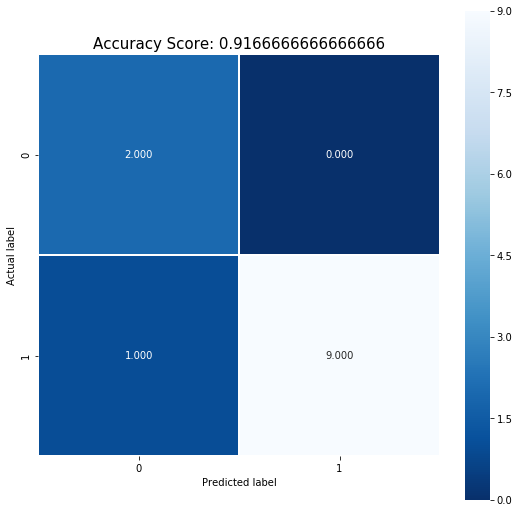

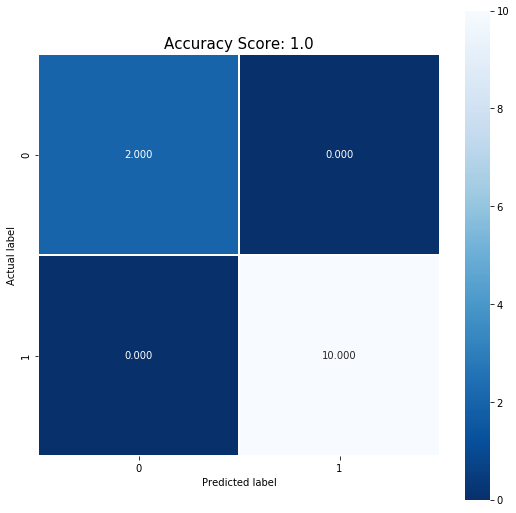

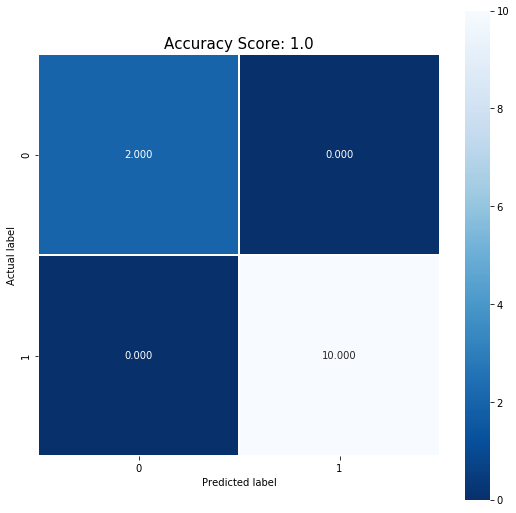

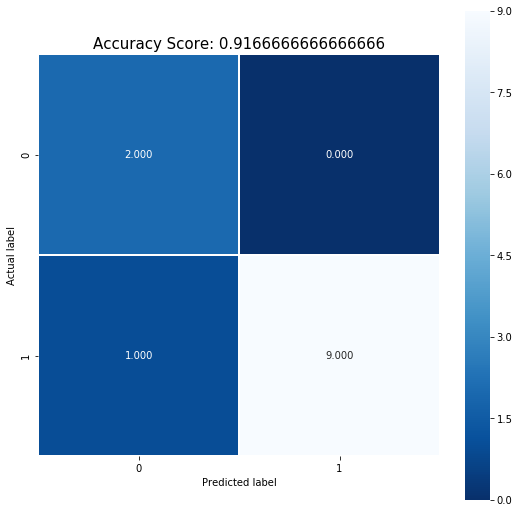

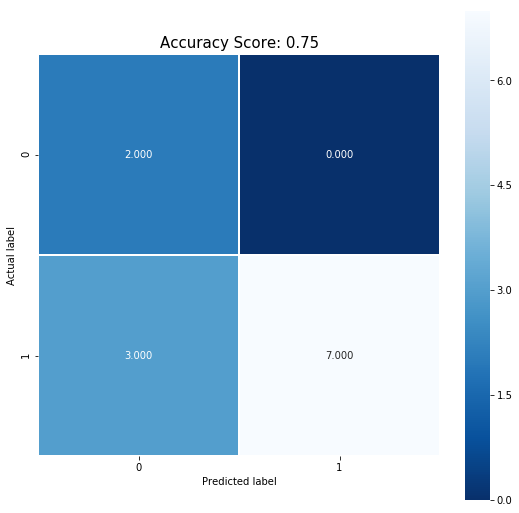

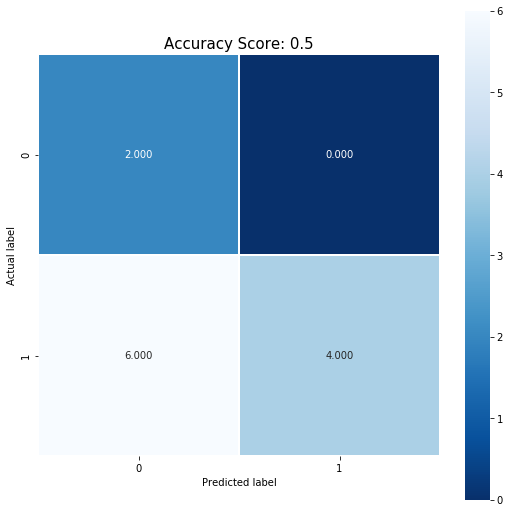

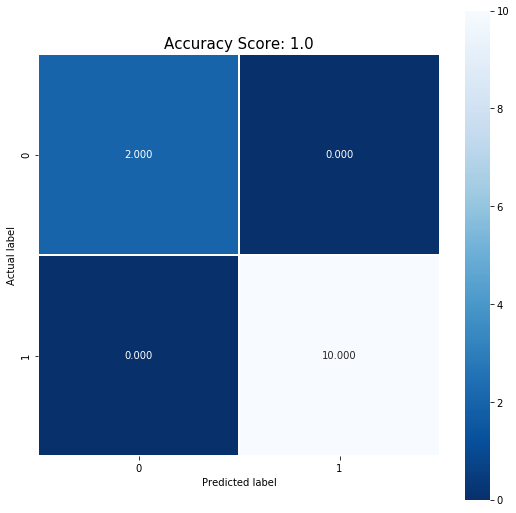

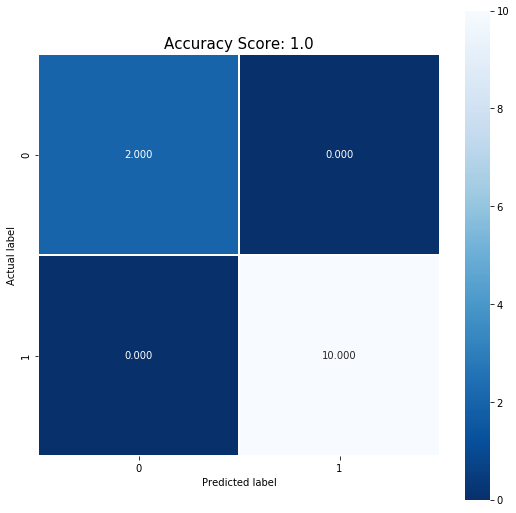

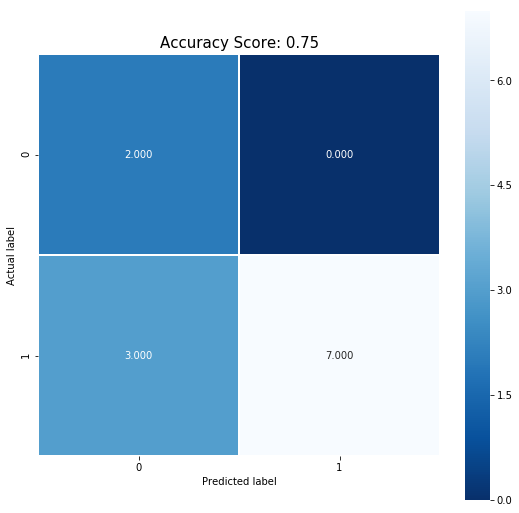

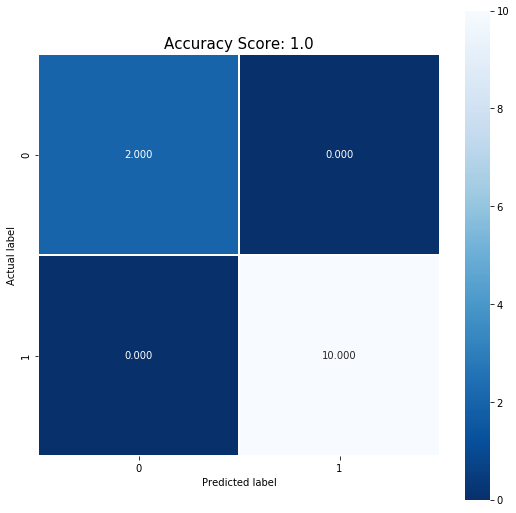

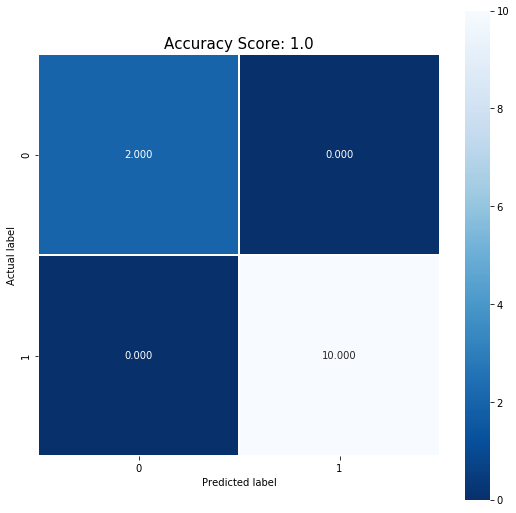

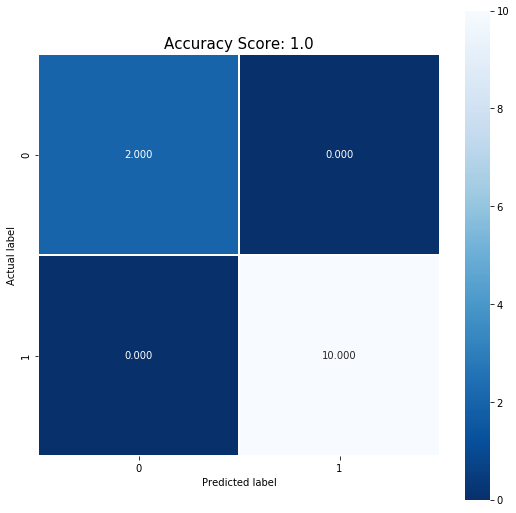

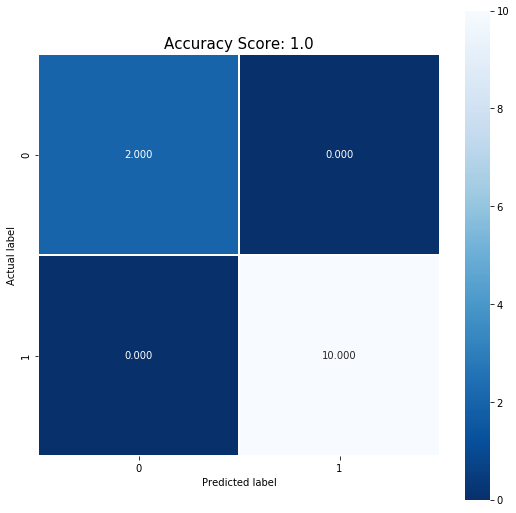

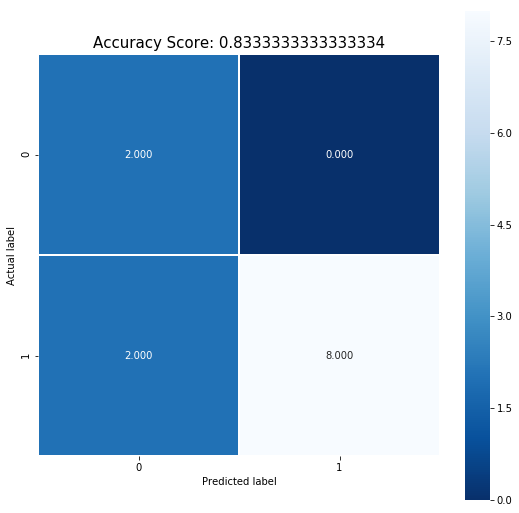

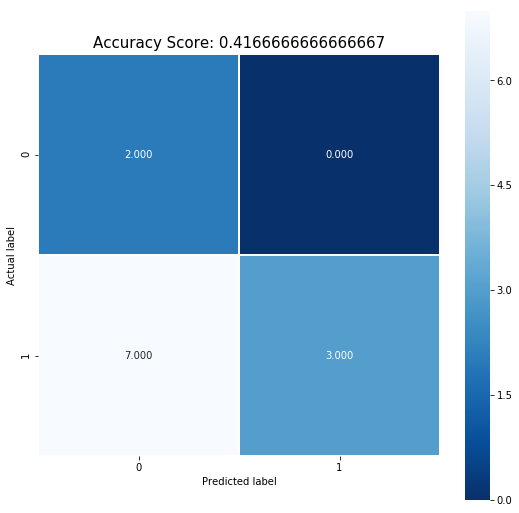

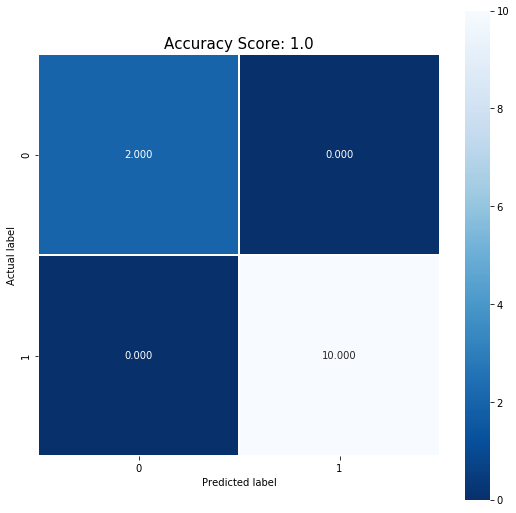

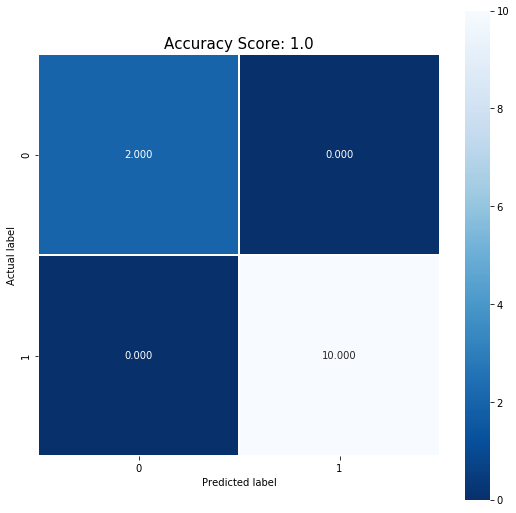

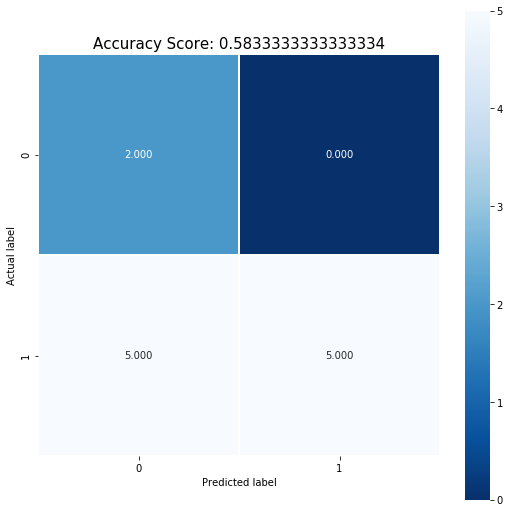

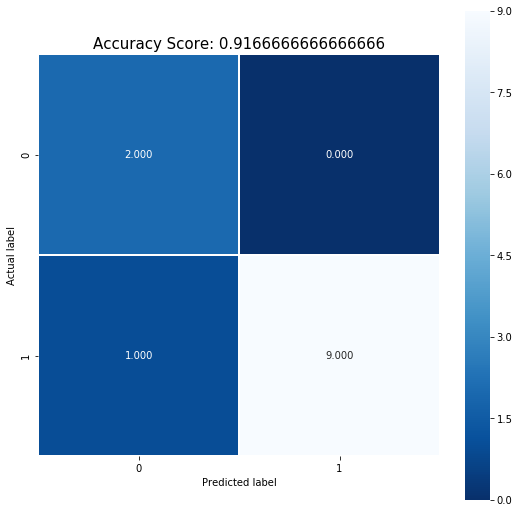

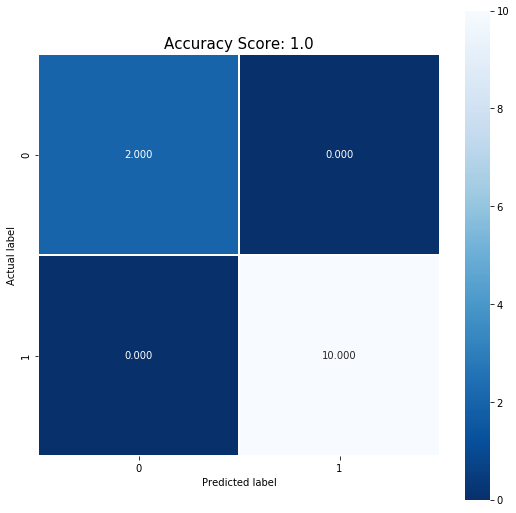

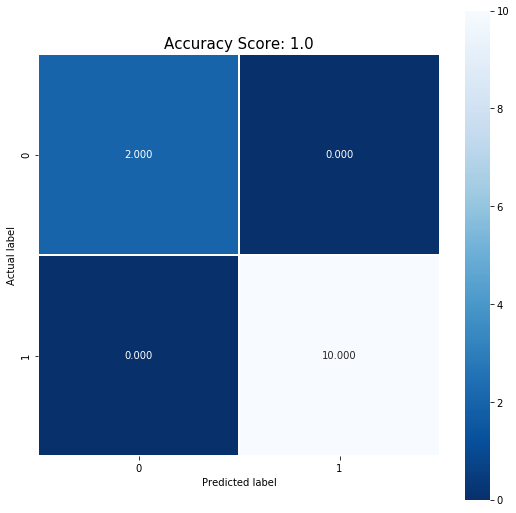

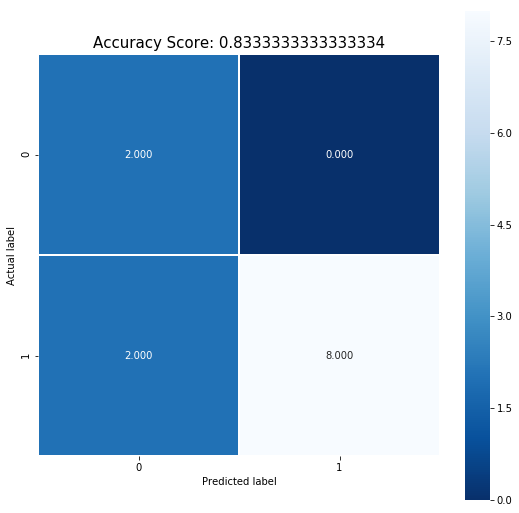

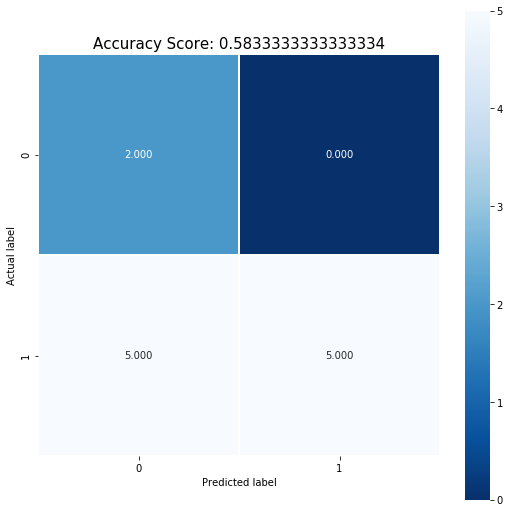

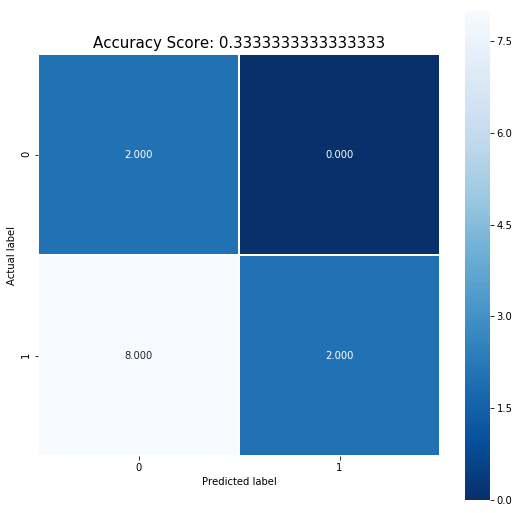

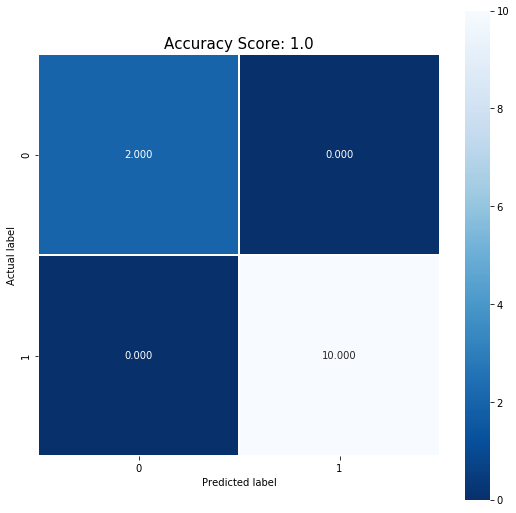

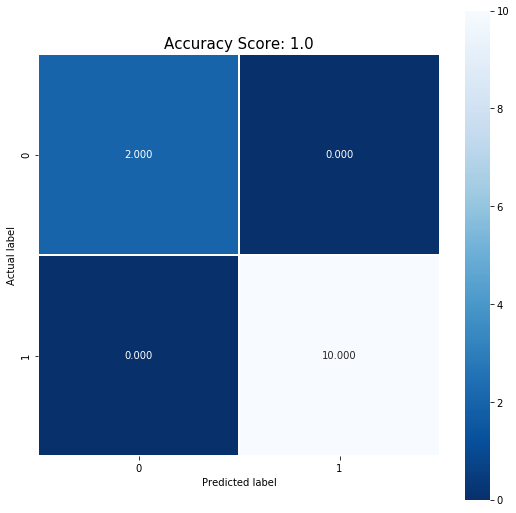

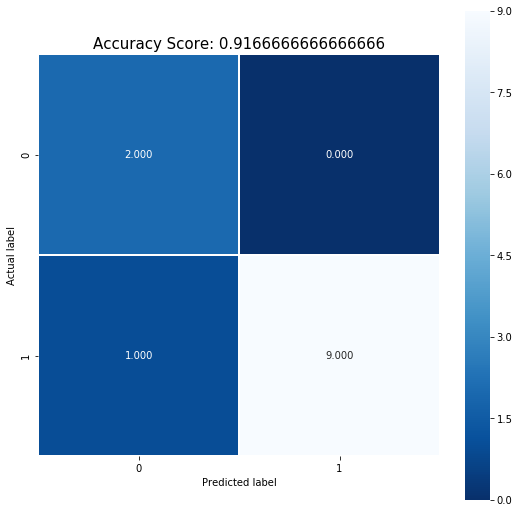

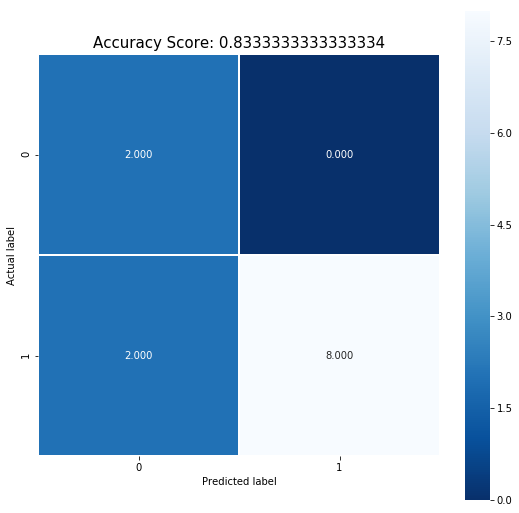

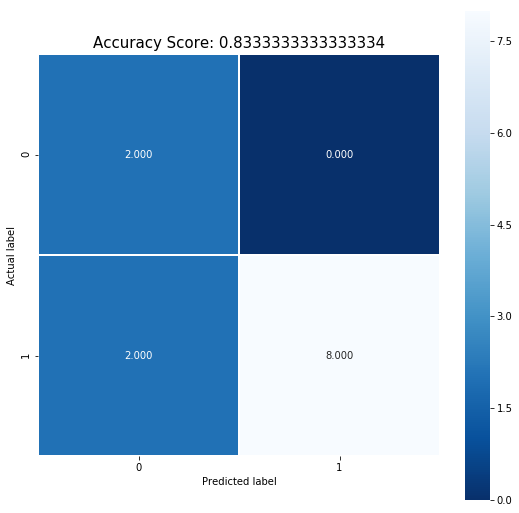

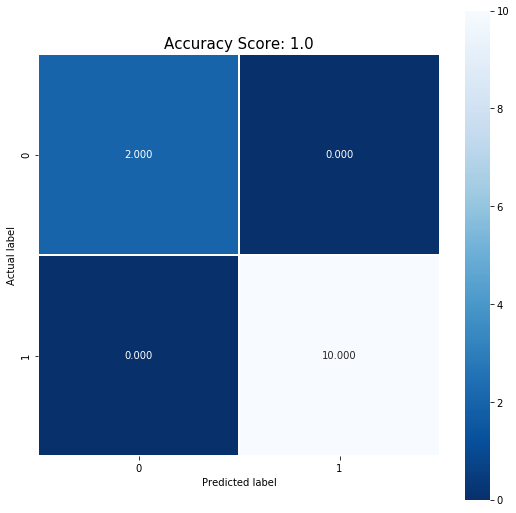

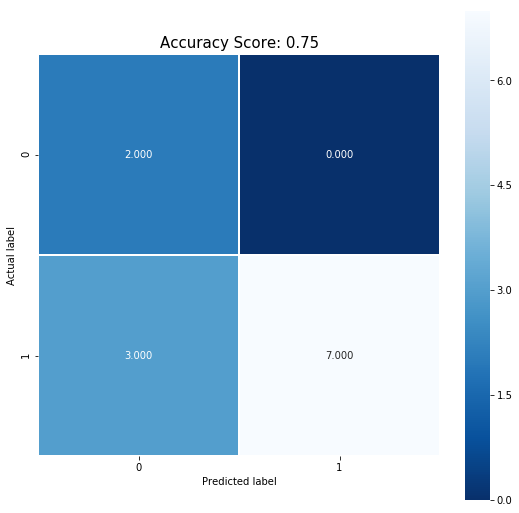

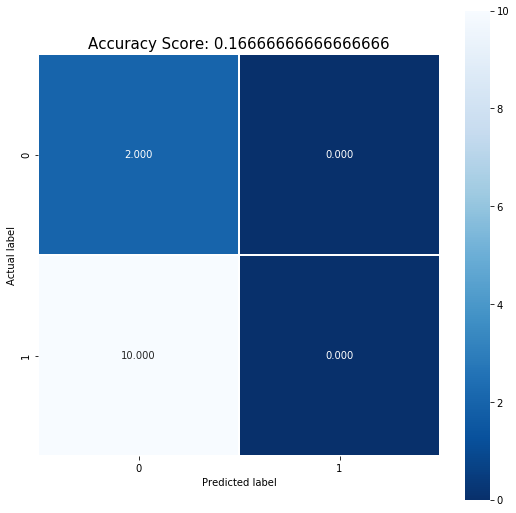

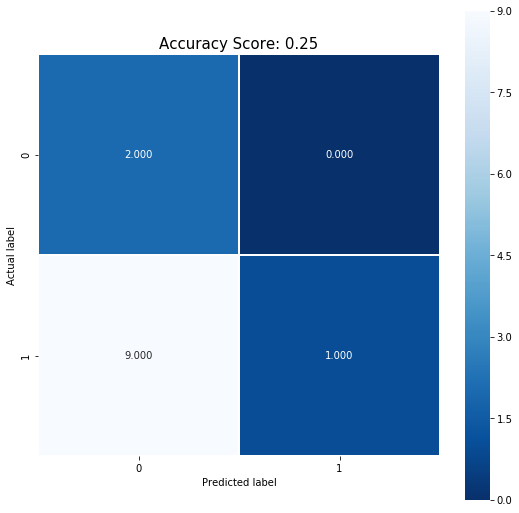

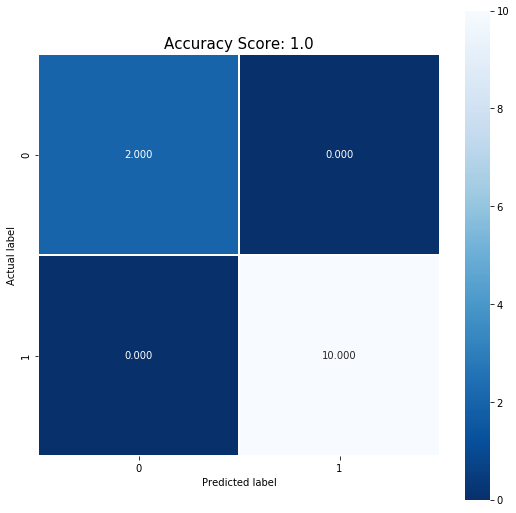

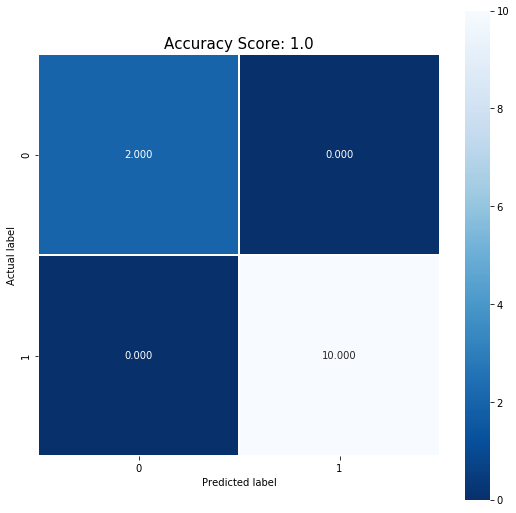

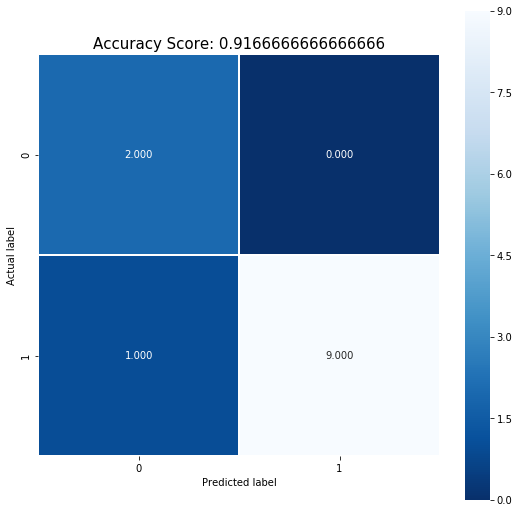

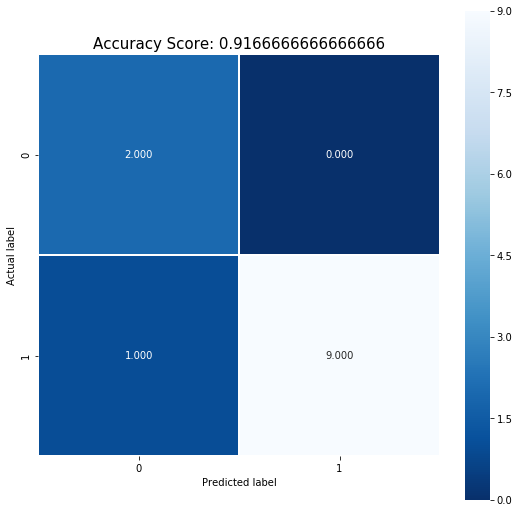

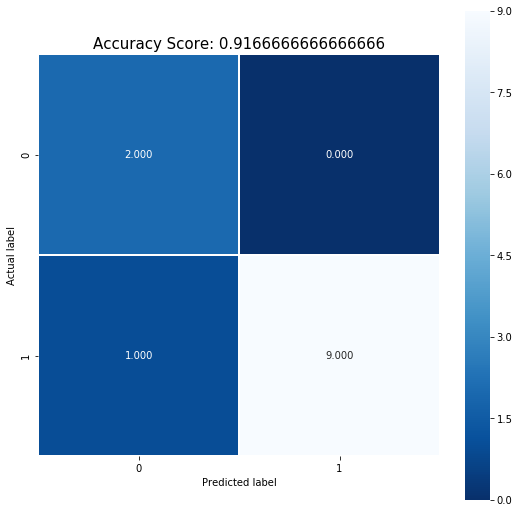

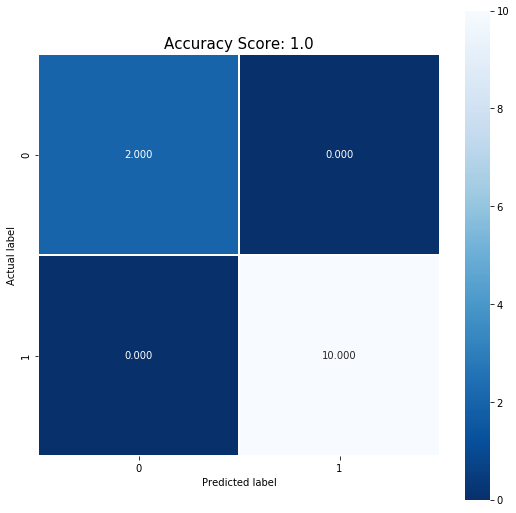

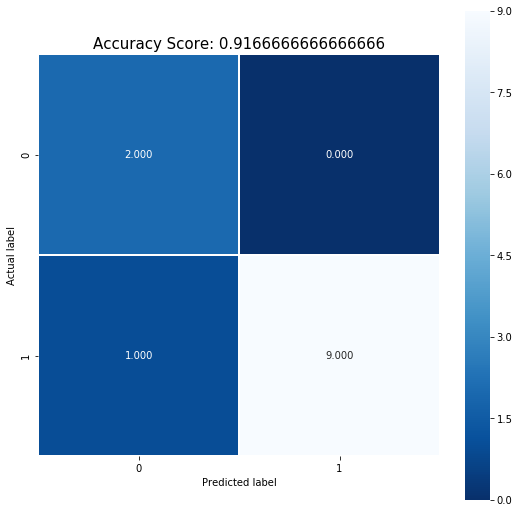

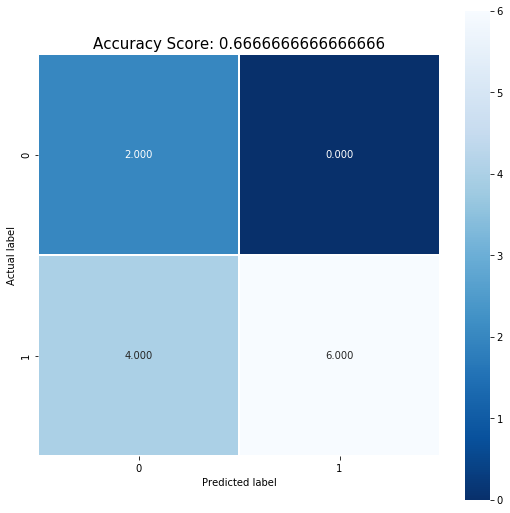

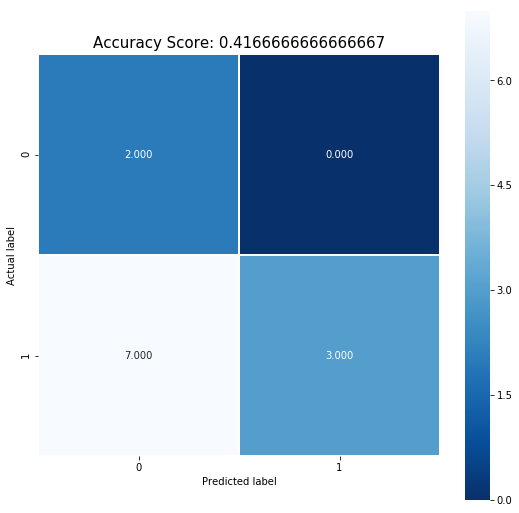

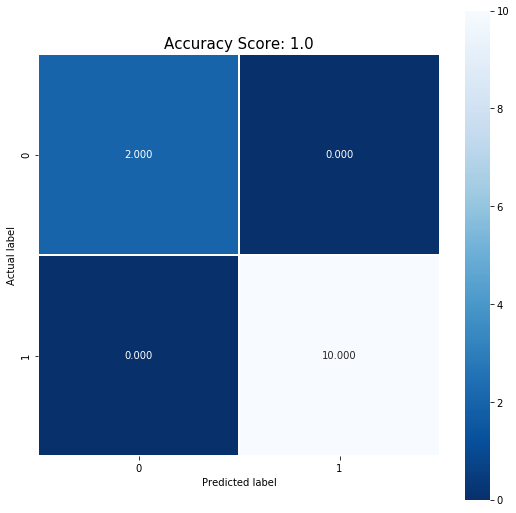

In [4]:
subs=['MSC01','MSC02','MSC03','MSC04','MSC05','MSC06','MSC07','MSC10']
for sub in subs:
    logSS(sub)